# 아파트 실거래가 예측 미션

### 1. 출처 : [데이콘 - 아파트 실거래가 예측 미션](https://newfront.dacon.io/competitions/open/235537/overview/description/)


### 2. 목표 : 국토부 실거래가 공공 데이터를 사용하여 아파트 실거래가를 예측


### 3. Column 설명

### train.csv : 서울/부산 지역의 1,100,000여개 거래 데이터, 아파트 거래일, 지역, 전용면적, 실 거래가 등의 정보

1. transaction_id : 아파트 거래에 대한 유니크한 아이디
2. apartment_id : 아파트 아이디
3. city : 도시
4. dong : 동
5. jibun : 지번
6. apt : 아파트단지 이름
7. addr_kr : 주소
8. exclusive_use_area : 전용면적
9. year_of_completion : 설립일자
10. transaction_year_month : 거래년월
11. transaction_date : 거래날짜
12. floor : 층
13. transaction_real_price : 실거래가

### test.csv : 실 거래가를 제외하고 train.csv와 동일

### park.csv : 서울/부산 지역의 공원에 대한 정보

1. city : 도시 이름
2. gu : 구
3. dong : 동
4. park_name : 공원 이름
5. park_type : 공원 종류
6. park_area : 공원의 넓이
7. park_exercise_facility : 공원보유 운동시설
8. park_entertainment_facility : 공원보유 유희시설
9. park_benefit_facility : 공원보유 편익시설
10. park_cultural_facitiy : 공원보유 교양시설
11. park_facility_other : 공원보유 기타시설
12. park_open_year : 공원 개장년도
13. reference_date : 데이터 기준일자(해당 데이터가 기록된 일자)

### day_care_center.csv : 서울/부산 지역의 어린이집에 대한 정보

1. city : 도시 이름
2. gu : 구
3. day_care_name : 어린이집 이름
4. day_care_type : 어린이집 종류
5. day_care_baby_num : 정원수
6. teacher_num : 보육교직원수
7. nursing_room_num : 보육실수
8. playground_num : 놀이터수
9. CCTV_num : cctv 수
10. is_commuting_vehicle : 통학차량여부
11. reference_date : 데이터 기준일자(해당 데이터가 기록된 일자)

---

# Library 불러오기 및 기본 setting

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
%matplotlib inline

import matplotlib.pyplot as plt
sns.set(style = "whitegrid") #font_scale = 1.3)

from IPython.display import set_matplotlib_formats

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Mac OS를 이용하고 있기 떄문에 AppleGothic을 설정했습니다.
# 윈도우의 경우 다른 폰트를 사용해주셔야 합니다. 나눔폰트가 있는 경우 'NanumGothic' 없는 경우에는 'Malgun Gothic'을 사용해주세요.
matplotlib.rc('font', family='AppleGothic')
#matplotlib.rc('font', family='Malgun Gothic')

# 폰트를 바꿀 경우 마이너스가 표시되지 않는 경우도 있는데 이를 막아주는 코드입니다.
matplotlib.rc('axes', unicode_minus=False)
matplotlib.rcParams['axes.unicode_minus'] = False

# retina 옵션을 통해 해상도를 올립니다.
set_matplotlib_formats('retina')

# 화면에 출력하는 데이터 프레임의 최대 row 수를 500으로 설정합니다.
pd.set_option('display.max_rows', 500)

# 화면에 출력하는 데이터 프레임의 최대 column 수를 500으로 설정합니다.
pd.set_option('display.max_columns', 500)

---

# Load Data

In [3]:
# train 데이터를 불러옵니다.
raw_train = pd.read_csv("data/apt/train.csv")

print(raw_train.shape)
raw_train.head()

(1216553, 13)


,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price
0,0,7622,서울특별시,신교동,6-13,신현(101동),신교동 6-13 신현(101동),84.82,2002,200801,21~31,2,37500
1,1,5399,서울특별시,필운동,142,사직파크맨션,필운동 142 사직파크맨션,99.17,1973,200801,1~10,6,20000
2,2,3578,서울특별시,필운동,174-1,두레엘리시안,필운동 174-1 두레엘리시안,84.74,2007,200801,1~10,6,38500
3,3,10957,서울특별시,내수동,95,파크팰리스,내수동 95 파크팰리스,146.39,2003,200801,11~20,15,118000
4,4,10639,서울특별시,내수동,110-15,킹스매너,내수동 110-15 킹스매너,194.43,2004,200801,21~31,3,120000


In [4]:
# park 데이터를 불러옵니다.
raw_park = pd.read_csv("data/apt/park.csv")

print(raw_park.shape)
raw_park.head()

(1359, 13)


,city,gu,dong,park_name,park_type,park_area,park_exercise_facility,park_entertainment_facility,park_benefit_facility,park_cultural_facitiy,park_facility_other,park_open_year,reference_date
0,부산광역시,남구,대연동,대연공원,근린공원,55227.0,NaN,NaN,NaN,NaN,NaN,1944.0,2018-08-14
1,부산광역시,남구,대연동,당곡공원,역사공원,75465.0,NaN,NaN,NaN,NaN,NaN,1944.0,2018-08-14
2,부산광역시,남구,대연동,대일어린이공원,어린이공원,422.1,NaN,NaN,NaN,NaN,NaN,1965.0,2018-08-14
3,부산광역시,남구,대연동,못골어린이공원,어린이공원,499.8,NaN,NaN,NaN,NaN,NaN,1968.0,2018-08-14
4,부산광역시,남구,용호동,솔밭어린이공원,어린이공원,1500.2,NaN,NaN,NaN,NaN,NaN,1970.0,2018-08-14


In [5]:
# day_care_center 데이터를 불러옵니다.
raw_day_care_center = pd.read_csv("data/apt/day_care_center.csv")

print(raw_day_care_center.shape)
raw_day_care_center.head()

(7551, 11)


,city,gu,day_care_name,day_care_type,day_care_baby_num,teacher_num,nursing_room_num,playground_num,CCTV_num,is_commuting_vehicle,reference_date
0,서울특별시,서대문구,가람어린이집,국공립,70,11.0,5.0,1.0,7.0,N,2018-07-31
1,서울특별시,서대문구,가좌제일어린이집,국공립,88,22.0,5.0,2.0,10.0,N,2018-07-31
2,서울특별시,서대문구,경찰청어린이집,직장,90,23.0,6.0,1.0,32.0,N,2018-07-31
3,서울특별시,서대문구,고운햇살어린이집,가정,18,5.0,3.0,0.0,4.0,N,2018-07-31
4,서울특별시,서대문구,고은어린이집,국공립,93,20.0,7.0,2.0,10.0,N,2018-07-31


In [6]:
# test 데이터를 불러옵니다.
raw_test = pd.read_csv("data/apt/test.csv")

print(raw_test.shape)
raw_test.head()

(5463, 12)


,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor
0,1145756,10453,서울특별시,목동,938,청학,목동 938 청학,35.5500,2002,201711,11~20,2
1,1198704,989,부산광역시,초량동,1143-8,고관맨션,초량동 1143-8 고관맨션,68.7200,1977,201708,21~31,2
2,1222384,8597,부산광역시,괴정동,447-13,우림그린,괴정동 447-13 우림그린,72.5400,1989,201710,11~20,2
3,1179897,11086,서울특별시,대치동,1007-2,풍림아이원4차(1007-2),대치동 1007-2 풍림아이원4차(1007-2),111.5400,2004,201707,1~10,10
4,1223091,2121,부산광역시,다대동,1670,다대롯데캐슬블루,다대동 1670 다대롯데캐슬블루,119.6398,2014,201712,11~20,21


---

# Data Preprocessing

## raw_train 데이터

In [7]:
# raw_train 데이터를 train 으로 변환 후 데이터 전처리를 진행합니다.
train = raw_train.copy()

print(train.shape)
train.head()

(1216553, 13)


,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price
0,0,7622,서울특별시,신교동,6-13,신현(101동),신교동 6-13 신현(101동),84.82,2002,200801,21~31,2,37500
1,1,5399,서울특별시,필운동,142,사직파크맨션,필운동 142 사직파크맨션,99.17,1973,200801,1~10,6,20000
2,2,3578,서울특별시,필운동,174-1,두레엘리시안,필운동 174-1 두레엘리시안,84.74,2007,200801,1~10,6,38500
3,3,10957,서울특별시,내수동,95,파크팰리스,내수동 95 파크팰리스,146.39,2003,200801,11~20,15,118000
4,4,10639,서울특별시,내수동,110-15,킹스매너,내수동 110-15 킹스매너,194.43,2004,200801,21~31,3,120000


In [8]:
train.info() # train 데이터의 컬럼을 확인합니다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216553 entries, 0 to 1216552
Data columns (total 13 columns):
transaction_id            1216553 non-null int64
apartment_id              1216553 non-null int64
city                      1216553 non-null object
dong                      1216553 non-null object
jibun                     1216553 non-null object
apt                       1216553 non-null object
addr_kr                   1216553 non-null object
exclusive_use_area        1216553 non-null float64
year_of_completion        1216553 non-null int64
transaction_year_month    1216553 non-null int64
transaction_date          1216553 non-null object
floor                     1216553 non-null int64
transaction_real_price    1216553 non-null int64
dtypes: float64(1), int64(6), object(6)
memory usage: 120.7+ MB


In [9]:
train.isnull().sum() # train 데이터에 결측치가 있는지 확인합니다.

transaction_id            0
apartment_id              0
city                      0
dong                      0
jibun                     0
apt                       0
addr_kr                   0
exclusive_use_area        0
year_of_completion        0
transaction_year_month    0
transaction_date          0
floor                     0
transaction_real_price    0
dtype: int64

In [10]:
# transaction_year_month 컬럼을 year, month 로 구분한 뒤 각각 새로운 컬럼에 할당합니다.
train["transaction_year"] = train["transaction_year_month"].astype(str).map(lambda x : x[0:4]).astype(int)
train["transaction_month"] = train["transaction_year_month"].astype(str).map(lambda x : x[4:]).astype(int)

print(train.shape)
train[["transaction_year_month", "transaction_year", "transaction_month"]].head()

(1216553, 15)


,transaction_year_month,transaction_year,transaction_month
0,200801,2008,1
1,200801,2008,1
2,200801,2008,1
3,200801,2008,1
4,200801,2008,1


## raw_test 데이터

In [11]:
# raw_test 데이터를 test 으로 변환 후 데이터 전처리를 진행합니다.
test = raw_test.copy()

print(test.shape)
test.head()

(5463, 12)


,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor
0,1145756,10453,서울특별시,목동,938,청학,목동 938 청학,35.5500,2002,201711,11~20,2
1,1198704,989,부산광역시,초량동,1143-8,고관맨션,초량동 1143-8 고관맨션,68.7200,1977,201708,21~31,2
2,1222384,8597,부산광역시,괴정동,447-13,우림그린,괴정동 447-13 우림그린,72.5400,1989,201710,11~20,2
3,1179897,11086,서울특별시,대치동,1007-2,풍림아이원4차(1007-2),대치동 1007-2 풍림아이원4차(1007-2),111.5400,2004,201707,1~10,10
4,1223091,2121,부산광역시,다대동,1670,다대롯데캐슬블루,다대동 1670 다대롯데캐슬블루,119.6398,2014,201712,11~20,21


In [12]:
test.info() # test 데이터의 컬럼을 확인합니다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5463 entries, 0 to 5462
Data columns (total 12 columns):
transaction_id            5463 non-null int64
apartment_id              5463 non-null int64
city                      5463 non-null object
dong                      5463 non-null object
jibun                     5463 non-null object
apt                       5463 non-null object
addr_kr                   5463 non-null object
exclusive_use_area        5463 non-null float64
year_of_completion        5463 non-null int64
transaction_year_month    5463 non-null int64
transaction_date          5463 non-null object
floor                     5463 non-null int64
dtypes: float64(1), int64(5), object(6)
memory usage: 512.3+ KB


In [13]:
test.isnull().sum() # test 데이터에 결측치가 있는지 확인합니다.

transaction_id            0
apartment_id              0
city                      0
dong                      0
jibun                     0
apt                       0
addr_kr                   0
exclusive_use_area        0
year_of_completion        0
transaction_year_month    0
transaction_date          0
floor                     0
dtype: int64

In [14]:
# transaction_year_month 컬럼을 year, month 로 구분한 뒤 각각 새로운 컬럼에 할당합니다.
test["transaction_year"] = test["transaction_year_month"].astype(str).map(lambda x : x[0:4]).astype(int)
test["transaction_month"] = test["transaction_year_month"].astype(str).map(lambda x : x[4:]).astype(int)

print(test.shape)
test[["transaction_year_month", "transaction_year", "transaction_month"]].head()

(5463, 14)


,transaction_year_month,transaction_year,transaction_month
0,201711,2017,11
1,201708,2017,8
2,201710,2017,10
3,201707,2017,7
4,201712,2017,12


## raw_park 데이터

In [15]:
# raw_park 데이터를 park 으로 변환 후 데이터 전처리를 진행합니다.
park = raw_park.copy()

print(park.shape)
park.head()

(1359, 13)


,city,gu,dong,park_name,park_type,park_area,park_exercise_facility,park_entertainment_facility,park_benefit_facility,park_cultural_facitiy,park_facility_other,park_open_year,reference_date
0,부산광역시,남구,대연동,대연공원,근린공원,55227.0,NaN,NaN,NaN,NaN,NaN,1944.0,2018-08-14
1,부산광역시,남구,대연동,당곡공원,역사공원,75465.0,NaN,NaN,NaN,NaN,NaN,1944.0,2018-08-14
2,부산광역시,남구,대연동,대일어린이공원,어린이공원,422.1,NaN,NaN,NaN,NaN,NaN,1965.0,2018-08-14
3,부산광역시,남구,대연동,못골어린이공원,어린이공원,499.8,NaN,NaN,NaN,NaN,NaN,1968.0,2018-08-14
4,부산광역시,남구,용호동,솔밭어린이공원,어린이공원,1500.2,NaN,NaN,NaN,NaN,NaN,1970.0,2018-08-14


In [16]:
park.info() # park 데이터의 컬럼을 확인합니다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 13 columns):
city                           1359 non-null object
gu                             1356 non-null object
dong                           1359 non-null object
park_name                      1359 non-null object
park_type                      1359 non-null object
park_area                      1359 non-null float64
park_exercise_facility         277 non-null object
park_entertainment_facility    435 non-null object
park_benefit_facility          266 non-null object
park_cultural_facitiy          72 non-null object
park_facility_other            175 non-null object
park_open_year                 937 non-null float64
reference_date                 1359 non-null object
dtypes: float64(2), object(11)
memory usage: 138.1+ KB


In [17]:
park.isnull().sum() # park 데이터의 결측치를 확인합니다.

city                              0
gu                                3
dong                              0
park_name                         0
park_type                         0
park_area                         0
park_exercise_facility         1082
park_entertainment_facility     924
park_benefit_facility          1093
park_cultural_facitiy          1287
park_facility_other            1184
park_open_year                  422
reference_date                    0
dtype: int64

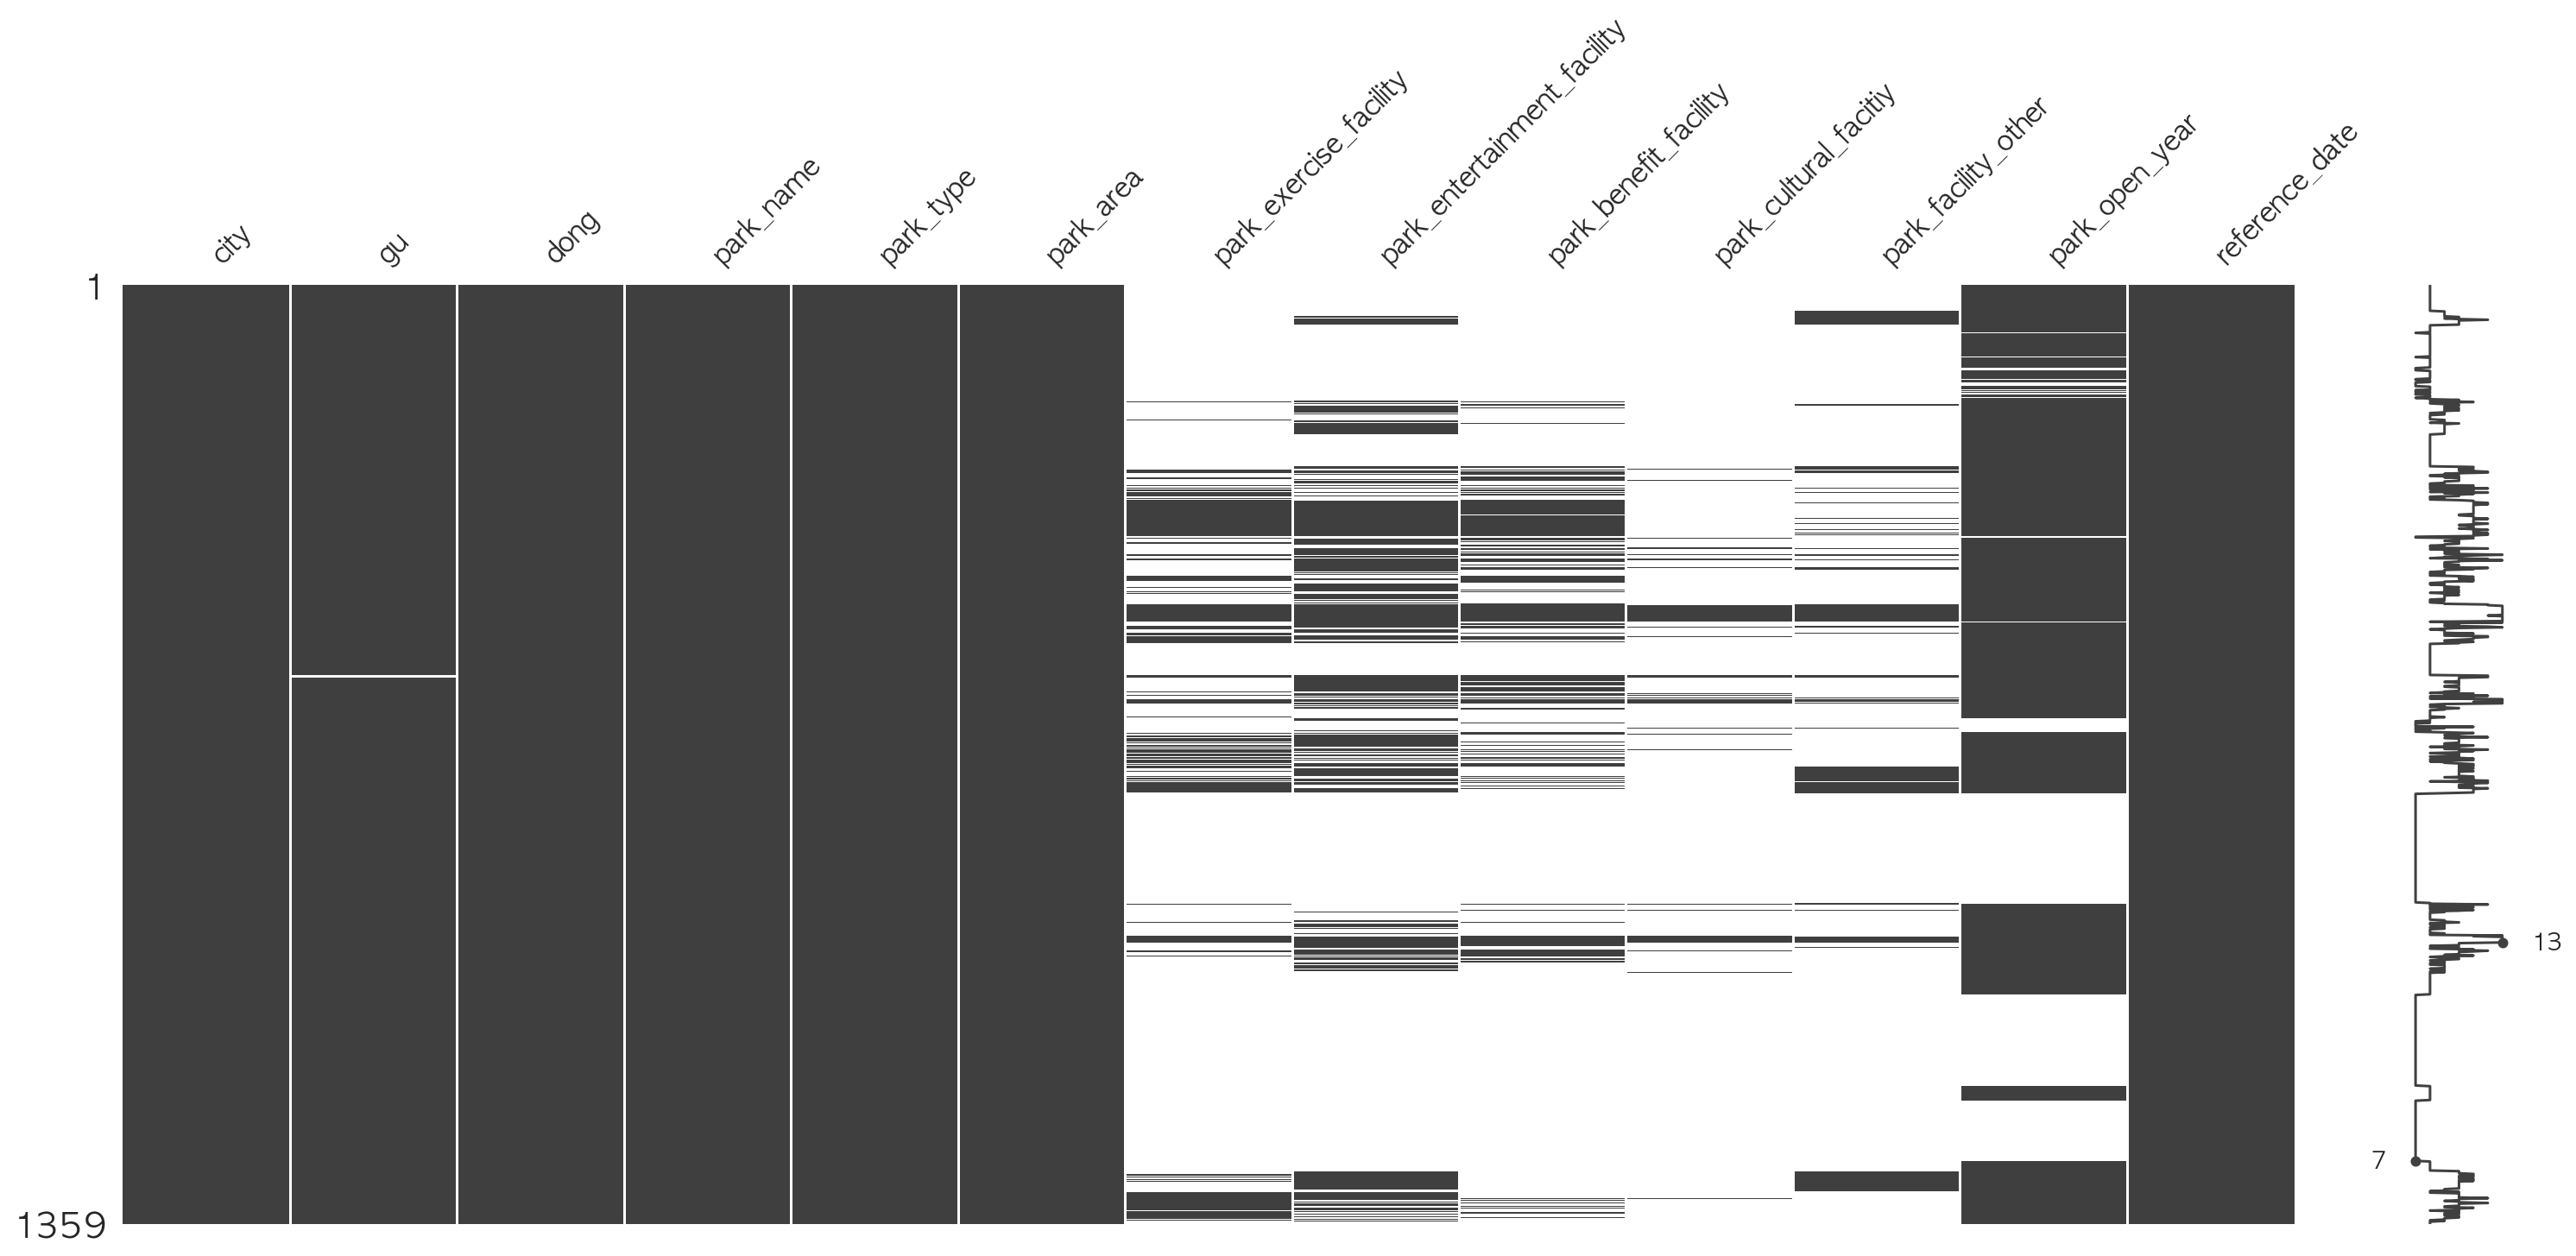

In [18]:
import missingno as msno

msno.matrix(park) # park 데이터의 결측치를 시각화 합니다.

In [19]:
# park_exercise_facility 컬럼에서 Nan 값이 아닌 데이터를 확인 합니다.
park[~park["park_exercise_facility"].isnull()]

,city,gu,dong,park_name,park_type,park_area,park_exercise_facility,park_entertainment_facility,park_benefit_facility,park_cultural_facitiy,park_facility_other,park_open_year,reference_date
50,부산광역시,연제구,연산동,과정공원,어린이공원,1946.50,게이트볼장,조합놀이대 등,화장실,NaN,파고라 및 체력단련시설 등,1973.0,2018-04-04
55,부산광역시,연제구,거제동,거제체육공원,체육공원,5848.50,게이트볼장,NaN,NaN,NaN,파고라 및 체력단련시설 등,2003.0,2018-04-04
169,부산광역시,부산진구,개금동,개금테마공원,근린공원,28881.00,풋살운동장,"""조합놀이대, 그네, 시소""",화장실,NaN,NaN,1986.0,2018-04-05
181,부산광역시,부산진구,당감동,미리내어린이공원,어린이공원,2969.20,배드민턴장,"""시소, 흔들놀이기구""",NaN,NaN,NaN,1994.0,2018-04-05
195,서울특별시,양천구,신정동,신정3동소공원,소공원,3353.00,야외헬스형운동기구 1개,NaN,NaN,NaN,NaN,2012.0,2018-07-31
267,서울특별시,금천구,독산동,독산근린공원,근린공원,18005.50,"""축구장,배드민턴장""",NaN,"""화장실,음수대""",NaN,CCTV,1987.0,2018-08-19
268,서울특별시,금천구,독산동,독산자연공원,근린공원,7650.00,"""배드민턴장,테니스장""",NaN,"""화장실,음수대,주차장""",NaN,NaN,1968.0,2018-08-19
269,서울특별시,금천구,시흥동,삼성산시민휴식공원,근린공원,10118.00,배드민턴장,"""조합놀이대,흔들놀이""",NaN,NaN,CCTV,1968.0,2018-08-19
270,서울특별시,금천구,독산동,금천체육공원,근린공원,18083.00,"""다목적운동장,농구장,배드민턴장""","""조합놀이대,흔들놀이,그네,시소""","""화장실,음수대,공중전화""",NaN,CCTV,1968.0,2018-08-19
271,서울특별시,금천구,시흥동,산기슭공원,근린공원,8412.00,다목적운동장,조합놀이대,화장실,NaN,CCTV,1968.0,2018-08-19


facility(시설)의 경우, NaN 이 '모름' 이 아닌 '없다' 의 의미가 더 큰 것 같습니다.

아울러, facility 의 표기 방법도 가지각색이므로 facility 가 있는지 없는지만 별도 컬럼을 만들어 표기하도록 하겠습니다.

In [20]:
park["park_exercise_facility_clean"] = park["park_exercise_facility"]

print(park.shape)
park.head()

(1359, 14)


,city,gu,dong,park_name,park_type,park_area,park_exercise_facility,park_entertainment_facility,park_benefit_facility,park_cultural_facitiy,park_facility_other,park_open_year,reference_date,park_exercise_facility_clean
0,부산광역시,남구,대연동,대연공원,근린공원,55227.0,NaN,NaN,NaN,NaN,NaN,1944.0,2018-08-14,NaN
1,부산광역시,남구,대연동,당곡공원,역사공원,75465.0,NaN,NaN,NaN,NaN,NaN,1944.0,2018-08-14,NaN
2,부산광역시,남구,대연동,대일어린이공원,어린이공원,422.1,NaN,NaN,NaN,NaN,NaN,1965.0,2018-08-14,NaN
3,부산광역시,남구,대연동,못골어린이공원,어린이공원,499.8,NaN,NaN,NaN,NaN,NaN,1968.0,2018-08-14,NaN
4,부산광역시,남구,용호동,솔밭어린이공원,어린이공원,1500.2,NaN,NaN,NaN,NaN,NaN,1970.0,2018-08-14,NaN


In [21]:
park["park_exercise_facility_clean"] = park["park_exercise_facility_clean"].fillna("없음")

park["park_exercise_facility_clean"] = park["park_exercise_facility_clean"].str.replace("미조성", "없음").str.replace("-", "없음").str.replace("0", "없음")

park[~park["park_exercise_facility"].isnull()]

,city,gu,dong,park_name,park_type,park_area,park_exercise_facility,park_entertainment_facility,park_benefit_facility,park_cultural_facitiy,park_facility_other,park_open_year,reference_date,park_exercise_facility_clean
50,부산광역시,연제구,연산동,과정공원,어린이공원,1946.50,게이트볼장,조합놀이대 등,화장실,NaN,파고라 및 체력단련시설 등,1973.0,2018-04-04,게이트볼장
55,부산광역시,연제구,거제동,거제체육공원,체육공원,5848.50,게이트볼장,NaN,NaN,NaN,파고라 및 체력단련시설 등,2003.0,2018-04-04,게이트볼장
169,부산광역시,부산진구,개금동,개금테마공원,근린공원,28881.00,풋살운동장,"""조합놀이대, 그네, 시소""",화장실,NaN,NaN,1986.0,2018-04-05,풋살운동장
181,부산광역시,부산진구,당감동,미리내어린이공원,어린이공원,2969.20,배드민턴장,"""시소, 흔들놀이기구""",NaN,NaN,NaN,1994.0,2018-04-05,배드민턴장
195,서울특별시,양천구,신정동,신정3동소공원,소공원,3353.00,야외헬스형운동기구 1개,NaN,NaN,NaN,NaN,2012.0,2018-07-31,야외헬스형운동기구 1개
267,서울특별시,금천구,독산동,독산근린공원,근린공원,18005.50,"""축구장,배드민턴장""",NaN,"""화장실,음수대""",NaN,CCTV,1987.0,2018-08-19,"""축구장,배드민턴장"""
268,서울특별시,금천구,독산동,독산자연공원,근린공원,7650.00,"""배드민턴장,테니스장""",NaN,"""화장실,음수대,주차장""",NaN,NaN,1968.0,2018-08-19,"""배드민턴장,테니스장"""
269,서울특별시,금천구,시흥동,삼성산시민휴식공원,근린공원,10118.00,배드민턴장,"""조합놀이대,흔들놀이""",NaN,NaN,CCTV,1968.0,2018-08-19,배드민턴장
270,서울특별시,금천구,독산동,금천체육공원,근린공원,18083.00,"""다목적운동장,농구장,배드민턴장""","""조합놀이대,흔들놀이,그네,시소""","""화장실,음수대,공중전화""",NaN,CCTV,1968.0,2018-08-19,"""다목적운동장,농구장,배드민턴장"""
271,서울특별시,금천구,시흥동,산기슭공원,근린공원,8412.00,다목적운동장,조합놀이대,화장실,NaN,CCTV,1968.0,2018-08-19,다목적운동장


In [22]:
park["park_exercise_facility_clean"] = park["park_exercise_facility_clean"].apply(lambda row : False if row == "없음" else True)

print(park["park_exercise_facility_clean"].value_counts())
     
park[~park["park_exercise_facility"].isnull()]

False    1115
True      244
Name: park_exercise_facility_clean, dtype: int64


,city,gu,dong,park_name,park_type,park_area,park_exercise_facility,park_entertainment_facility,park_benefit_facility,park_cultural_facitiy,park_facility_other,park_open_year,reference_date,park_exercise_facility_clean
50,부산광역시,연제구,연산동,과정공원,어린이공원,1946.50,게이트볼장,조합놀이대 등,화장실,NaN,파고라 및 체력단련시설 등,1973.0,2018-04-04,True
55,부산광역시,연제구,거제동,거제체육공원,체육공원,5848.50,게이트볼장,NaN,NaN,NaN,파고라 및 체력단련시설 등,2003.0,2018-04-04,True
169,부산광역시,부산진구,개금동,개금테마공원,근린공원,28881.00,풋살운동장,"""조합놀이대, 그네, 시소""",화장실,NaN,NaN,1986.0,2018-04-05,True
181,부산광역시,부산진구,당감동,미리내어린이공원,어린이공원,2969.20,배드민턴장,"""시소, 흔들놀이기구""",NaN,NaN,NaN,1994.0,2018-04-05,True
195,서울특별시,양천구,신정동,신정3동소공원,소공원,3353.00,야외헬스형운동기구 1개,NaN,NaN,NaN,NaN,2012.0,2018-07-31,True
267,서울특별시,금천구,독산동,독산근린공원,근린공원,18005.50,"""축구장,배드민턴장""",NaN,"""화장실,음수대""",NaN,CCTV,1987.0,2018-08-19,True
268,서울특별시,금천구,독산동,독산자연공원,근린공원,7650.00,"""배드민턴장,테니스장""",NaN,"""화장실,음수대,주차장""",NaN,NaN,1968.0,2018-08-19,True
269,서울특별시,금천구,시흥동,삼성산시민휴식공원,근린공원,10118.00,배드민턴장,"""조합놀이대,흔들놀이""",NaN,NaN,CCTV,1968.0,2018-08-19,True
270,서울특별시,금천구,독산동,금천체육공원,근린공원,18083.00,"""다목적운동장,농구장,배드민턴장""","""조합놀이대,흔들놀이,그네,시소""","""화장실,음수대,공중전화""",NaN,CCTV,1968.0,2018-08-19,True
271,서울특별시,금천구,시흥동,산기슭공원,근린공원,8412.00,다목적운동장,조합놀이대,화장실,NaN,CCTV,1968.0,2018-08-19,True


facility 와 관련된 다른 컬럼도 park_exercise_facility 컬럼과 동일하게 처리 해줍니다.

In [23]:
# park_entertainment_facility 컬럼
park["park_entertainment_facility_clean"] = park["park_entertainment_facility"]
park["park_entertainment_facility_clean"] = park["park_entertainment_facility_clean"].fillna("없음")
park["park_entertainment_facility_clean"] = park["park_entertainment_facility_clean"].str.replace("미조성", "없음").str.replace("-", "없음").str.replace("0", "없음")
park["park_entertainment_facility_clean"] = park["park_entertainment_facility_clean"].apply(lambda row : False if row == "없음" else True)
print("park_entertainment_facility is", park["park_entertainment_facility_clean"].value_counts())

# park_benefit_facility 컬럼
park["park_benefit_facility_clean"] = park["park_benefit_facility"]
park["park_benefit_facility_clean"] = park["park_benefit_facility_clean"].fillna("없음")
park["park_benefit_facility_clean"] = park["park_benefit_facility_clean"].str.replace("미조성", "없음").str.replace("-", "없음").str.replace("0", "없음")
park["park_benefit_facility_clean"] = park["park_benefit_facility_clean"].apply(lambda row : False if row == "없음" else True)
print("park_benefit_facility is", park["park_benefit_facility_clean"].value_counts())

# park_cultural_facitiy 컬럼
park["park_cultural_facitiy_clean"] = park["park_cultural_facitiy"]
park["park_cultural_facitiy_clean"] = park["park_cultural_facitiy_clean"].fillna("없음")
park["park_cultural_facitiy_clean"] = park["park_cultural_facitiy_clean"].str.replace("미조성", "없음").str.replace("-", "없음").str.replace("0", "없음")
park["park_cultural_facitiy_clean"] = park["park_cultural_facitiy_clean"].apply(lambda row : False if row == "없음" else True)
print("park_cultural_facitiy is", park["park_cultural_facitiy_clean"].value_counts())

# park_facility_other 컬럼
park["park_facility_other_clean"] = park["park_facility_other"]
park["park_facility_other_clean"] = park["park_facility_other_clean"].fillna("없음")
park["park_facility_other_clean"] = park["park_facility_other_clean"].str.replace("미조성", "없음").str.replace("-", "없음").str.replace("0", "없음")
park["park_facility_other_clean"] = park["park_facility_other_clean"].apply(lambda row : False if row == "없음" else True)
print("park_facility_other is", park["park_facility_other_clean"].value_counts())

park_entertainment_facility is False    942
True     417
Name: park_entertainment_facility_clean, dtype: int64
park_benefit_facility is False    1121
True      238
Name: park_benefit_facility_clean, dtype: int64
park_cultural_facitiy is False    1321
True       38
Name: park_cultural_facitiy_clean, dtype: int64
park_facility_other is False    1214
True      145
Name: park_facility_other_clean, dtype: int64


reference_date 컬럼을 연/월/일/요일로 구분하여 새로운 컬럼에 할당합니다.

In [24]:
park["reference_date"] = pd.to_datetime(park["reference_date"])
park["reference_year"] = park["reference_date"].dt.year
park["reference_month"] = park["reference_date"].dt.month
park["reference_day"] = park["reference_date"].dt.day
park["reference_weekday"] = park["reference_date"].dt.weekday_name

print(park.shape)
park[["reference_date", "reference_year", "reference_month", "reference_day", "reference_weekday"]].head()

(1359, 22)


,reference_date,reference_year,reference_month,reference_day,reference_weekday
0,2018-08-14,2018,8,14,Tuesday
1,2018-08-14,2018,8,14,Tuesday
2,2018-08-14,2018,8,14,Tuesday
3,2018-08-14,2018,8,14,Tuesday
4,2018-08-14,2018,8,14,Tuesday


In [25]:
park.head()

,city,gu,dong,park_name,park_type,park_area,park_exercise_facility,park_entertainment_facility,park_benefit_facility,park_cultural_facitiy,park_facility_other,park_open_year,reference_date,park_exercise_facility_clean,park_entertainment_facility_clean,park_benefit_facility_clean,park_cultural_facitiy_clean,park_facility_other_clean,reference_year,reference_month,reference_day,reference_weekday
0,부산광역시,남구,대연동,대연공원,근린공원,55227.0,NaN,NaN,NaN,NaN,NaN,1944.0,2018-08-14,False,False,False,False,False,2018,8,14,Tuesday
1,부산광역시,남구,대연동,당곡공원,역사공원,75465.0,NaN,NaN,NaN,NaN,NaN,1944.0,2018-08-14,False,False,False,False,False,2018,8,14,Tuesday
2,부산광역시,남구,대연동,대일어린이공원,어린이공원,422.1,NaN,NaN,NaN,NaN,NaN,1965.0,2018-08-14,False,False,False,False,False,2018,8,14,Tuesday
3,부산광역시,남구,대연동,못골어린이공원,어린이공원,499.8,NaN,NaN,NaN,NaN,NaN,1968.0,2018-08-14,False,False,False,False,False,2018,8,14,Tuesday
4,부산광역시,남구,용호동,솔밭어린이공원,어린이공원,1500.2,NaN,NaN,NaN,NaN,NaN,1970.0,2018-08-14,False,False,False,False,False,2018,8,14,Tuesday


## raw_day_care_center 컬럼

In [26]:
# raw_park 데이터를 park 으로 변환 후 데이터 전처리를 진행합니다.
day_care_center = raw_day_care_center.copy()

print(day_care_center.shape)
day_care_center.head()

(7551, 11)


,city,gu,day_care_name,day_care_type,day_care_baby_num,teacher_num,nursing_room_num,playground_num,CCTV_num,is_commuting_vehicle,reference_date
0,서울특별시,서대문구,가람어린이집,국공립,70,11.0,5.0,1.0,7.0,N,2018-07-31
1,서울특별시,서대문구,가좌제일어린이집,국공립,88,22.0,5.0,2.0,10.0,N,2018-07-31
2,서울특별시,서대문구,경찰청어린이집,직장,90,23.0,6.0,1.0,32.0,N,2018-07-31
3,서울특별시,서대문구,고운햇살어린이집,가정,18,5.0,3.0,0.0,4.0,N,2018-07-31
4,서울특별시,서대문구,고은어린이집,국공립,93,20.0,7.0,2.0,10.0,N,2018-07-31


In [27]:
day_care_center.info() # day_care_center 데이터의 컬럼 정보를 확인합니다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7551 entries, 0 to 7550
Data columns (total 11 columns):
city                    7551 non-null object
gu                      7551 non-null object
day_care_name           7551 non-null object
day_care_type           7551 non-null object
day_care_baby_num       7551 non-null int64
teacher_num             7326 non-null float64
nursing_room_num        4352 non-null float64
playground_num          3626 non-null float64
CCTV_num                5280 non-null float64
is_commuting_vehicle    7055 non-null object
reference_date          7551 non-null object
dtypes: float64(4), int64(1), object(6)
memory usage: 649.0+ KB


In [28]:
day_care_center.isnull().sum() # day_care_center 데이터의 결측치를 확인합니다.

city                       0
gu                         0
day_care_name              0
day_care_type              0
day_care_baby_num          0
teacher_num              225
nursing_room_num        3199
playground_num          3925
CCTV_num                2271
is_commuting_vehicle     496
reference_date             0
dtype: int64

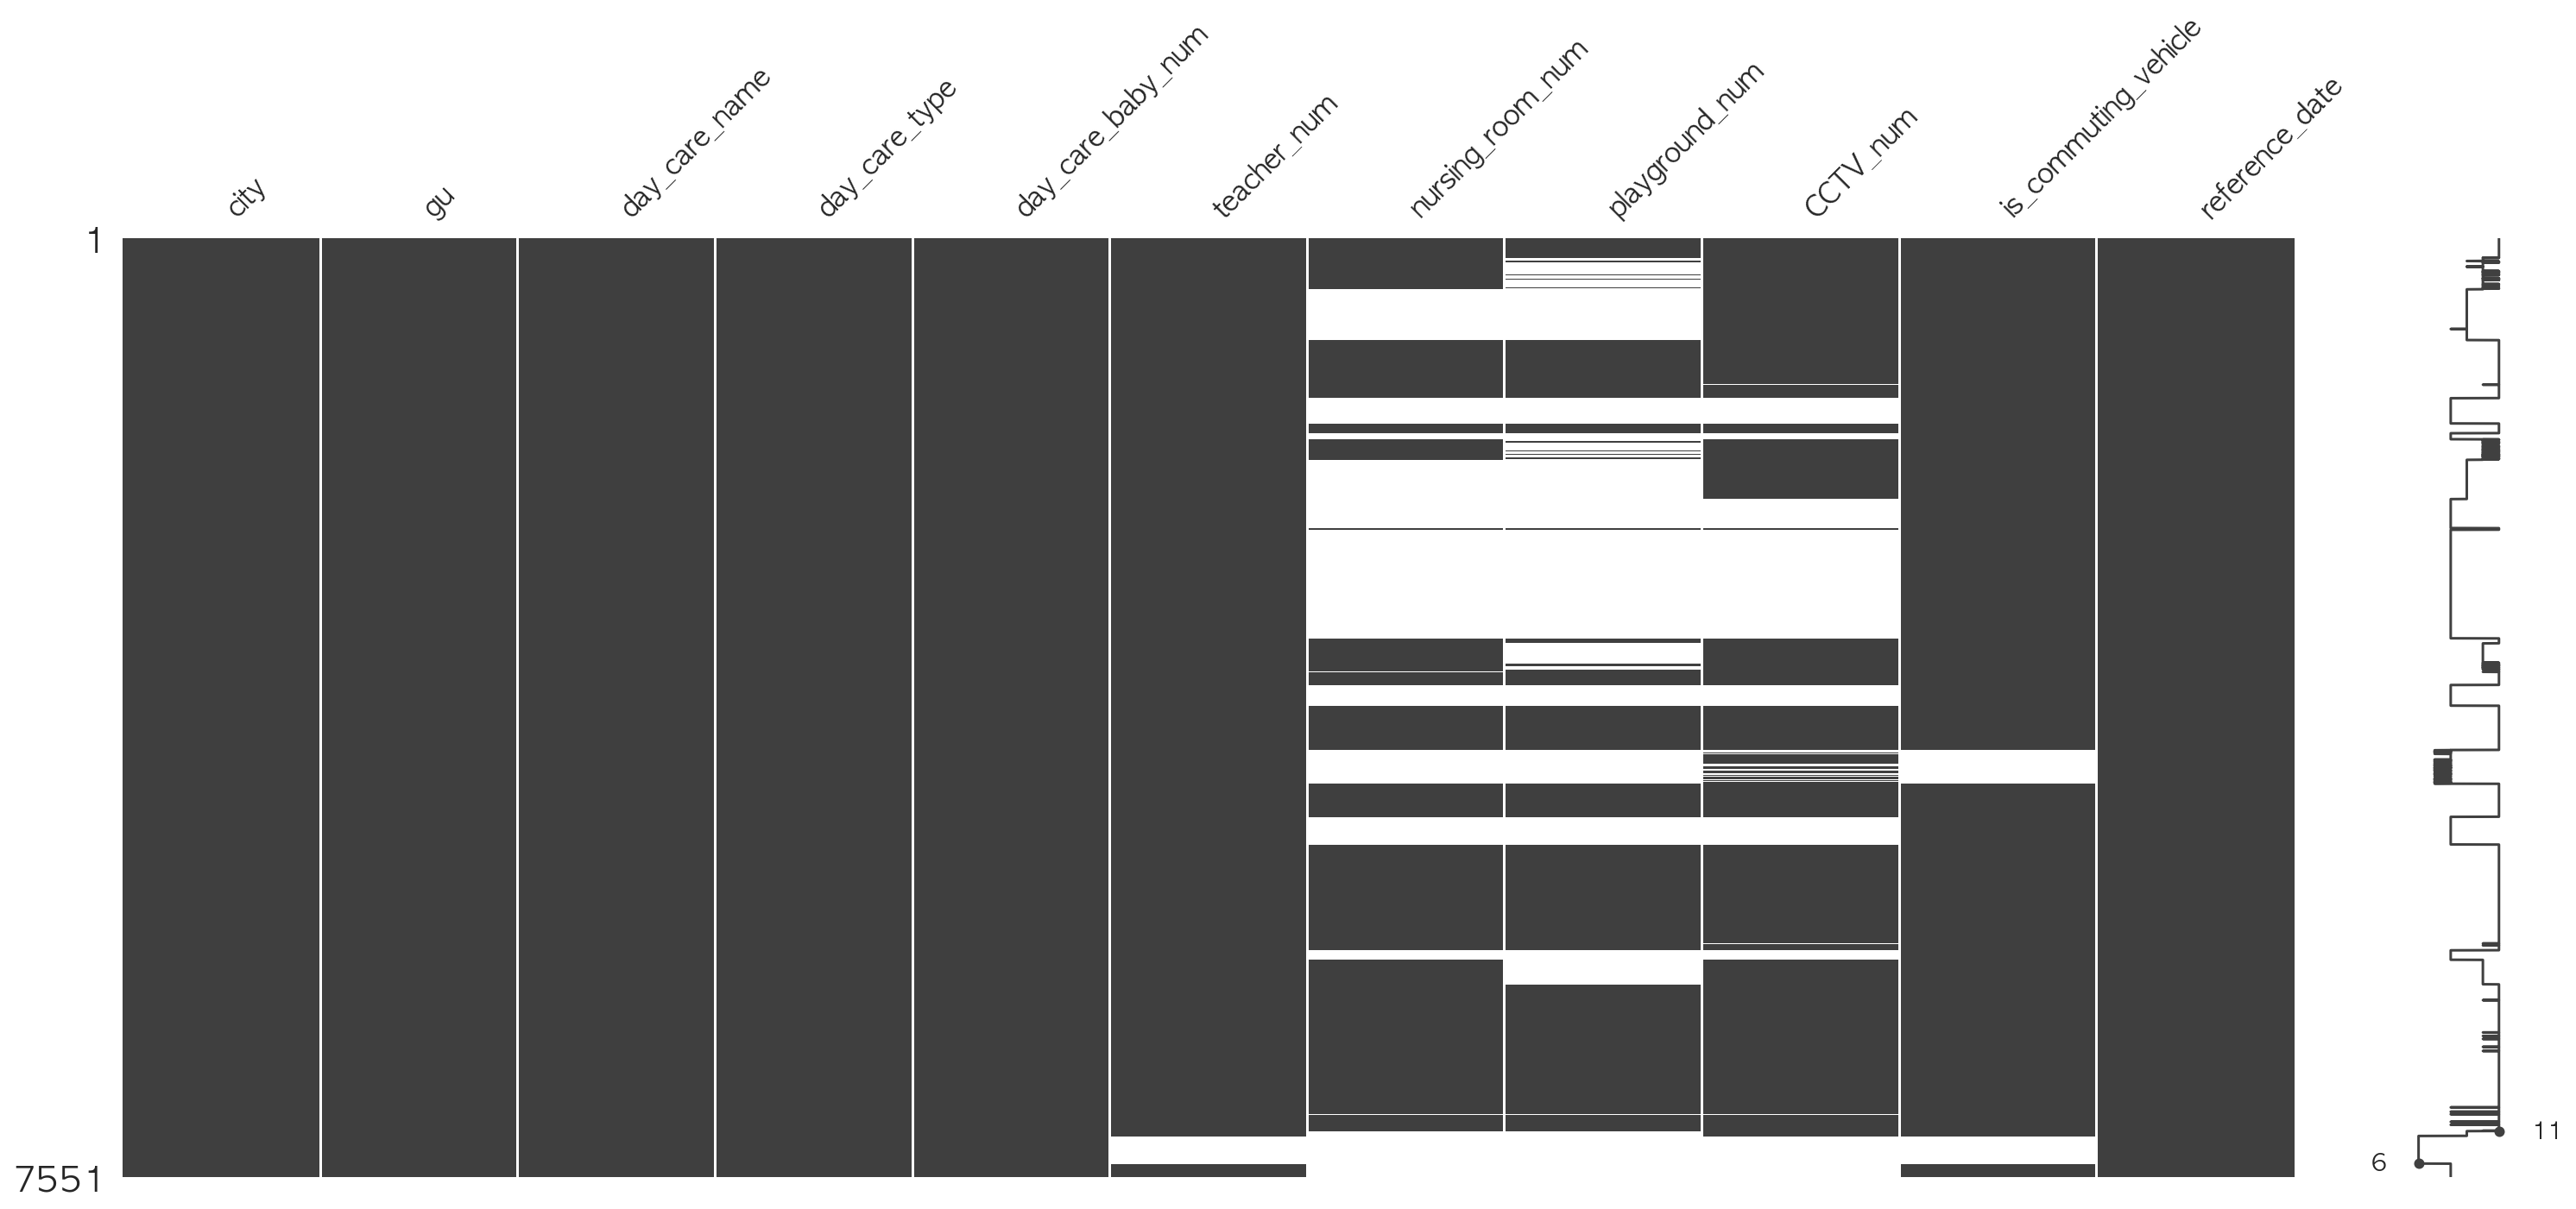

In [29]:
msno.matrix(day_care_center) # day_care_center 데이터의 결측치를 시각화 합니다.

In [30]:
day_care_center[day_care_center["teacher_num"].isnull()]

,city,gu,day_care_name,day_care_type,day_care_baby_num,teacher_num,nursing_room_num,playground_num,CCTV_num,is_commuting_vehicle,reference_date
6417,서울특별시,노원구,우리어린이집,국공립,31,NaN,3.0,0.0,5.0,N,2018-10-10
6538,서울특별시,노원구,하계현대어린이집,국공립,38,NaN,4.0,0.0,6.0,N,2018-10-10
7222,서울특별시,강남구,GKL행복(강남 코엑스2호점)어린이집,직장,49,NaN,NaN,NaN,NaN,NaN,2019-03-05
7223,서울특별시,강남구,GKL행복어린이집,직장,60,NaN,NaN,NaN,NaN,NaN,2019-03-05
7224,서울특별시,강남구,GS리테일 푸르니 어린이집,직장,61,NaN,NaN,NaN,NaN,NaN,2019-03-05
7225,서울특별시,강남구,IBK 참 좋은 어린이집,직장,49,NaN,NaN,NaN,NaN,NaN,2019-03-05
7226,서울특별시,강남구,LH서울어린이집,직장,34,NaN,NaN,NaN,NaN,NaN,2019-03-05
7227,서울특별시,강남구,e편한어린이집,민간,61,NaN,NaN,NaN,NaN,NaN,2019-03-05
7228,서울특별시,강남구,가로수 어린이집,국공립,64,NaN,NaN,NaN,NaN,NaN,2019-03-05
7229,서울특별시,강남구,가온어린이집,국공립,77,NaN,NaN,NaN,NaN,NaN,2019-03-05


teacher_num, nursing_room_num, playground_num, CCTV_num 컬럼은 NaN 이 "없다" 의 의미와 "모른다" 의 의미 모두 가질 수 있습니다.

따라서, NaN 값은 각 컬럼의 평균 값으로 처리하도록 하겠습니다.

is_commuting_vehicle 컬럼은 True, False 로 변환 하도록 하겠으며 NaN 값은 False 로 처리하도록 하겠습니다.

In [31]:
day_care_center_seoul = day_care_center[day_care_center["city"] == "서울특별시"]
day_care_center_busan = day_care_center[day_care_center["city"] == "부산광역시"]

In [32]:
day_care_center["teacher_num_clean"] = day_care_center["teacher_num"].fillna(day_care_center["teacher_num"].mean()).round().astype(int)

day_care_center["nursing_room_num_clean"] = day_care_center["nursing_room_num"].fillna(day_care_center["nursing_room_num"].mean()).round().astype(int)

day_care_center["playground_num_clean"] = day_care_center["playground_num"].fillna(day_care_center["playground_num"].mean()).round().astype(int)

day_care_center["CCTV_num_clean"] = day_care_center["CCTV_num"].fillna(day_care_center["CCTV_num"].mean()).round().astype(int)

print(day_care_center.shape)
day_care_center.head()

(7551, 15)


,city,gu,day_care_name,day_care_type,day_care_baby_num,teacher_num,nursing_room_num,playground_num,CCTV_num,is_commuting_vehicle,reference_date,teacher_num_clean,nursing_room_num_clean,playground_num_clean,CCTV_num_clean
0,서울특별시,서대문구,가람어린이집,국공립,70,11.0,5.0,1.0,7.0,N,2018-07-31,11,5,1,7
1,서울특별시,서대문구,가좌제일어린이집,국공립,88,22.0,5.0,2.0,10.0,N,2018-07-31,22,5,2,10
2,서울특별시,서대문구,경찰청어린이집,직장,90,23.0,6.0,1.0,32.0,N,2018-07-31,23,6,1,32
3,서울특별시,서대문구,고운햇살어린이집,가정,18,5.0,3.0,0.0,4.0,N,2018-07-31,5,3,0,4
4,서울특별시,서대문구,고은어린이집,국공립,93,20.0,7.0,2.0,10.0,N,2018-07-31,20,7,2,10


In [33]:
day_care_center["is_commuting_vehicle"].value_counts()

N    4102
Y    2446
      401
y      88
n      18
Name: is_commuting_vehicle, dtype: int64

In [34]:
day_care_center["is_commuting_vehicle_clean"] = day_care_center["is_commuting_vehicle"].str.replace("y", "Y").str.replace("n", "N")

day_care_center["is_commuting_vehicle_clean"].value_counts()

N    4120
Y    2534
      401
Name: is_commuting_vehicle_clean, dtype: int64

In [35]:
day_care_center["is_commuting_vehicle_clean"] = day_care_center["is_commuting_vehicle_clean"].fillna("N")

def clean_vehicle(row):
    if row == "Y":
        return True
    
    else:
        return False    

In [36]:
day_care_center["is_commuting_vehicle_clean"] = day_care_center["is_commuting_vehicle_clean"].apply(clean_vehicle)

print(day_care_center.shape)
day_care_center

(7551, 16)


,city,gu,day_care_name,day_care_type,day_care_baby_num,teacher_num,nursing_room_num,playground_num,CCTV_num,is_commuting_vehicle,reference_date,teacher_num_clean,nursing_room_num_clean,playground_num_clean,CCTV_num_clean,is_commuting_vehicle_clean
0,서울특별시,서대문구,가람어린이집,국공립,70,11.0,5.0,1.0,7.0,N,2018-07-31,11,5,1,7,False
1,서울특별시,서대문구,가좌제일어린이집,국공립,88,22.0,5.0,2.0,10.0,N,2018-07-31,22,5,2,10,False
2,서울특별시,서대문구,경찰청어린이집,직장,90,23.0,6.0,1.0,32.0,N,2018-07-31,23,6,1,32,False
3,서울특별시,서대문구,고운햇살어린이집,가정,18,5.0,3.0,0.0,4.0,N,2018-07-31,5,3,0,4,False
4,서울특별시,서대문구,고은어린이집,국공립,93,20.0,7.0,2.0,10.0,N,2018-07-31,20,7,2,10,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7546,부산광역시,금정구,해바라기어린이집,민간,46,13.0,NaN,NaN,NaN,y,2019-01-21,13,5,0,7,True
7547,부산광역시,금정구,해수어린이집,가정,19,6.0,NaN,NaN,NaN,y,2019-01-21,6,5,0,7,True
7548,부산광역시,금정구,행복한그림동산어린이집,민간,92,16.0,NaN,NaN,NaN,y,2019-01-21,16,5,0,7,True
7549,부산광역시,금정구,행복한어린이집,민간,43,12.0,NaN,NaN,NaN,y,2019-01-21,12,5,0,7,True


In [37]:
day_care_center["is_commuting_vehicle_clean"].value_counts()

False    5017
True     2534
Name: is_commuting_vehicle_clean, dtype: int64

reference_date 컬럼을 연/월/일/요일로 구분하여 새로운 컬럼에 할당합니다.

In [38]:
day_care_center["reference_date"] = pd.to_datetime(day_care_center["reference_date"])
day_care_center["reference_year"] = day_care_center["reference_date"].dt.year
day_care_center["reference_month"] = day_care_center["reference_date"].dt.month
day_care_center["reference_day"] = day_care_center["reference_date"].dt.day
day_care_center["reference_weekday"] = day_care_center["reference_date"].dt.weekday_name

print(day_care_center.shape)
day_care_center[["reference_date", "reference_year", "reference_month", "reference_day", "reference_weekday"]].head()

(7551, 20)


,reference_date,reference_year,reference_month,reference_day,reference_weekday
0,2018-07-31,2018,7,31,Tuesday
1,2018-07-31,2018,7,31,Tuesday
2,2018-07-31,2018,7,31,Tuesday
3,2018-07-31,2018,7,31,Tuesday
4,2018-07-31,2018,7,31,Tuesday


In [39]:
day_care_center.head()

,city,gu,day_care_name,day_care_type,day_care_baby_num,teacher_num,nursing_room_num,playground_num,CCTV_num,is_commuting_vehicle,reference_date,teacher_num_clean,nursing_room_num_clean,playground_num_clean,CCTV_num_clean,is_commuting_vehicle_clean,reference_year,reference_month,reference_day,reference_weekday
0,서울특별시,서대문구,가람어린이집,국공립,70,11.0,5.0,1.0,7.0,N,2018-07-31,11,5,1,7,False,2018,7,31,Tuesday
1,서울특별시,서대문구,가좌제일어린이집,국공립,88,22.0,5.0,2.0,10.0,N,2018-07-31,22,5,2,10,False,2018,7,31,Tuesday
2,서울특별시,서대문구,경찰청어린이집,직장,90,23.0,6.0,1.0,32.0,N,2018-07-31,23,6,1,32,False,2018,7,31,Tuesday
3,서울특별시,서대문구,고운햇살어린이집,가정,18,5.0,3.0,0.0,4.0,N,2018-07-31,5,3,0,4,False,2018,7,31,Tuesday
4,서울특별시,서대문구,고은어린이집,국공립,93,20.0,7.0,2.0,10.0,N,2018-07-31,20,7,2,10,False,2018,7,31,Tuesday


---

# E.D.A

## train data

### city 컬럼

In [40]:
train["city"].value_counts()

서울특별시    742285
부산광역시    474268
Name: city, dtype: int64

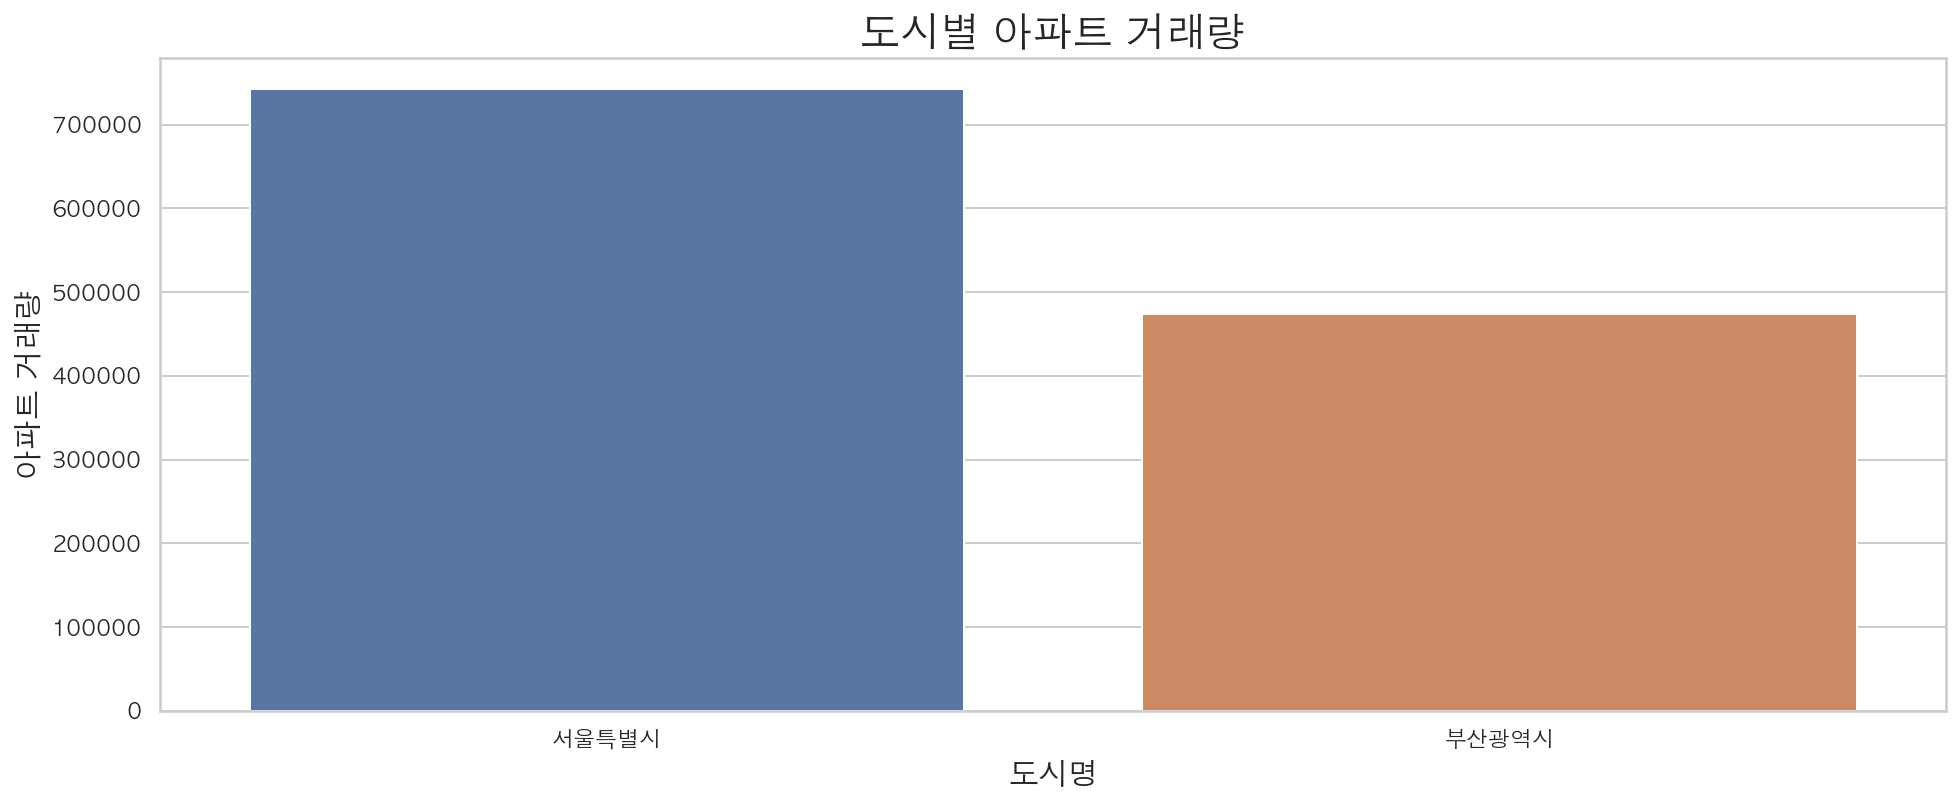

In [41]:
plt.figure(figsize = (16, 6))
plt.title("도시별 아파트 거래량", fontsize = 20, fontweight = "bold")

ax = sns.countplot(data = train, x = "city")

ax.set_xlabel("도시명", fontsize = 15, fontweight = "bold")
ax.set_ylabel("아파트 거래량", fontsize = 15, fontweight = "bold")

plt.show()

서울특별시가 부산광역시보다 거래량이 많다.

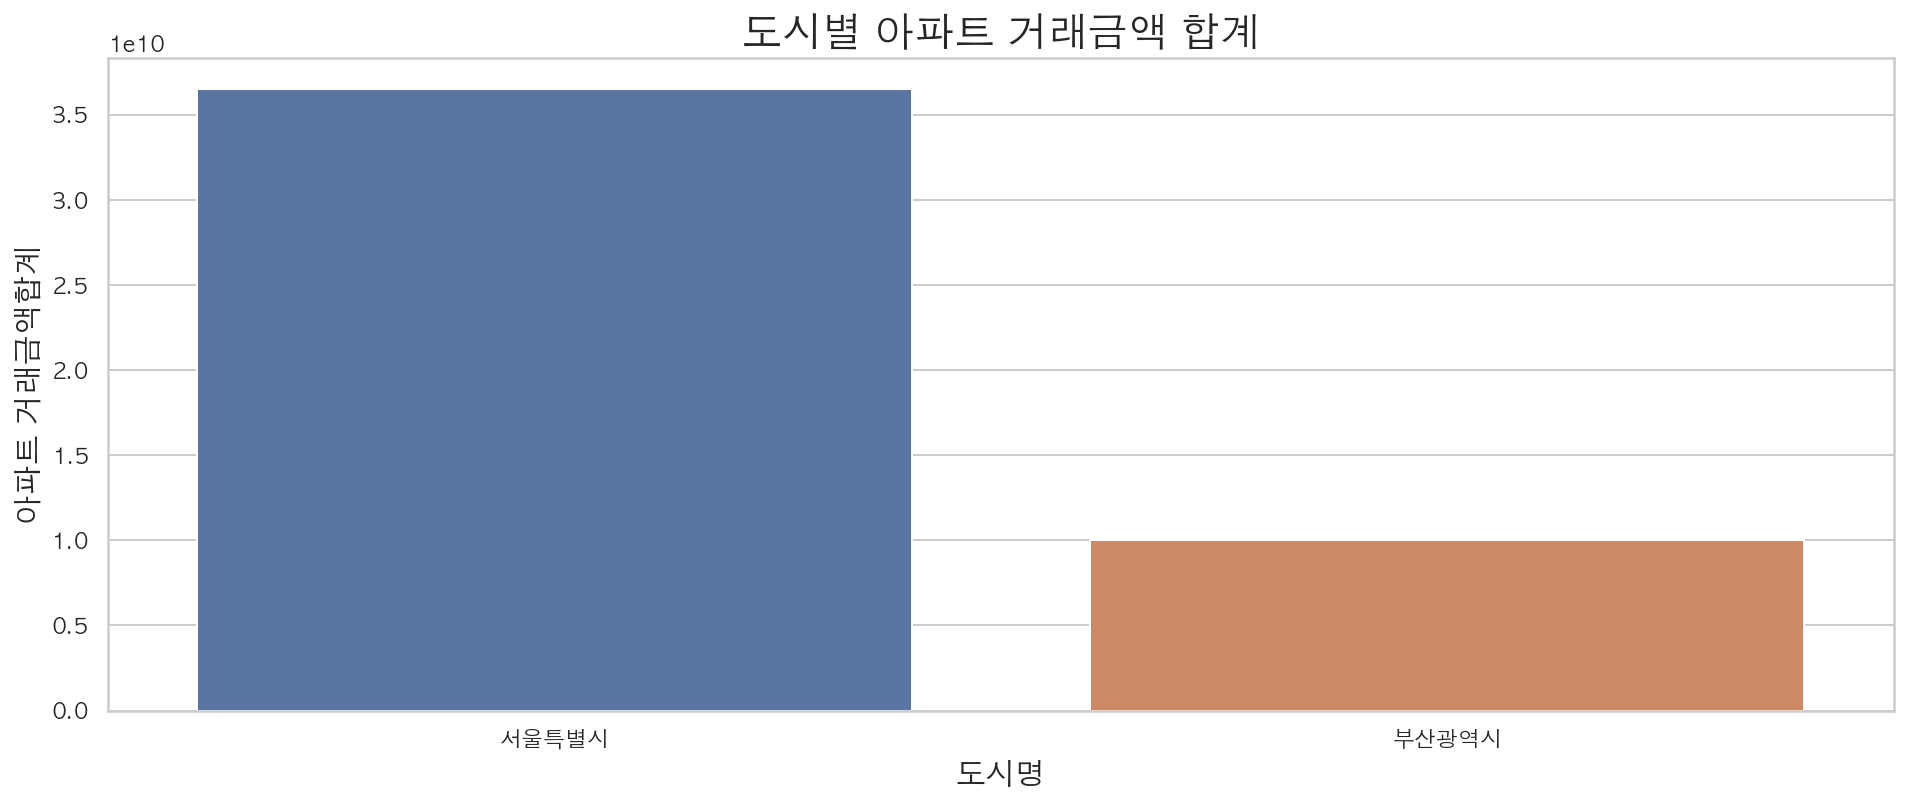

In [42]:
df_group = train.groupby(["city"])["transaction_real_price"].sum().reset_index().sort_values(by = "transaction_real_price",
                                                                                             ascending = False)
df_group = df_group.rename(columns = {"transaction_real_price" : "거래금액합계"})

plt.figure(figsize = (16, 6))
plt.title("도시별 아파트 거래금액 합계", fontsize = 20, fontweight = "bold")

ax = sns.barplot(data = df_group, x = "city", y = "거래금액합계")

ax.set_xlabel("도시명", fontsize = 15, fontweight = "bold")
ax.set_ylabel("아파트 거래금액합계", fontsize = 15, fontweight = "bold")

plt.show()

서울특별시가 부산광역시보다 거래금액도 훨씬 크다.

### dong 컬럼

In [43]:
df_dong = train.groupby(["city","dong"])["transaction_real_price"].mean().reset_index().sort_values(by = "transaction_real_price",
                                                                                                   ascending = False)
df_dong = df_dong.rename(columns = {"transaction_real_price" : "거래금액평균"})

df_dong = df_dong.reset_index(drop = True)

df_dong

,city,dong,거래금액평균
0,서울특별시,장충동1가,269888.888889
1,서울특별시,압구정동,164534.722914
2,서울특별시,청암동,161403.700000
3,서울특별시,용산동5가,153497.331633
4,서울특별시,회현동2가,139906.140351
5,서울특별시,반포동,132489.395651
6,서울특별시,한남동,122593.293264
7,서울특별시,서빙고동,116547.239777
8,서울특별시,대치동,116320.538909
9,서울특별시,남대문로5가,113153.604651


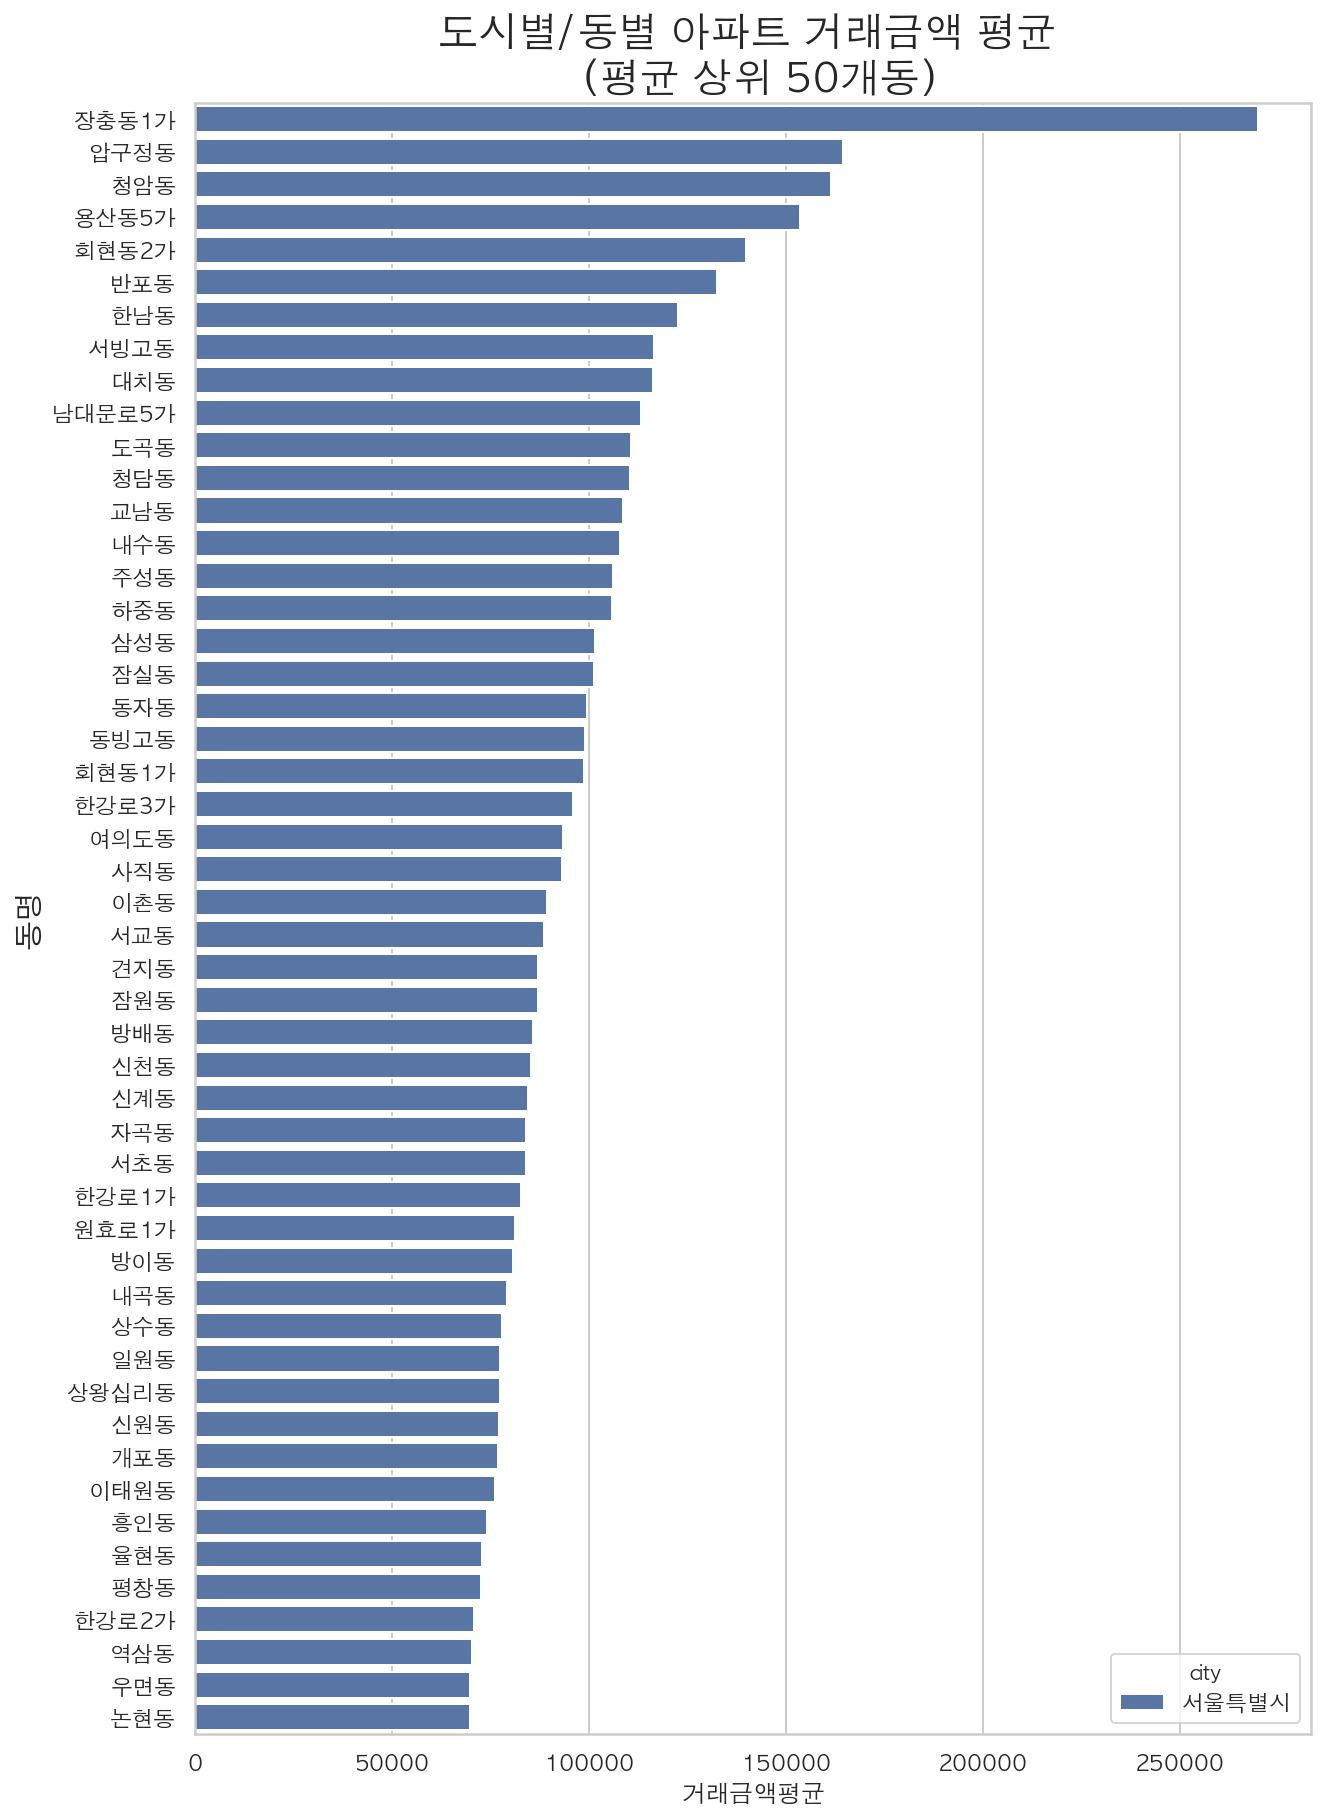

In [44]:
plt.figure(figsize = (10, 15))
plt.title("도시별/동별 아파트 거래금액 평균 \n (평균 상위 50개동)", fontsize = 20, fontweight = "bold")

# 동의 갯수가 너무 많기 때문에 거래금액평균 기준, 상위 50개 동만 확인
ax = sns.barplot(data = df_dong.head(50), y = "dong", x = "거래금액평균", hue = "city")

ax.set_ylabel("동명", fontsize = 15, fontweight = "bold")

plt.show()

거래금액 상위 50개동은 전부 서울특별시에 있다.

### exclusive_use_area 컬럼

In [45]:
train["exclusive_use_area"].value_counts()

84.990    22549
84.960    20336
84.970    19238
84.980    18154
59.990    13288
          ...  
48.275        1
68.420        1
18.930        1
42.950        1
32.000        1
Name: exclusive_use_area, Length: 16856, dtype: int64

In [46]:
# 전용면적을 반올림하여 별도 컬럼에 할당 후 확인
train["exclusive_use_area_clean"] = train["exclusive_use_area"].round().astype(int)

print(train.shape)
train.head()

(1216553, 16)


,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price,transaction_year,transaction_month,exclusive_use_area_clean
0,0,7622,서울특별시,신교동,6-13,신현(101동),신교동 6-13 신현(101동),84.82,2002,200801,21~31,2,37500,2008,1,85
1,1,5399,서울특별시,필운동,142,사직파크맨션,필운동 142 사직파크맨션,99.17,1973,200801,1~10,6,20000,2008,1,99
2,2,3578,서울특별시,필운동,174-1,두레엘리시안,필운동 174-1 두레엘리시안,84.74,2007,200801,1~10,6,38500,2008,1,85
3,3,10957,서울특별시,내수동,95,파크팰리스,내수동 95 파크팰리스,146.39,2003,200801,11~20,15,118000,2008,1,146
4,4,10639,서울특별시,내수동,110-15,킹스매너,내수동 110-15 킹스매너,194.43,2004,200801,21~31,3,120000,2008,1,194


In [47]:
train["exclusive_use_area_clean"].value_counts() 

85     332251
60     205834
84      42012
59      35234
50      30967
115     26010
40      17319
83      13065
58      12972
49      12851
41      11417
46      10923
102      9488
80       9099
51       8777
135      8250
45       8139
79       7869
73       7659
71       7658
74       7643
76       7569
82       7566
42       7563
72       7410
57       7403
55       7193
77       7163
44       6921
43       6866
75       6692
81       6626
67       6285
65       6265
69       6133
56       5961
78       5872
114      5558
54       5404
36       5387
47       5302
52       5152
68       5102
53       4997
127      4972
62       4684
116      4575
119      4467
64       4284
34       4151
66       4151
123      4137
61       4132
33       4027
70       4003
63       3987
100      3919
48       3884
134      3867
32       3859
118      3777
101      3766
117      3706
39       3674
125      3613
120      3560
131      3526
108      3517
132      3303
122      3195
106      3183
128   

In [48]:
# test 데이터에도 동일하게 처리
test["exclusive_use_area_clean"] = test["exclusive_use_area"].round().astype(int)

print(test.shape)
test.head()

(5463, 15)


,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_year,transaction_month,exclusive_use_area_clean
0,1145756,10453,서울특별시,목동,938,청학,목동 938 청학,35.5500,2002,201711,11~20,2,2017,11,36
1,1198704,989,부산광역시,초량동,1143-8,고관맨션,초량동 1143-8 고관맨션,68.7200,1977,201708,21~31,2,2017,8,69
2,1222384,8597,부산광역시,괴정동,447-13,우림그린,괴정동 447-13 우림그린,72.5400,1989,201710,11~20,2,2017,10,73
3,1179897,11086,서울특별시,대치동,1007-2,풍림아이원4차(1007-2),대치동 1007-2 풍림아이원4차(1007-2),111.5400,2004,201707,1~10,10,2017,7,112
4,1223091,2121,부산광역시,다대동,1670,다대롯데캐슬블루,다대동 1670 다대롯데캐슬블루,119.6398,2014,201712,11~20,21,2017,12,120


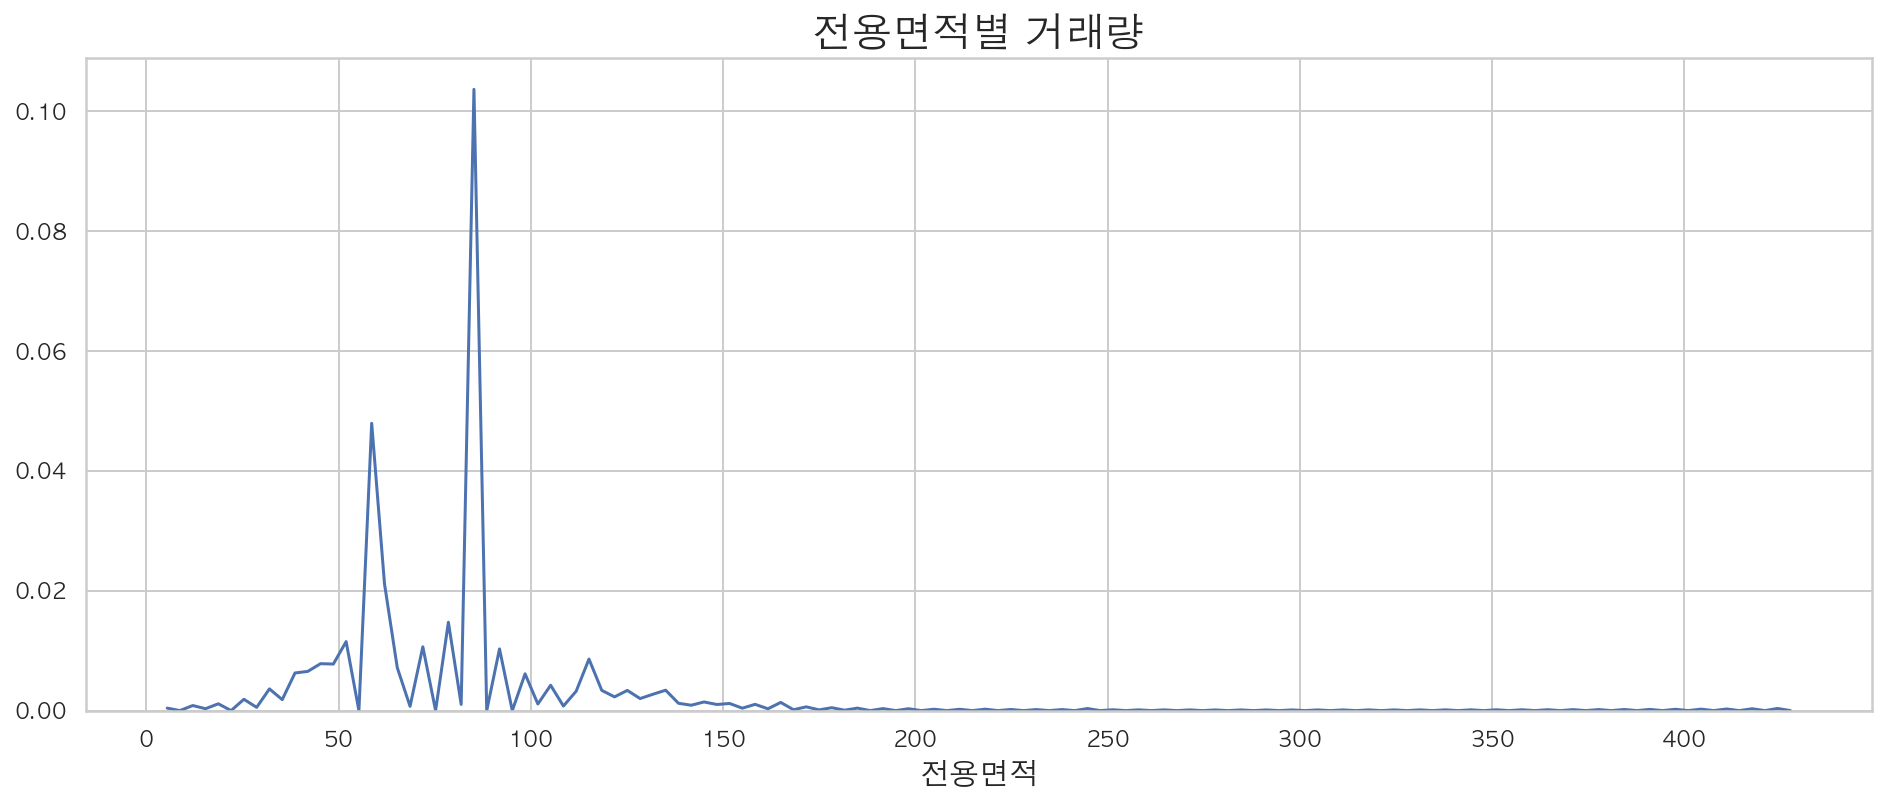

In [49]:
plt.figure(figsize = (16, 6))
plt.title("전용면적별 거래량", fontsize = 20, fontweight = "bold")

ax = sns.distplot(train["exclusive_use_area_clean"], hist = False)

ax.set_xlabel("전용면적", fontsize = 15, fontweight = "bold")
ax.set_xticks(np.arange(0, 401, 50))

plt.show()

전용면적은 대부분 50 ~ 100 제곱미터 사이에 집중 되어 있으며 85, 60 제곱미터가 가장 많이 차지한다.

In [50]:
df_use_area = train.groupby(["city", "exclusive_use_area_clean"])["transaction_real_price"].mean().reset_index().sort_values(by = "transaction_real_price",
                                                                                                                            ascending = False)
df_use_area.columns = ["city", "전용면적", "거래금액평균"]

df_use_area = df_use_area.reset_index(drop = True)

df_use_area

,city,전용면적,거래금액평균
0,서울특별시,272,660000.000000
1,서울특별시,424,498000.000000
2,서울특별시,268,470000.000000
3,서울특별시,264,434585.250000
4,서울특별시,325,420000.000000
...,...,...,...
498,부산광역시,19,5847.540909
499,부산광역시,36,5181.388302
500,부산광역시,13,4786.760870
501,부산광역시,12,4760.714286


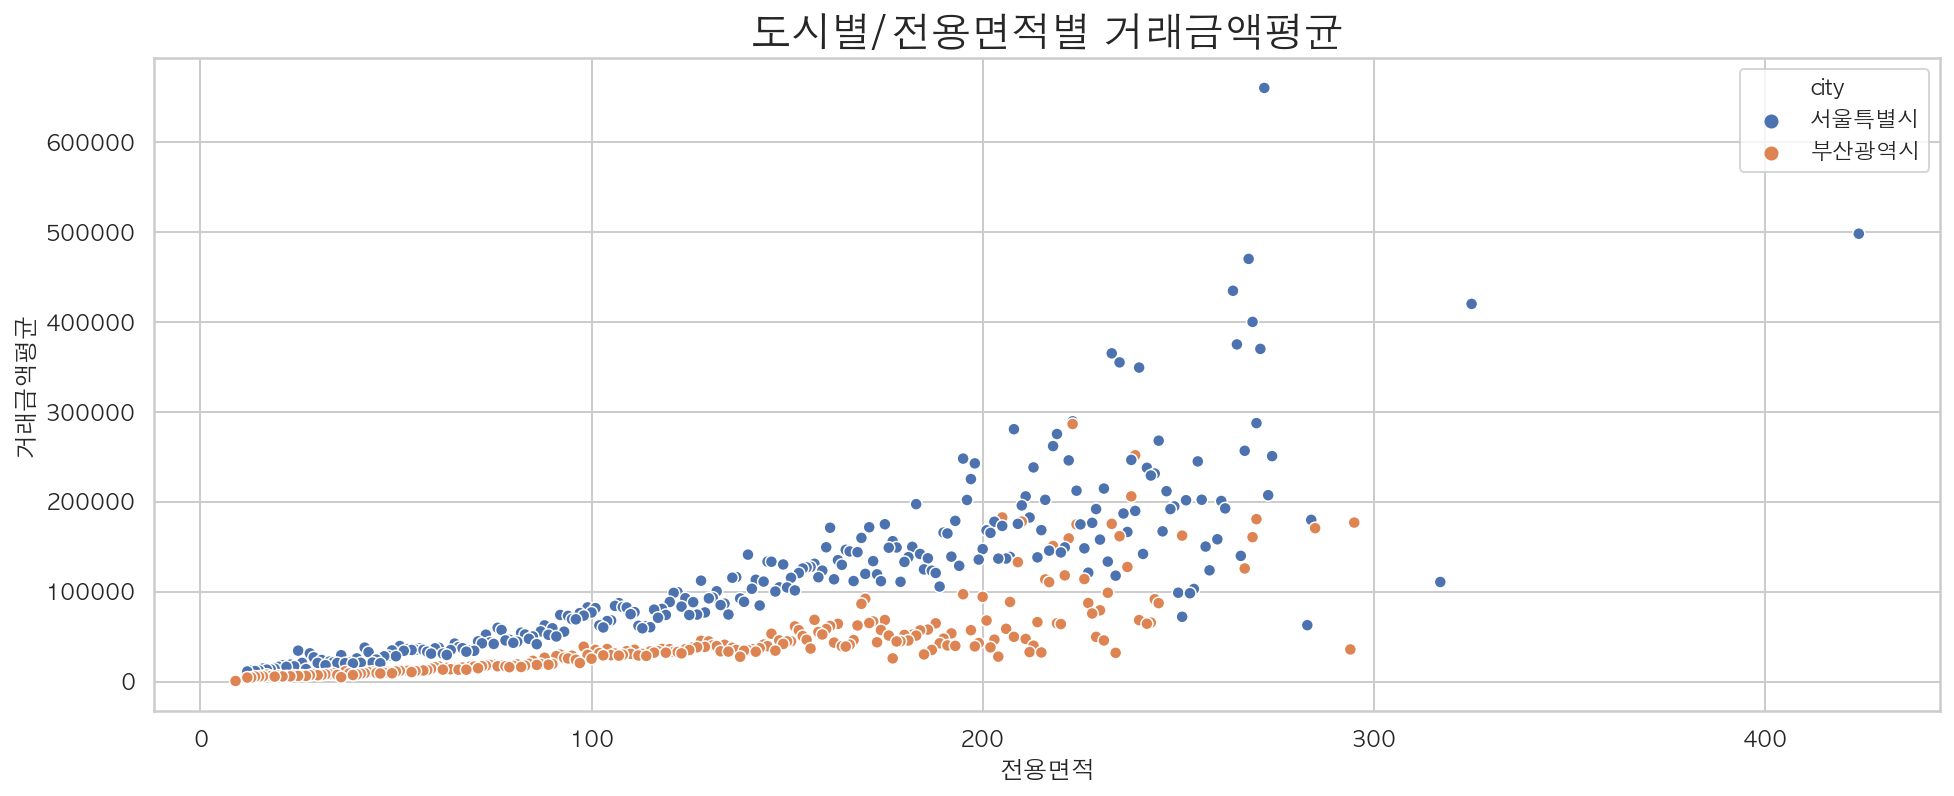

In [51]:
plt.figure(figsize = (16, 6))
plt.title("도시별/전용면적별 거래금액평균", fontsize = 20, fontweight = "bold")

sns.scatterplot(data = df_use_area, x = "전용면적", y = "거래금액평균", hue = "city")

전용면적이 커짐에 따라 거래금액도 높아지는 것을 확인할 수 있으며, 전용면적에 따른 편차가 부산광역시 보다 서울특별시가 좀 더 큰 것을 알 수 있다.

### year_of_completion 컬럼

In [52]:
table_completion = pd.pivot_table(train, index = "year_of_completion",
               values = "transaction_real_price",
              aggfunc = "mean")

table_completion = table_completion.reset_index()
table_completion.columns = ["설립일자", "거래금액평균"]

table_completion

,설립일자,거래금액평균
0,1961,14140.909091
1,1962,2623.676815
2,1965,29461.538462
3,1966,21923.809524
4,1967,7345.000000
5,1968,21386.065574
6,1969,11678.457711
7,1970,29917.896552
8,1971,59439.883582
9,1972,29099.048583


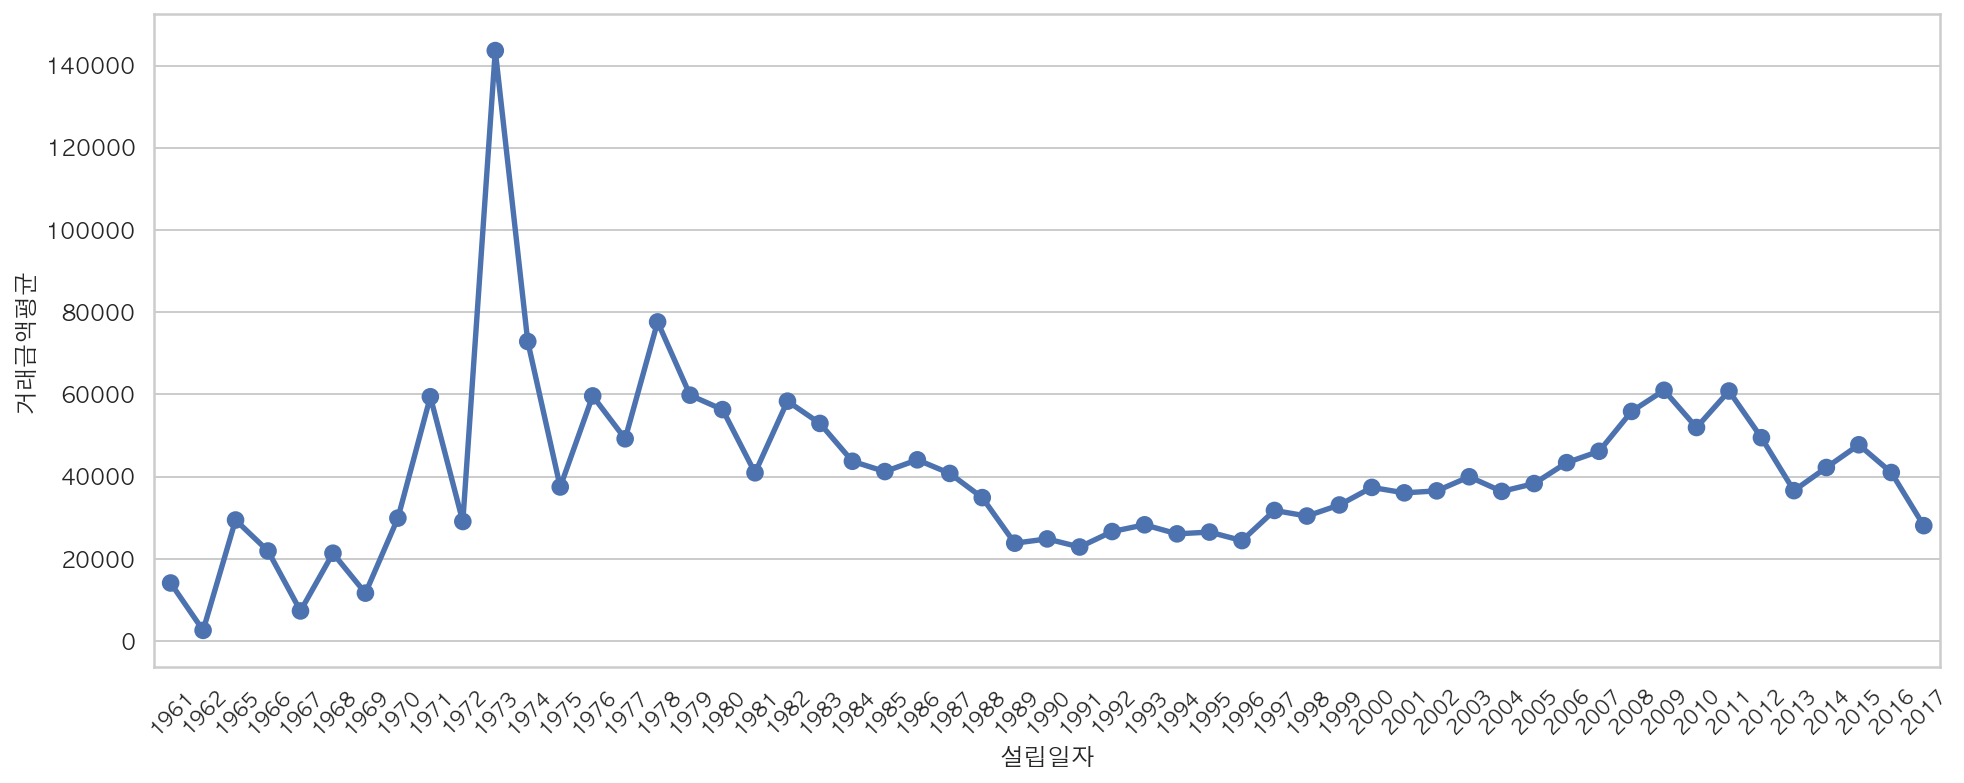

In [53]:
plt.figure(figsize = (16, 6))

ax = sns.pointplot(data = table_completion, x = "설립일자", y = "거래금액평균")

ax.set_xticklabels(ax.get_xticklabels(), fontsize = 10, rotation = 45)

plt.show(ax)

**뭐라고 설명하지?**

### transaction_year 컬럼

In [54]:
train["transaction_year"].value_counts()

2015    181195
2016    165664
2014    136649
2009    127869
2017    123898
2013    109738
2010    102823
2008    100066
2011     98586
2012     70065
Name: transaction_year, dtype: int64

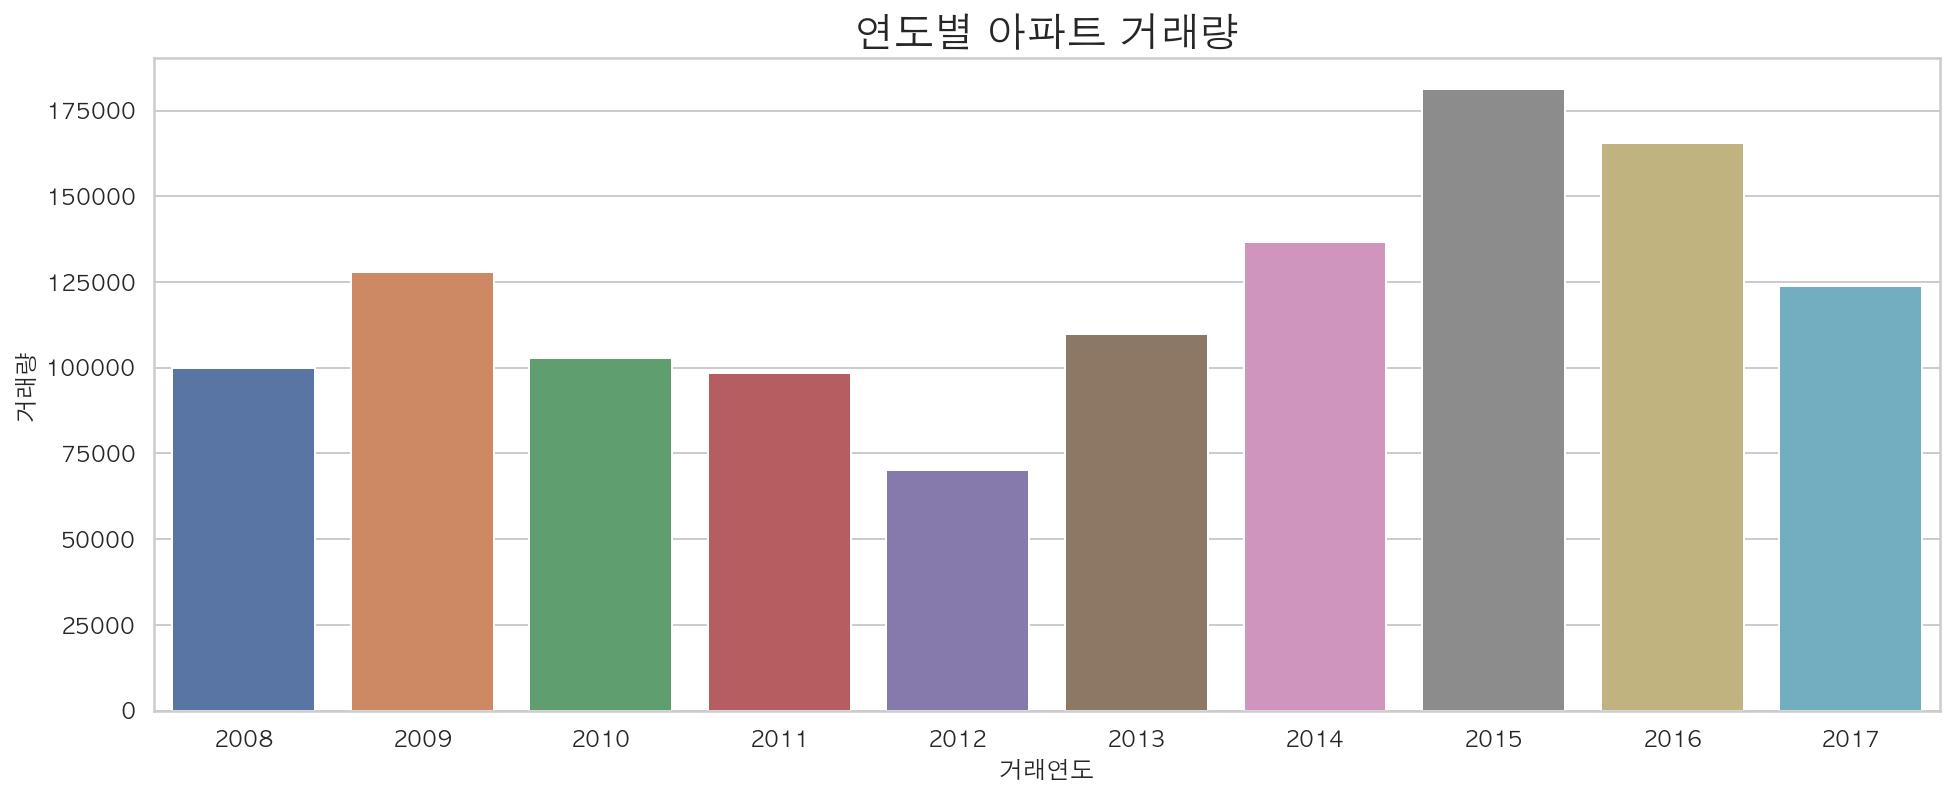

In [55]:
plt.figure(figsize = (16, 6))
plt.title("연도별 아파트 거래량", fontsize = 20, fontweight = "bold")

ax = sns.countplot(data = train, x = "transaction_year")

ax.set_xlabel("거래연도")
ax.set_ylabel("거래량")

plt.show()

2009년부터 2012년까지 거래량이 줄어들다가 2015년까지 다시 상승하였으며 이후 다시 줄어드는 것을 알 수 있다.

In [56]:
df_transaction_year = train.groupby(["transaction_year"])["transaction_real_price"].mean().reset_index()

df_transaction_year.columns = ["거래연도", "거래금액평균"]

df_transaction_year

,거래연도,거래금액평균
0,2008,28241.844273
1,2009,35434.836692
2,2010,31283.698637
3,2011,34711.769562
4,2012,34913.609134
5,2013,35437.995453
6,2014,37124.261334
7,2015,39802.930820
8,2016,44493.034238
9,2017,52616.466069


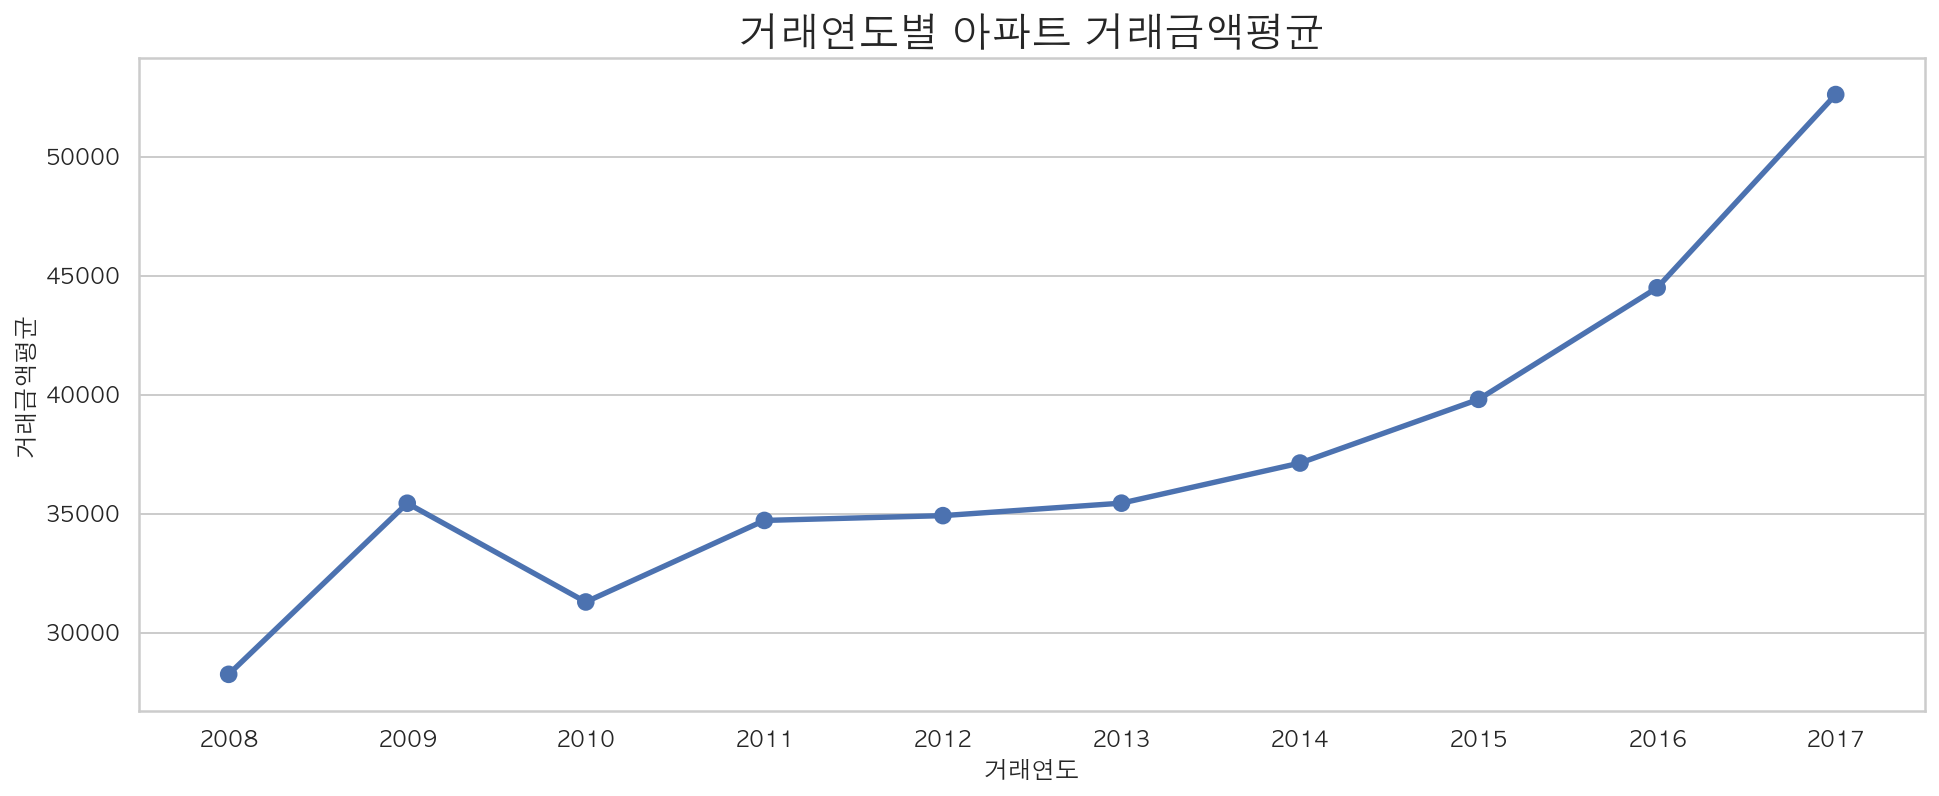

In [57]:
plt.figure(figsize = (16, 6))
plt.title("거래연도별 아파트 거래금액평균", fontsize = 20, fontweight = "bold")

sns.pointplot(data = df_transaction_year, x = "거래연도", y = "거래금액평균")

2009년 ~ 2010년에 거래금액이 일시적으로 줄어들었지만 거래량에 관계없이 지속적으로 거래금액이 증가하는 것을 알 수 있다.

### transaction_month 컬럼

In [58]:
train["transaction_month"].value_counts()

3     125958
4     115363
10    111242
5     110536
6     109841
9     104061
7     102973
8      96163
2      95199
11     87592
1      85622
12     72003
Name: transaction_month, dtype: int64

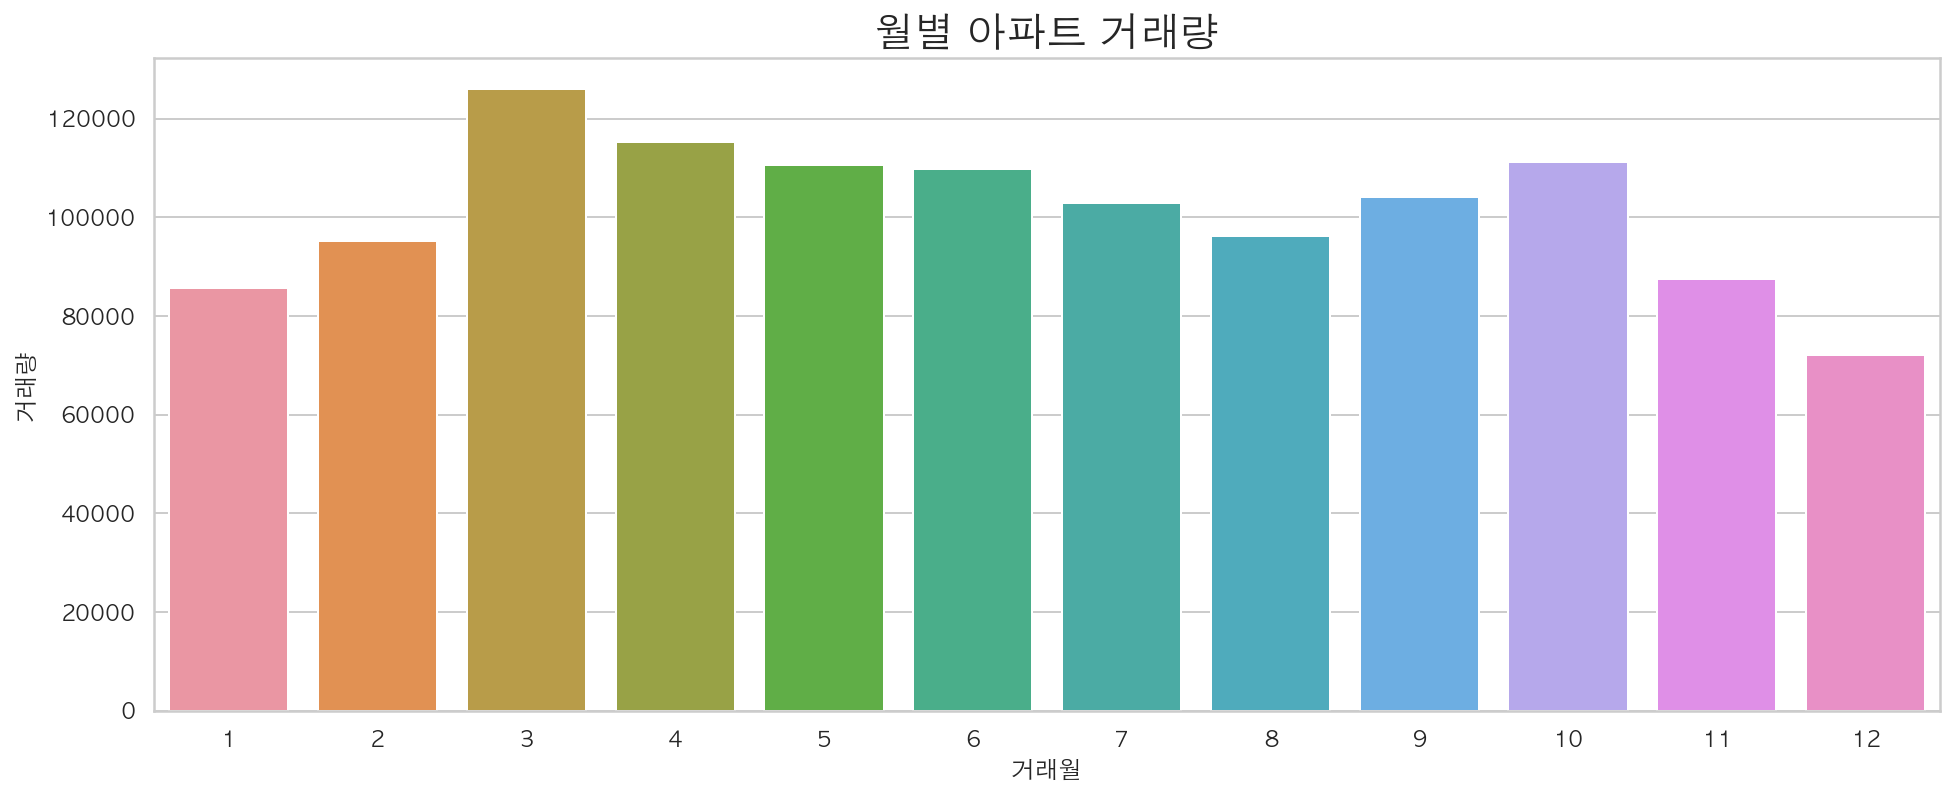

In [59]:
plt.figure(figsize = (16, 6))
plt.title("월별 아파트 거래량", fontsize = 20, fontweight = "bold")

ax = sns.countplot(data = train, x = "transaction_month")

ax.set_xlabel("거래월")
ax.set_ylabel("거래량")

plt.show()

주로 봄 ~ 초여름(3월, 4월, 5월, 6월) 및 10월에 아파트 거래가 많이 이루어진다는 것을 알 수 있다.

In [60]:
df_transaction_month = train.groupby(["transaction_month"])["transaction_real_price"].mean().reset_index()

df_transaction_month.columns = ["거래연도", "거래금액평균"]

df_transaction_month

,거래연도,거래금액평균
0,1,36816.177805
1,2,36181.148804
2,3,35972.992871
3,4,37696.052044
4,5,39771.943693
5,6,39416.884378
6,7,40536.136667
7,8,38179.794266
8,9,38959.674854
9,10,38217.755191


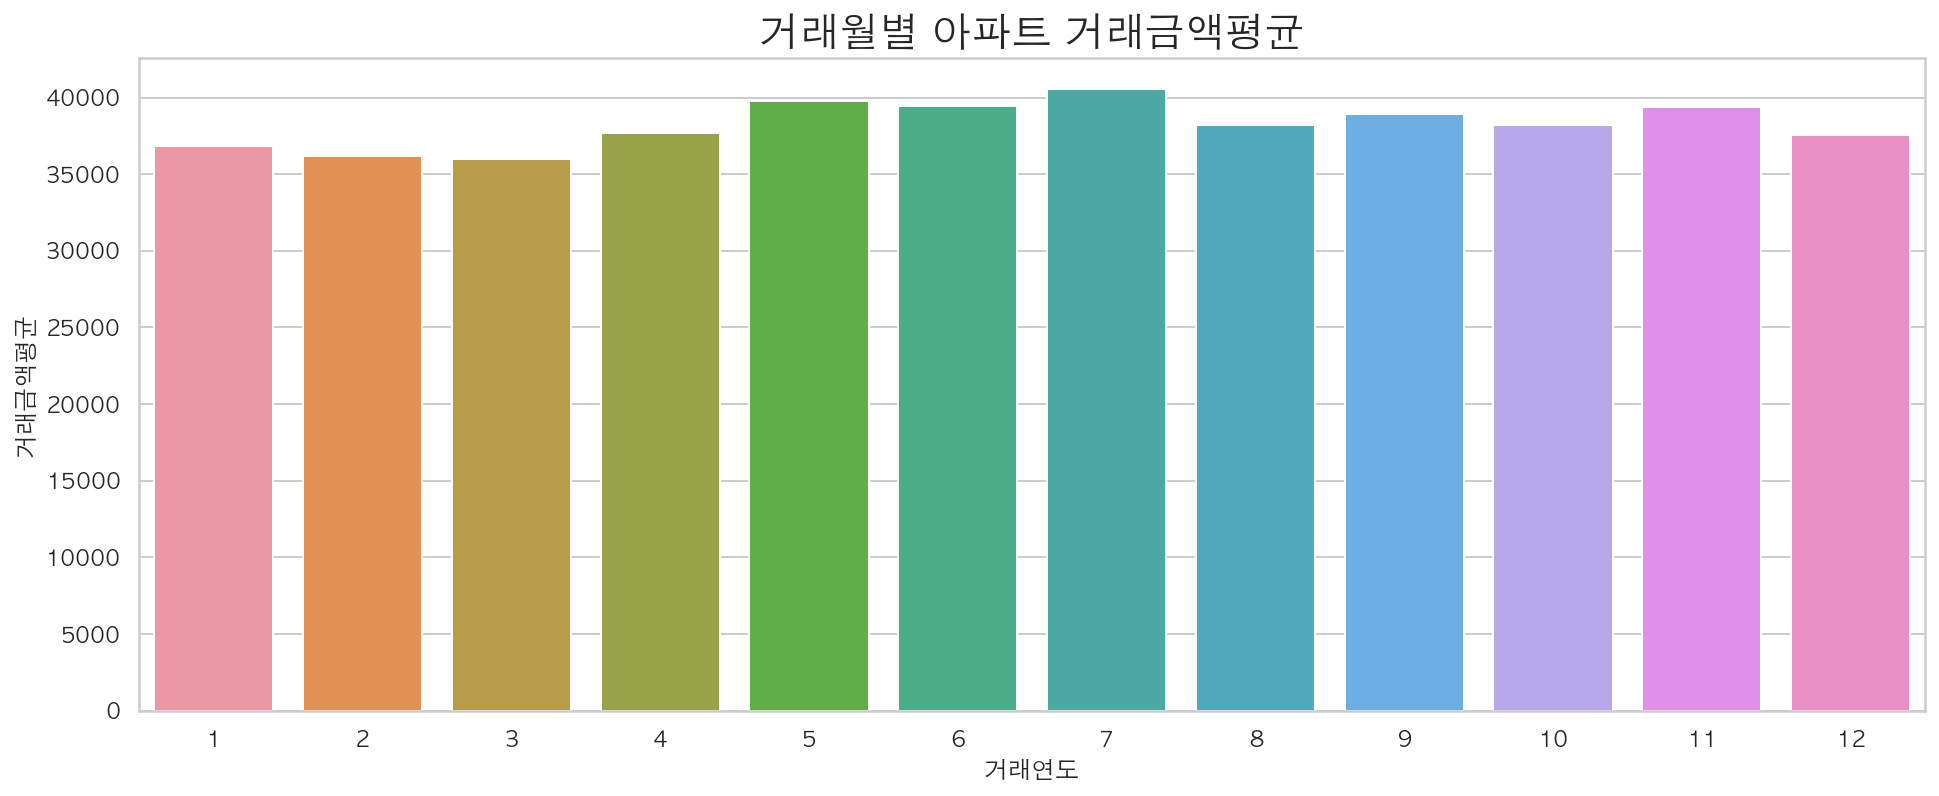

In [61]:
plt.figure(figsize = (16, 6))
plt.title("거래월별 아파트 거래금액평균", fontsize = 20, fontweight = "bold")

sns.barplot(data = df_transaction_month, x = "거래연도", y = "거래금액평균")

5월 ~ 7월에 거래되는 아파트의 금액이 높은 편이지만 전반적으로 월별로 큰 차이가 없다

### transaction_date 컬럼

In [62]:
train["transaction_date"].value_counts()

11~20    408385
1~10     391715
21~31    250588
21~30    134017
21~28     22199
21~29      9649
Name: transaction_date, dtype: int64

In [63]:
# 21~30, 21~28, 21~29 를 21~31 로 변환하여 별도 컬럼에 할당 후 확인

def clean_date(row):
    if row == "21~30":
        return "21~31"
    
    elif row == "21~28":
        return "21~31"
    
    elif row == "21~29":
        return "21~31"
    
    else:
        return row

In [64]:
train["transaction_date_clean"] = train["transaction_date"].apply(clean_date)

print(train.shape)
train[["transaction_date", "transaction_date_clean"]].head()

(1216553, 17)


,transaction_date,transaction_date_clean
0,21~31,21~31
1,1~10,1~10
2,1~10,1~10
3,11~20,11~20
4,21~31,21~31


In [65]:
train["transaction_date_clean"].value_counts()

21~31    416453
11~20    408385
1~10     391715
Name: transaction_date_clean, dtype: int64

In [66]:
# test 데이터도 동일하게 처리
test["transaction_date_clean"] = test["transaction_date"].apply(clean_date)

print(test.shape)
test[["transaction_date", "transaction_date_clean"]].head()

(5463, 16)


,transaction_date,transaction_date_clean
0,11~20,11~20
1,21~31,21~31
2,11~20,11~20
3,1~10,1~10
4,11~20,11~20


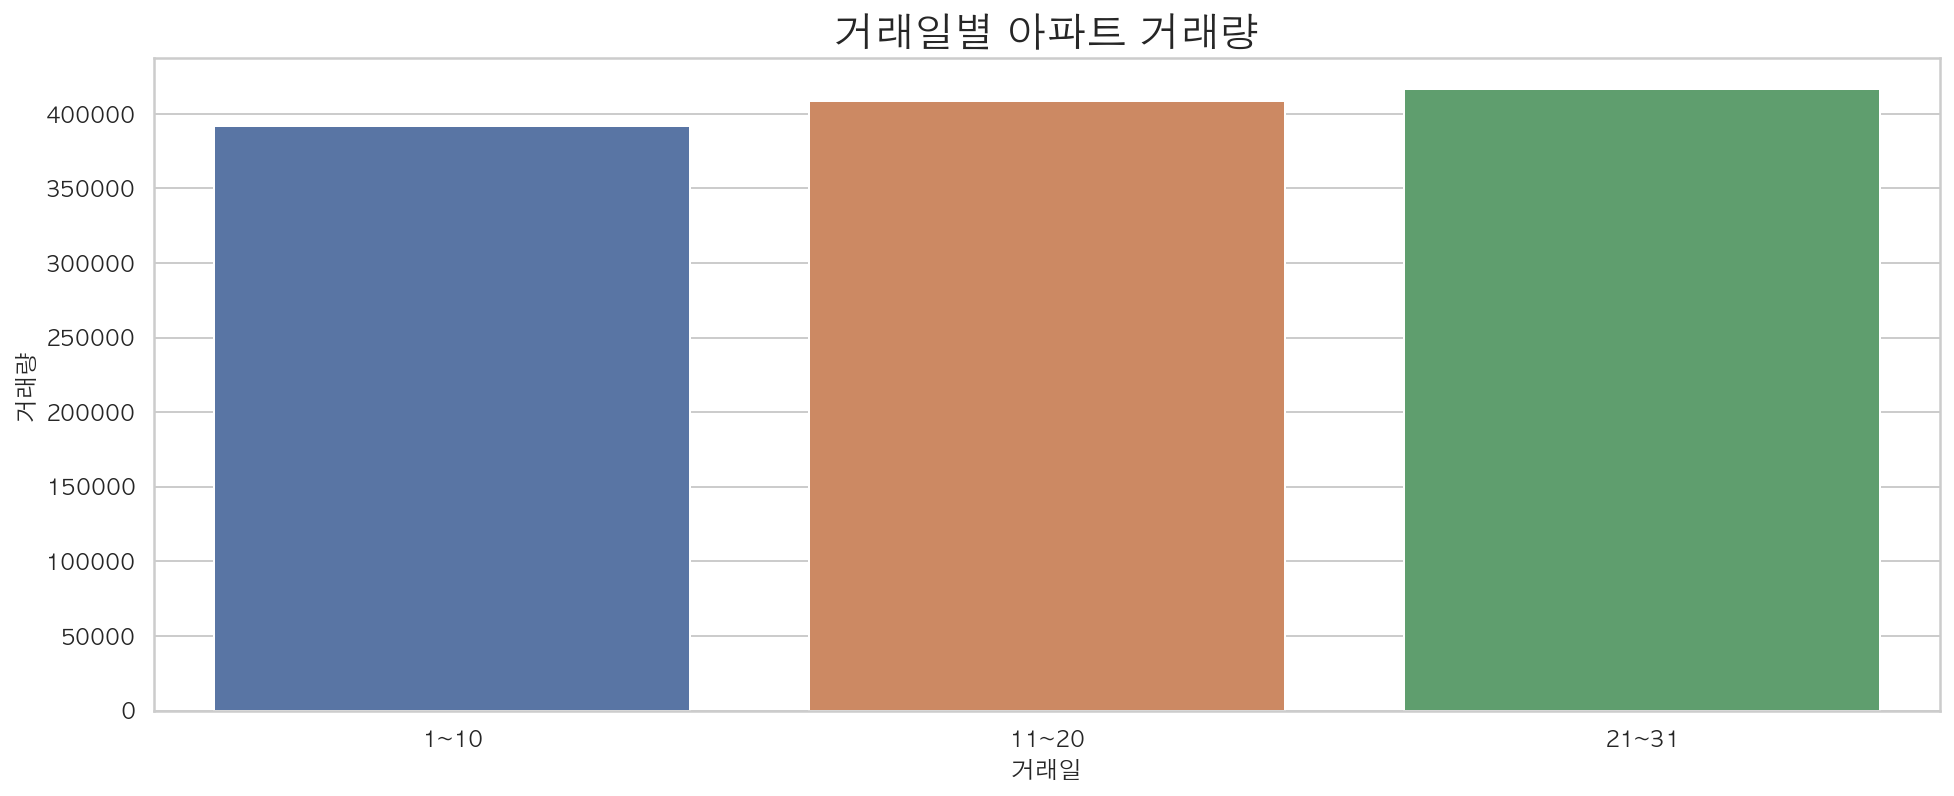

In [67]:
plt.figure(figsize = (16, 6))
plt.title("거래일별 아파트 거래량", fontsize = 20, fontweight = "bold")

order = ["1~10", "11~20", "21~31"]
ax = sns.countplot(data = train, x = "transaction_date_clean", order = order)

ax.set_xlabel("거래일")
ax.set_ylabel("거래량")

plt.show()

월초에서 월말로 갈 수록 거래량이 증가하는 경향이 있으나 큰 차이는 없다.

In [68]:
df_transaction_date = train.groupby(["transaction_date_clean"])["transaction_real_price"].mean().reset_index()

df_transaction_date = df_transaction_date.reset_index(drop = True)

df_transaction_date.columns = ["거래일", "거래금액평균"]

df_transaction_date

,거래일,거래금액평균
0,11~20,38217.678678
1,1~10,37732.015054
2,21~31,38703.747458


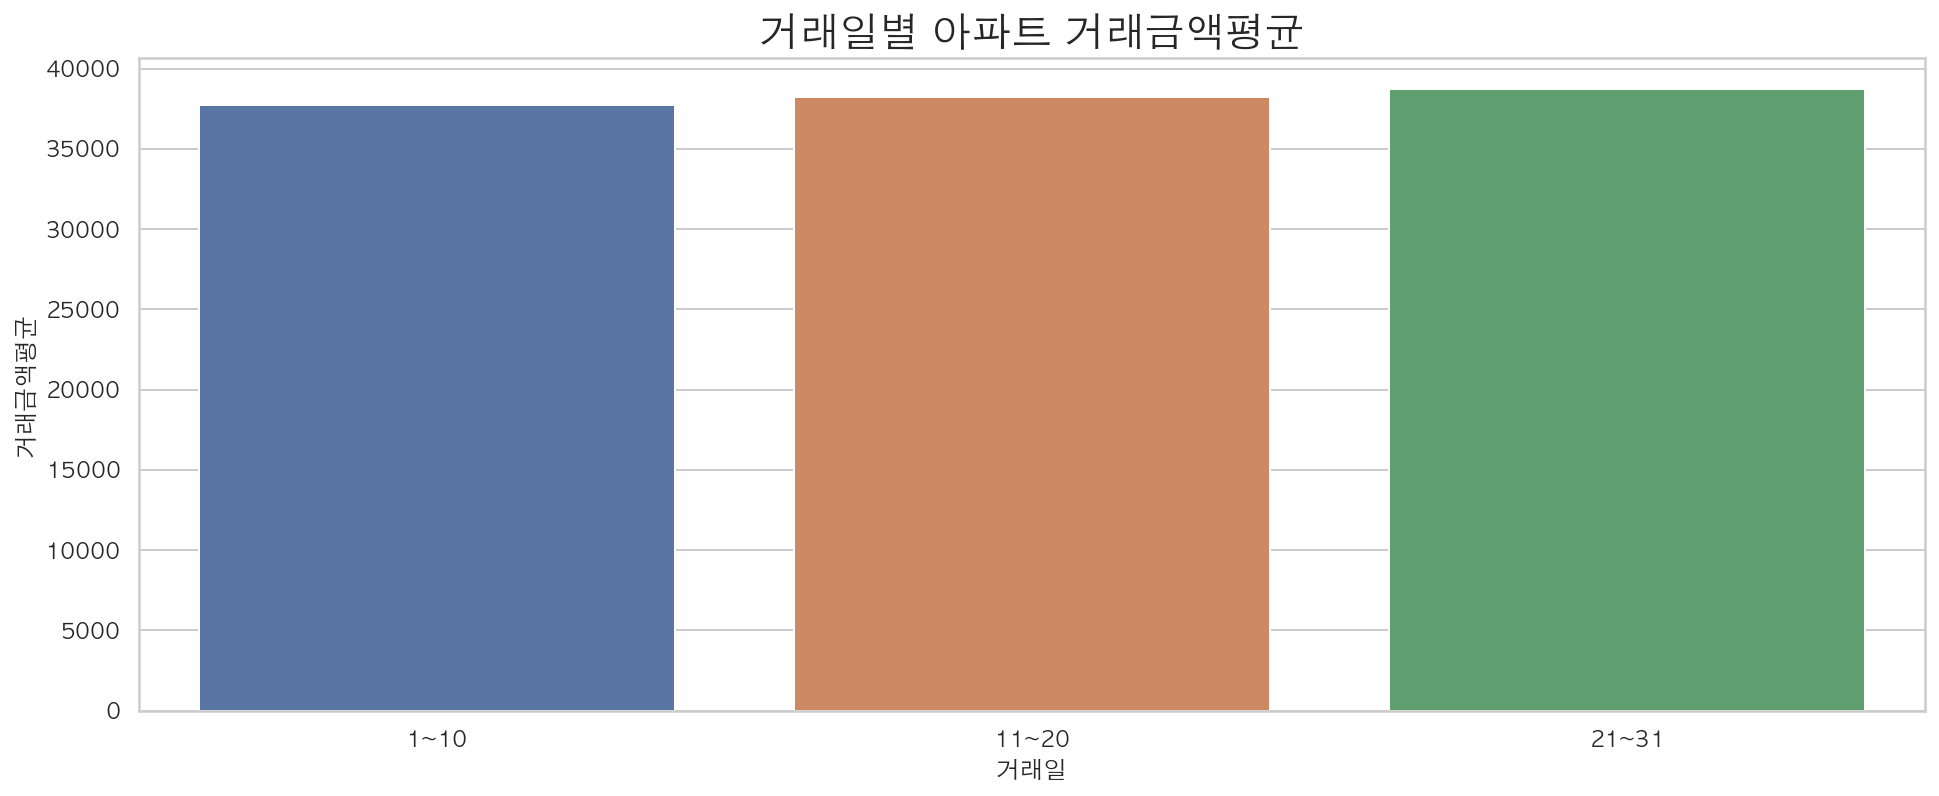

In [69]:
plt.figure(figsize = (16, 6))
plt.title("거래일별 아파트 거래금액평균", fontsize = 20, fontweight = "bold")

sns.barplot(data = df_transaction_date, x = "거래일", y = "거래금액평균", order = order)

거래금액도 월초에서 월말로 갈 수록 높아지고 있으나 차이가 크게 발생하지는 않는다.

### floor 컬럼

In [70]:
train["floor"].unique()

array([ 2,  6, 15,  3, 16,  7,  1,  5,  4, 12,  8, 14, 11, 13, 21, 18, 20,
        9, 10, 17, 23, 19, 28, 22, 25, 29, 30, 26, -1, 27, 24, 32, 33, 31,
       35, 37, 34, 36, 38, 39, 42, 40, 56, 47, 53, -2, 41, 46, 54, 45, 44,
       43, 48, 50, 51, 49, 57, 52, -3, -4, 60, 67, 63, 65, 64, 59, 68, 66,
       58, 62, 55, 69, 61, 70, 75, 76, 74, 73, 79, 72, 80, 78, 77, 71])

In [71]:
# 아파트의 경우, 지하층은 대부분 주차장일 경우가 많으므로 - 로 기재된 층은 잘못 기재되었다고 판단하고 모두 지상층으로 변경 처리

def clean_floor(row):
    if row < 0:
        return abs(row)
    
    else:
        return row

In [72]:
train["floor_clean"] = train["floor"].apply(clean_floor)

print(train.shape)
train["floor_clean"].unique()

(1216553, 18)


array([ 2,  6, 15,  3, 16,  7,  1,  5,  4, 12,  8, 14, 11, 13, 21, 18, 20,
        9, 10, 17, 23, 19, 28, 22, 25, 29, 30, 26, 27, 24, 32, 33, 31, 35,
       37, 34, 36, 38, 39, 42, 40, 56, 47, 53, 41, 46, 54, 45, 44, 43, 48,
       50, 51, 49, 57, 52, 60, 67, 63, 65, 64, 59, 68, 66, 58, 62, 55, 69,
       61, 70, 75, 76, 74, 73, 79, 72, 80, 78, 77, 71])

In [73]:
# test 데이터도 동일하게 처리
test["floor_clean"] = test["floor"].apply(clean_floor)

print(test.shape)
test["floor_clean"].unique()

(5463, 17)


array([ 2, 10, 21,  3, 13,  9,  4, 15, 11, 17,  6,  7,  8,  1, 12,  5, 14,
       18, 16, 19, 34, 20, 31, 22, 39, 30, 27, 25, 23, 26, 24, 28, 40, 36,
       32, 29, 49, 33, 38, 43, 46, 35, 55, 47])

In [74]:
df_floor = train.groupby(["floor_clean"])["transaction_real_price"].mean().reset_index()

df_floor.columns = ["층수", "거래금액평균"]

df_floor

,층수,거래금액평균
0,1,34699.605805
1,2,35500.448527
2,3,36498.691921
3,4,35969.370870
4,5,36332.762754
5,6,37555.051175
6,7,38431.421320
7,8,38486.168576
8,9,38927.633365
9,10,39209.872744


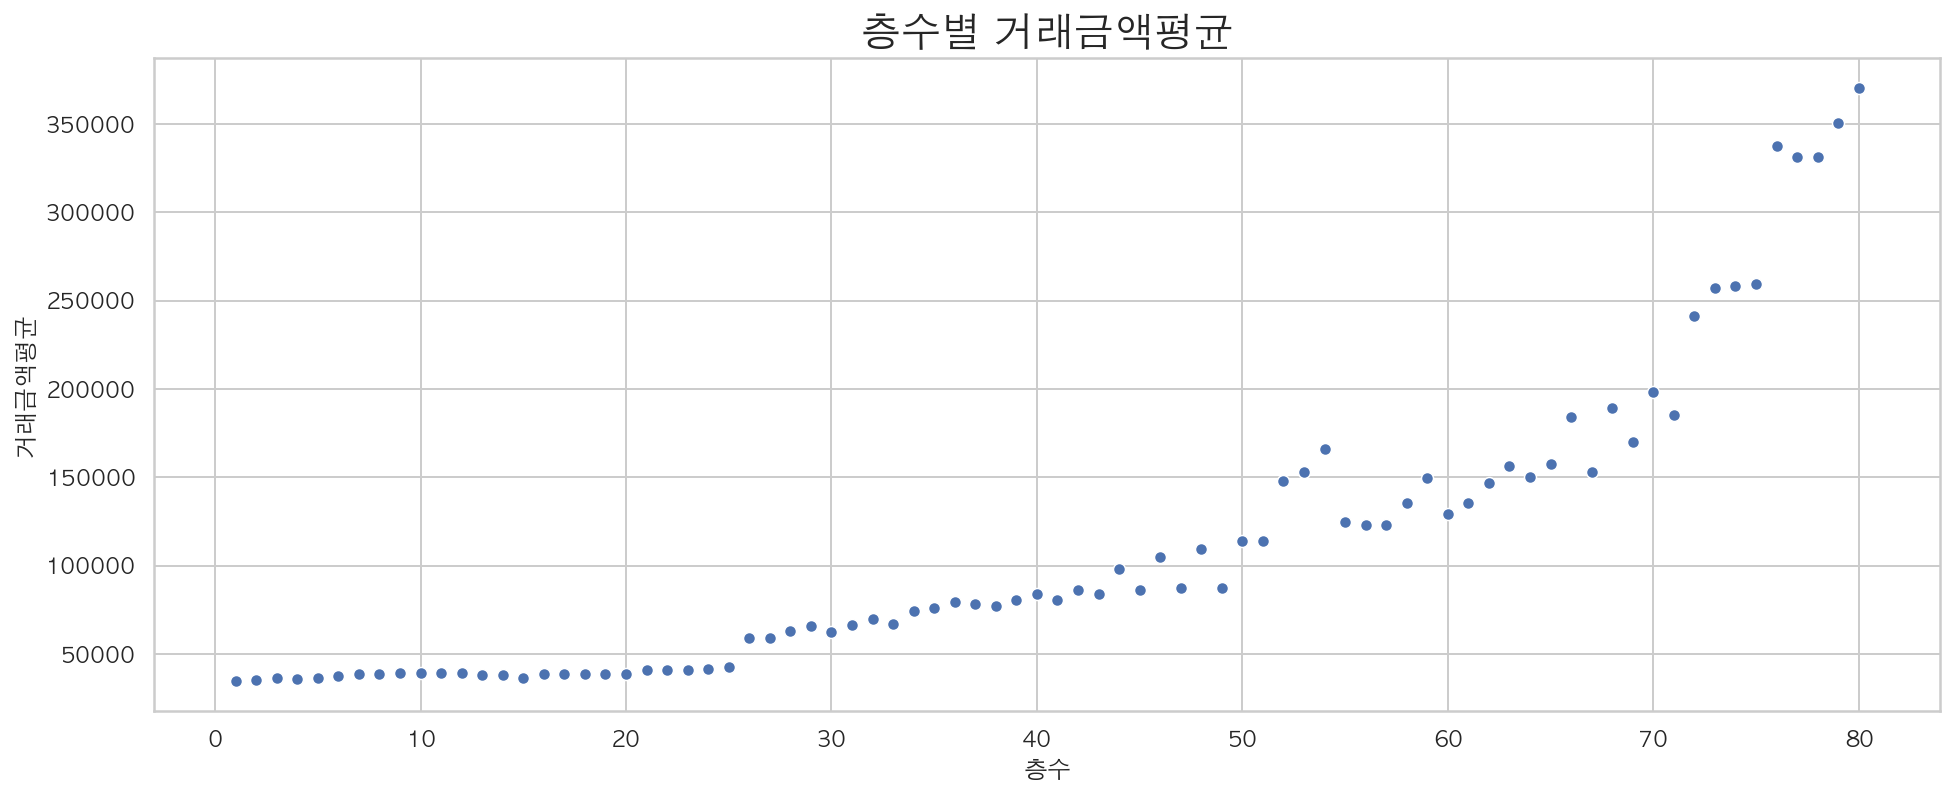

In [75]:
plt.figure(figsize = (16, 6))
plt.title("층수별 거래금액평균", fontsize = 20, fontweight = "bold")

sns.scatterplot(data = df_floor, x = "층수", y = "거래금액평균")

plt.show()

25층 이하에서는 층수별로 금액이 차이가 크게 없으나 26층부터 층수별로 거래금액이 뚜렷한 차이를 나타내며 60층 이상에서는 층수별로 거래금액이 급격한 차이를 보이고 있다.

### transaction_real_price 컬럼

In [76]:
train["transaction_real_price"].value_counts()

30000    10790
40000     9327
35000     9156
25000     9149
32000     8778
         ...  
33323        1
55840        1
78365        1
72216        1
6147         1
Name: transaction_real_price, Length: 21200, dtype: int64

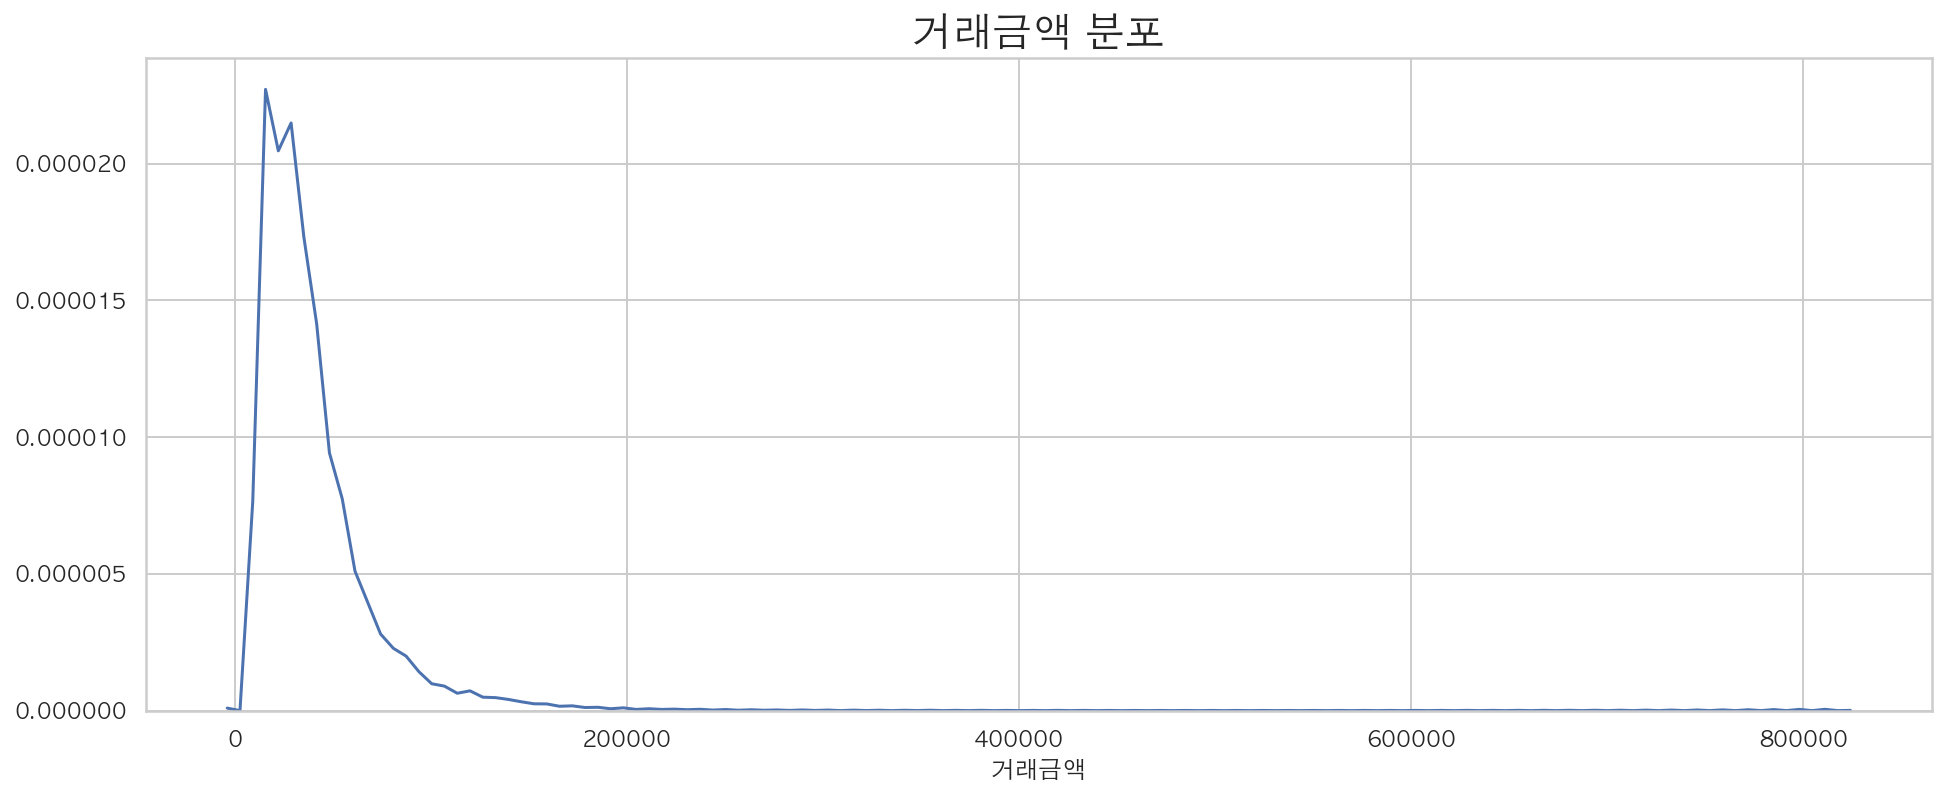

In [77]:
plt.figure(figsize = (16, 6))
plt.title("거래금액 분포", fontsize = 20, fontweight = "bold")

ax = sns.distplot(train["transaction_real_price"], hist = False)

ax.set_xlabel("거래금액")
plt.show()

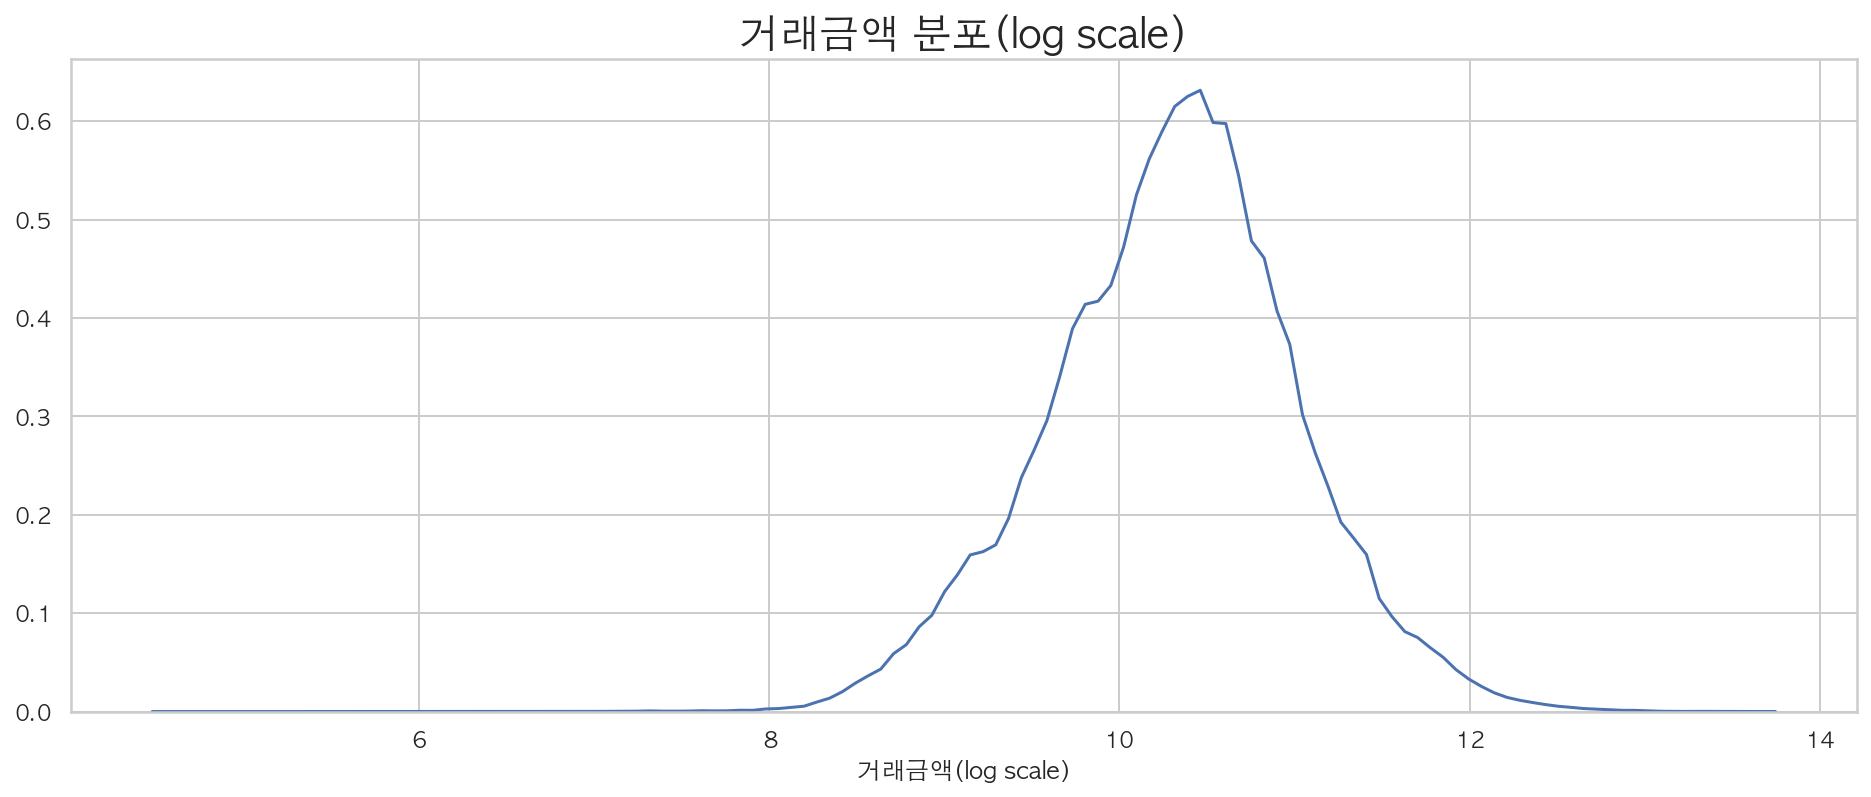

In [78]:
plt.figure(figsize = (16, 6))
plt.title("거래금액 분포(log scale)", fontsize = 20, fontweight = "bold")

ax = sns.distplot(np.log(train["transaction_real_price"]), hist = False)

ax.set_xlabel("거래금액(log scale)")

plt.show()

거래금액은 정규분포와 비슷한 형태를 나타내고 있으며 8천 ~ 12억 사이에서 거래가 주로 이루어지고 있다.

### real_price_per_use_area 컬럼

거래금액에 전용면적을 나누어 평당 가격을 나타내는 컬럼을 생성 및 확인

In [79]:
train["real_price_per_use_area"] = train["transaction_real_price"] / train["exclusive_use_area_clean"]

train["real_price_per_use_area"] = train["real_price_per_use_area"].round(2)

print(train.shape)
train[["exclusive_use_area_clean", "transaction_real_price", "real_price_per_use_area"]].head()

(1216553, 19)


,exclusive_use_area_clean,transaction_real_price,real_price_per_use_area
0,85,37500,441.18
1,99,20000,202.02
2,85,38500,452.94
3,146,118000,808.22
4,194,120000,618.56


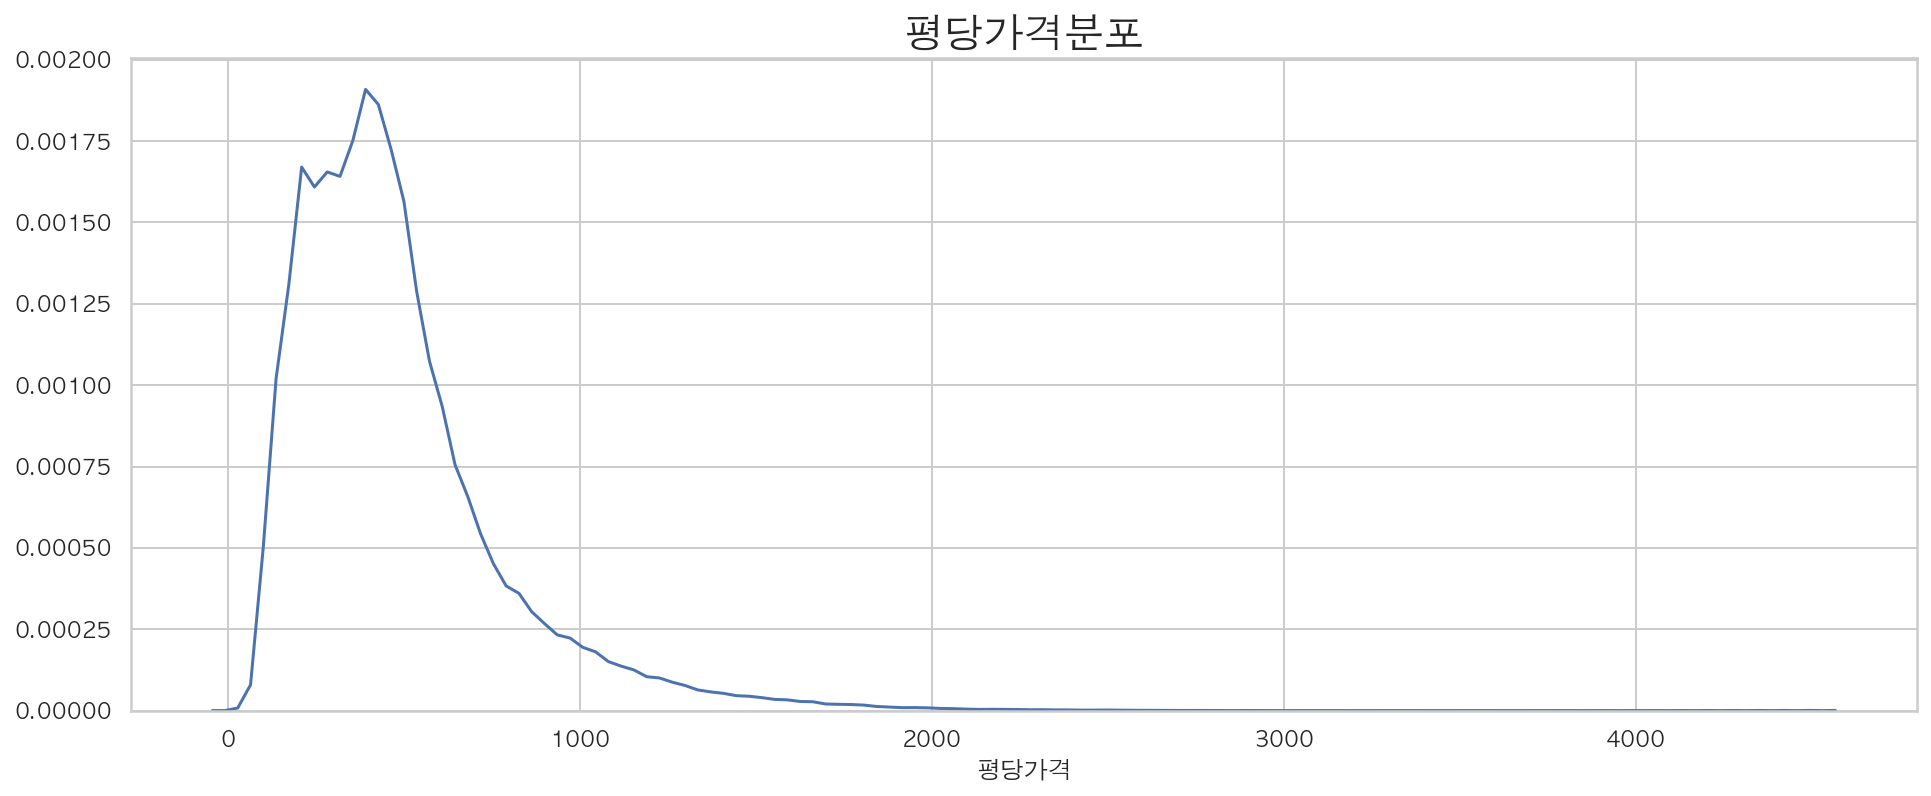

In [80]:
plt.figure(figsize = (16, 6))
plt.title("평당가격분포", fontsize = 20, fontweight = "bold")

ax = sns.distplot(train["real_price_per_use_area"], hist = False)

ax.set_xlabel("평당가격")

plt.show()

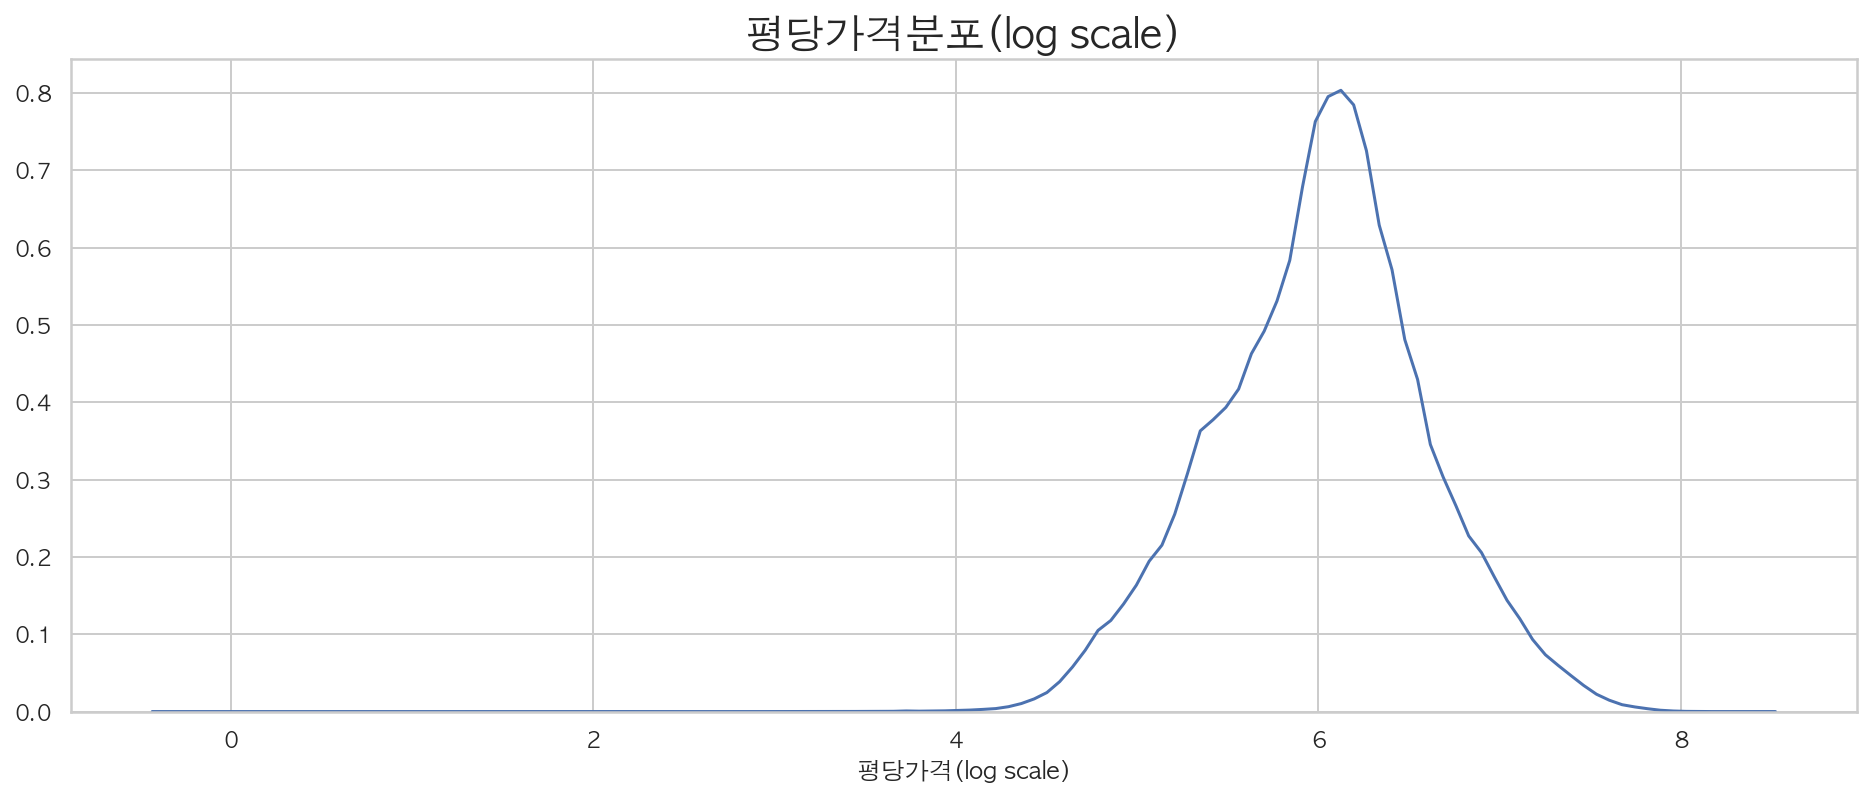

In [81]:
plt.figure(figsize = (16, 6))
plt.title("평당가격분포(log scale)", fontsize = 20, fontweight = "bold")

ax = sns.distplot(np.log(train["real_price_per_use_area"]), hist = False)

ax.set_xlabel("평당가격(log scale)")

plt.show()

평당가격도 정규분포의 형태를 나타내며 4백만원 ~ 8백만원 사이에 거래가 주로 이루어지고 있다.

## park data, day_care_center data 합치기

In [82]:
# park 데이터에서 사용할 컬럼만 가져오기
park.columns

Index(['city', 'gu', 'dong', 'park_name', 'park_type', 'park_area',
       'park_exercise_facility', 'park_entertainment_facility',
       'park_benefit_facility', 'park_cultural_facitiy', 'park_facility_other',
       'park_open_year', 'reference_date', 'park_exercise_facility_clean',
       'park_entertainment_facility_clean', 'park_benefit_facility_clean',
       'park_cultural_facitiy_clean', 'park_facility_other_clean',
       'reference_year', 'reference_month', 'reference_day',
       'reference_weekday'],
      dtype='object')

In [83]:
new_columns = ['city', 'gu', 'dong', 'park_name', 'park_type', 'park_area', 'park_open_year',
               'park_exercise_facility_clean','park_entertainment_facility_clean', 'park_benefit_facility_clean',
               'park_cultural_facitiy_clean', 'park_facility_other_clean', 'reference_year',
               'reference_month', 'reference_day', 'reference_weekday']
park = park[new_columns]

print(park.shape)
park.head()

(1359, 16)


,city,gu,dong,park_name,park_type,park_area,park_open_year,park_exercise_facility_clean,park_entertainment_facility_clean,park_benefit_facility_clean,park_cultural_facitiy_clean,park_facility_other_clean,reference_year,reference_month,reference_day,reference_weekday
0,부산광역시,남구,대연동,대연공원,근린공원,55227.0,1944.0,False,False,False,False,False,2018,8,14,Tuesday
1,부산광역시,남구,대연동,당곡공원,역사공원,75465.0,1944.0,False,False,False,False,False,2018,8,14,Tuesday
2,부산광역시,남구,대연동,대일어린이공원,어린이공원,422.1,1965.0,False,False,False,False,False,2018,8,14,Tuesday
3,부산광역시,남구,대연동,못골어린이공원,어린이공원,499.8,1968.0,False,False,False,False,False,2018,8,14,Tuesday
4,부산광역시,남구,용호동,솔밭어린이공원,어린이공원,1500.2,1970.0,False,False,False,False,False,2018,8,14,Tuesday


도시별, 동별 존재하는 공원의 종류 및 형태가 다양하기 때문에, 공원의 갯수, 넓이, 보유 시설 수만 나타내는 별도 데이터를 생성

In [84]:
# 공원 갯수

group_park_quantity = park.groupby(["city", "gu", "dong"])["park_name"].count().reset_index()

group_park_quantity.columns = ["city", "gu", "dong", "park_count"]

group_park_quantity

,city,gu,dong,park_count
0,부산광역시,강서구,녹산동,1
1,부산광역시,강서구,대저1동,1
2,부산광역시,강서구,명지동,25
3,부산광역시,강서구,송정동,2
4,부산광역시,강서구,신호동,4
5,부산광역시,강서구,지사동,6
6,부산광역시,금정구,구서동,5
7,부산광역시,금정구,금사동,6
8,부산광역시,금정구,남산동,6
9,부산광역시,금정구,부곡동,5


In [85]:
# 공원 넓이

group_park_area = park.groupby(["city", "gu", "dong"])["park_area"].sum().reset_index()

group_park_area.columns = ["city", "gu", "dong", "park_area_sum"]

group_park_area

,city,gu,dong,park_area_sum
0,부산광역시,강서구,녹산동,12211.90
1,부산광역시,강서구,대저1동,646.00
2,부산광역시,강서구,명지동,348482.80
3,부산광역시,강서구,송정동,57560.00
4,부산광역시,강서구,신호동,69323.00
5,부산광역시,강서구,지사동,53625.00
6,부산광역시,금정구,구서동,8643.00
7,부산광역시,금정구,금사동,135081.90
8,부산광역시,금정구,남산동,15432.60
9,부산광역시,금정구,부곡동,10676.00


In [86]:
# 공원보유시설

facilities = ['park_exercise_facility_clean','park_entertainment_facility_clean', 'park_benefit_facility_clean',
               'park_cultural_facitiy_clean', 'park_facility_other_clean']

table_facility = pd.pivot_table(park, index = ["city", "gu", "dong"],
                                values = facilities,
                                aggfunc = "sum",
                                fill_value = 0)

table_facility = table_facility.reset_index()

table_facility

,city,gu,dong,park_benefit_facility_clean,park_cultural_facitiy_clean,park_entertainment_facility_clean,park_exercise_facility_clean,park_facility_other_clean
0,부산광역시,강서구,녹산동,1,0,0,1,1
1,부산광역시,강서구,대저1동,0,0,0,1,1
2,부산광역시,강서구,명지동,4,0,17,13,25
3,부산광역시,강서구,송정동,2,0,0,2,2
4,부산광역시,강서구,신호동,1,0,3,2,3
5,부산광역시,강서구,지사동,1,0,4,6,6
6,부산광역시,금정구,구서동,0,0,5,0,0
7,부산광역시,금정구,금사동,1,0,3,2,0
8,부산광역시,금정구,남산동,0,0,5,0,0
9,부산광역시,금정구,부곡동,0,0,4,0,0


In [87]:
merged_park = group_park_quantity.merge(group_park_area,
                                        on = ["city", "gu", "dong"]).merge(table_facility,
                                                                          on = ["city", "gu", "dong"])

print(merged_park.shape)
merged_park.head()

(244, 10)


,city,gu,dong,park_count,park_area_sum,park_benefit_facility_clean,park_cultural_facitiy_clean,park_entertainment_facility_clean,park_exercise_facility_clean,park_facility_other_clean
0,부산광역시,강서구,녹산동,1,12211.9,1,0,0,1,1
1,부산광역시,강서구,대저1동,1,646.0,0,0,0,1,1
2,부산광역시,강서구,명지동,25,348482.8,4,0,17,13,25
3,부산광역시,강서구,송정동,2,57560.0,2,0,0,2,2
4,부산광역시,강서구,신호동,4,69323.0,1,0,3,2,3


In [88]:
# day_care_center 데이터에서 필요한 컬럼만 가져오기

day_care_center.columns

Index(['city', 'gu', 'day_care_name', 'day_care_type', 'day_care_baby_num',
       'teacher_num', 'nursing_room_num', 'playground_num', 'CCTV_num',
       'is_commuting_vehicle', 'reference_date', 'teacher_num_clean',
       'nursing_room_num_clean', 'playground_num_clean', 'CCTV_num_clean',
       'is_commuting_vehicle_clean', 'reference_year', 'reference_month',
       'reference_day', 'reference_weekday'],
      dtype='object')

In [89]:
new_columns = ['city', 'gu', 'day_care_name', 'day_care_type', 'day_care_baby_num', 'teacher_num_clean',
               'nursing_room_num_clean', 'playground_num_clean', 'CCTV_num_clean', 'is_commuting_vehicle_clean']

day_care_center = day_care_center[new_columns]

print(day_care_center.shape)
day_care_center.head()

(7551, 10)


,city,gu,day_care_name,day_care_type,day_care_baby_num,teacher_num_clean,nursing_room_num_clean,playground_num_clean,CCTV_num_clean,is_commuting_vehicle_clean
0,서울특별시,서대문구,가람어린이집,국공립,70,11,5,1,7,False
1,서울특별시,서대문구,가좌제일어린이집,국공립,88,22,5,2,10,False
2,서울특별시,서대문구,경찰청어린이집,직장,90,23,6,1,32,False
3,서울특별시,서대문구,고운햇살어린이집,가정,18,5,3,0,4,False
4,서울특별시,서대문구,고은어린이집,국공립,93,20,7,2,10,False


도시별, 구별 존재하는 어린이집의 종류가 다양하기 때문에, 어린이집의 갯수, 정원, 교직원, 보육실 등 관련 자료만 나타내는 별도 데이터를 생성

In [90]:
# 어린이집 갯수

group_center_quantity = day_care_center.groupby(["city","gu"])["day_care_name"].count().reset_index()

group_center_quantity.columns = ["city", "gu", "day_care_center_num"]

group_center_quantity

,city,gu,day_care_center_num
0,부산광역시,강서구,123
1,부산광역시,금정구,106
2,부산광역시,기장군,178
3,부산광역시,남구,143
4,부산광역시,동구,39
5,부산광역시,동래구,124
6,부산광역시,부산진구,165
7,부산광역시,북구,188
8,부산광역시,사상구,127
9,부산광역시,사하구,203


In [91]:
information = ["day_care_baby_num", 'teacher_num_clean', 'nursing_room_num_clean', 'playground_num_clean',
               'CCTV_num_clean', 'is_commuting_vehicle_clean']

table_information = pd.pivot_table(day_care_center, index = ["city", "gu"],
                                   values = information,
                                   aggfunc = "sum",
                                   fill_value = 0)

table_information = table_information.reset_index()

table_information

,city,gu,CCTV_num_clean,day_care_baby_num,is_commuting_vehicle_clean,nursing_room_num_clean,playground_num_clean,teacher_num_clean
0,부산광역시,강서구,790,5312,24,534,18,982
1,부산광역시,금정구,742,5251,88,530,0,1059
2,부산광역시,기장군,998,7689,140,841,85,1528
3,부산광역시,남구,909,6676,94,661,0,1203
4,부산광역시,동구,295,2214,30,195,0,388
5,부산광역시,동래구,928,6293,83,648,33,1130
6,부산광역시,부산진구,1107,7245,123,683,55,1375
7,부산광역시,북구,1147,8094,148,899,25,1540
8,부산광역시,사상구,537,5371,102,509,143,960
9,부산광역시,사하구,1371,9987,162,1001,119,1884


In [92]:
merged_day_care_center = pd.merge(group_center_quantity, table_information, on = ["city", "gu"])

print(merged_day_care_center.shape)
merged_day_care_center.head()

(37, 9)


,city,gu,day_care_center_num,CCTV_num_clean,day_care_baby_num,is_commuting_vehicle_clean,nursing_room_num_clean,playground_num_clean,teacher_num_clean
0,부산광역시,강서구,123,790,5312,24,534,18,982
1,부산광역시,금정구,106,742,5251,88,530,0,1059
2,부산광역시,기장군,178,998,7689,140,841,85,1528
3,부산광역시,남구,143,909,6676,94,661,0,1203
4,부산광역시,동구,39,295,2214,30,195,0,388


In [93]:
df_merged = pd.merge(merged_park, merged_day_care_center, on = ["city", "gu"], how = "inner")

print(df_merged.shape)
df_merged.head()

(219, 17)


,city,gu,dong,park_count,park_area_sum,park_benefit_facility_clean,park_cultural_facitiy_clean,park_entertainment_facility_clean,park_exercise_facility_clean,park_facility_other_clean,day_care_center_num,CCTV_num_clean,day_care_baby_num,is_commuting_vehicle_clean,nursing_room_num_clean,playground_num_clean,teacher_num_clean
0,부산광역시,강서구,녹산동,1,12211.9,1,0,0,1,1,123,790,5312,24,534,18,982
1,부산광역시,강서구,대저1동,1,646.0,0,0,0,1,1,123,790,5312,24,534,18,982
2,부산광역시,강서구,명지동,25,348482.8,4,0,17,13,25,123,790,5312,24,534,18,982
3,부산광역시,강서구,송정동,2,57560.0,2,0,0,2,2,123,790,5312,24,534,18,982
4,부산광역시,강서구,신호동,4,69323.0,1,0,3,2,3,123,790,5312,24,534,18,982


In [94]:
df_merged = df_merged.drop_duplicates(["city", "dong"])

df_merged.shape

(214, 17)

## train / test data 와 merged data 합치기

In [95]:
train_merged = pd.merge(train, df_merged, on = ["city", "dong"], how = "left")

print(train_merged.shape)
train_merged.head()

(1216553, 34)


,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price,transaction_year,transaction_month,exclusive_use_area_clean,transaction_date_clean,floor_clean,real_price_per_use_area,gu,park_count,park_area_sum,park_benefit_facility_clean,park_cultural_facitiy_clean,park_entertainment_facility_clean,park_exercise_facility_clean,park_facility_other_clean,day_care_center_num,CCTV_num_clean,day_care_baby_num,is_commuting_vehicle_clean,nursing_room_num_clean,playground_num_clean,teacher_num_clean
0,0,7622,서울특별시,신교동,6-13,신현(101동),신교동 6-13 신현(101동),84.82,2002,200801,21~31,2,37500,2008,1,85,21~31,2,441.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,5399,서울특별시,필운동,142,사직파크맨션,필운동 142 사직파크맨션,99.17,1973,200801,1~10,6,20000,2008,1,99,1~10,6,202.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,3578,서울특별시,필운동,174-1,두레엘리시안,필운동 174-1 두레엘리시안,84.74,2007,200801,1~10,6,38500,2008,1,85,1~10,6,452.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,10957,서울특별시,내수동,95,파크팰리스,내수동 95 파크팰리스,146.39,2003,200801,11~20,15,118000,2008,1,146,11~20,15,808.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,10639,서울특별시,내수동,110-15,킹스매너,내수동 110-15 킹스매너,194.43,2004,200801,21~31,3,120000,2008,1,194,21~31,3,618.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
test_merged = test.merge(df_merged, on = ["city", "dong"], how = "left").fillna(0)

print(test_merged.shape)
test_merged

(5463, 32)


,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_year,transaction_month,exclusive_use_area_clean,transaction_date_clean,floor_clean,gu,park_count,park_area_sum,park_benefit_facility_clean,park_cultural_facitiy_clean,park_entertainment_facility_clean,park_exercise_facility_clean,park_facility_other_clean,day_care_center_num,CCTV_num_clean,day_care_baby_num,is_commuting_vehicle_clean,nursing_room_num_clean,playground_num_clean,teacher_num_clean
0,1145756,10453,서울특별시,목동,938,청학,목동 938 청학,35.5500,2002,201711,11~20,2,2017,11,36,11~20,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1198704,989,부산광역시,초량동,1143-8,고관맨션,초량동 1143-8 고관맨션,68.7200,1977,201708,21~31,2,2017,8,69,21~31,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1222384,8597,부산광역시,괴정동,447-13,우림그린,괴정동 447-13 우림그린,72.5400,1989,201710,11~20,2,2017,10,73,11~20,2,사하구,6.0,21517.8,0.0,0.0,0.0,0.0,0.0,203.0,1371.0,9987.0,162.0,1001.0,119.0,1884.0
3,1179897,11086,서울특별시,대치동,1007-2,풍림아이원4차(1007-2),대치동 1007-2 풍림아이원4차(1007-2),111.5400,2004,201707,1~10,10,2017,7,112,1~10,10,강남구,11.0,60607.3,0.0,0.0,0.0,0.0,0.0,223.0,1561.0,11605.0,0.0,1115.0,0.0,2007.0
4,1223091,2121,부산광역시,다대동,1670,다대롯데캐슬블루,다대동 1670 다대롯데캐슬블루,119.6398,2014,201712,11~20,21,2017,12,120,11~20,21,사하구,10.0,595648.4,0.0,0.0,0.0,0.0,0.0,203.0,1371.0,9987.0,162.0,1001.0,119.0,1884.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5458,1174640,8965,서울특별시,양재동,15-9,위너스,양재동 15-9 위너스,84.0500,2003,201710,11~20,7,2017,10,84,11~20,7,서초구,21.0,454614.0,0.0,0.0,0.0,0.0,0.0,204.0,1428.0,10522.0,17.0,1020.0,0.0,2228.0
5459,1175575,3831,서울특별시,반포동,18-1,래미안퍼스티지,반포동 18-1 래미안퍼스티지,84.9300,2009,201712,1~10,4,2017,12,85,1~10,4,서초구,17.0,90820.9,0.0,0.0,0.0,0.0,0.0,204.0,1428.0,10522.0,17.0,1020.0,0.0,2228.0
5460,1157024,5550,서울특별시,구로동,256-1,삼성래미안,구로동 256-1 삼성래미안,110.1880,2004,201712,21~31,23,2017,12,110,21~31,23,구로구,11.0,41629.0,2.0,1.0,9.0,11.0,0.0,334.0,2220.0,13466.0,63.0,1792.0,107.0,2797.0
5461,1136863,3371,서울특별시,홍제동,24-16,동양드림,홍제동 24-16 동양드림,92.4400,2005,201710,21~31,1,2017,10,92,21~31,1,서대문구,8.0,16786.5,0.0,0.0,5.0,4.0,0.0,154.0,1075.0,7164.0,39.0,701.0,77.0,1510.0


### park 연관 컬럼

In [97]:
df_park_count = train_merged.groupby(["park_count"])["transaction_real_price"].mean().reset_index()
df_park_count.columns = ["공원갯수", "거래금액평균"]

df_park_area = train_merged.groupby(["park_area_sum"])["transaction_real_price"].mean().reset_index()
df_park_area.columns = ["공원면적", "거래금액평균"]

df_park_benefit = train_merged.groupby(["park_benefit_facility_clean"])["transaction_real_price"].mean().reset_index()
df_park_benefit.columns = ["공원편익시설", "거래금액평균"]

df_park_cultural = train_merged.groupby(["park_cultural_facitiy_clean"])["transaction_real_price"].mean().reset_index()
df_park_cultural.columns = ["공원교양시설", "거래금액평균"]

df_park_entertainment = train_merged.groupby(["park_entertainment_facility_clean"])["transaction_real_price"].mean().reset_index()
df_park_entertainment.columns = ["공원유희시설", "거래금액평균"]

df_park_exercise = train_merged.groupby(["park_exercise_facility_clean"])["transaction_real_price"].mean().reset_index()
df_park_exercise.columns = ["공원운동시설", "거래금액평균"]

df_park_other = train_merged.groupby(["park_facility_other_clean"])["transaction_real_price"].mean().reset_index()
df_park_other.columns = ["공원기타시설", "거래금액평균"]

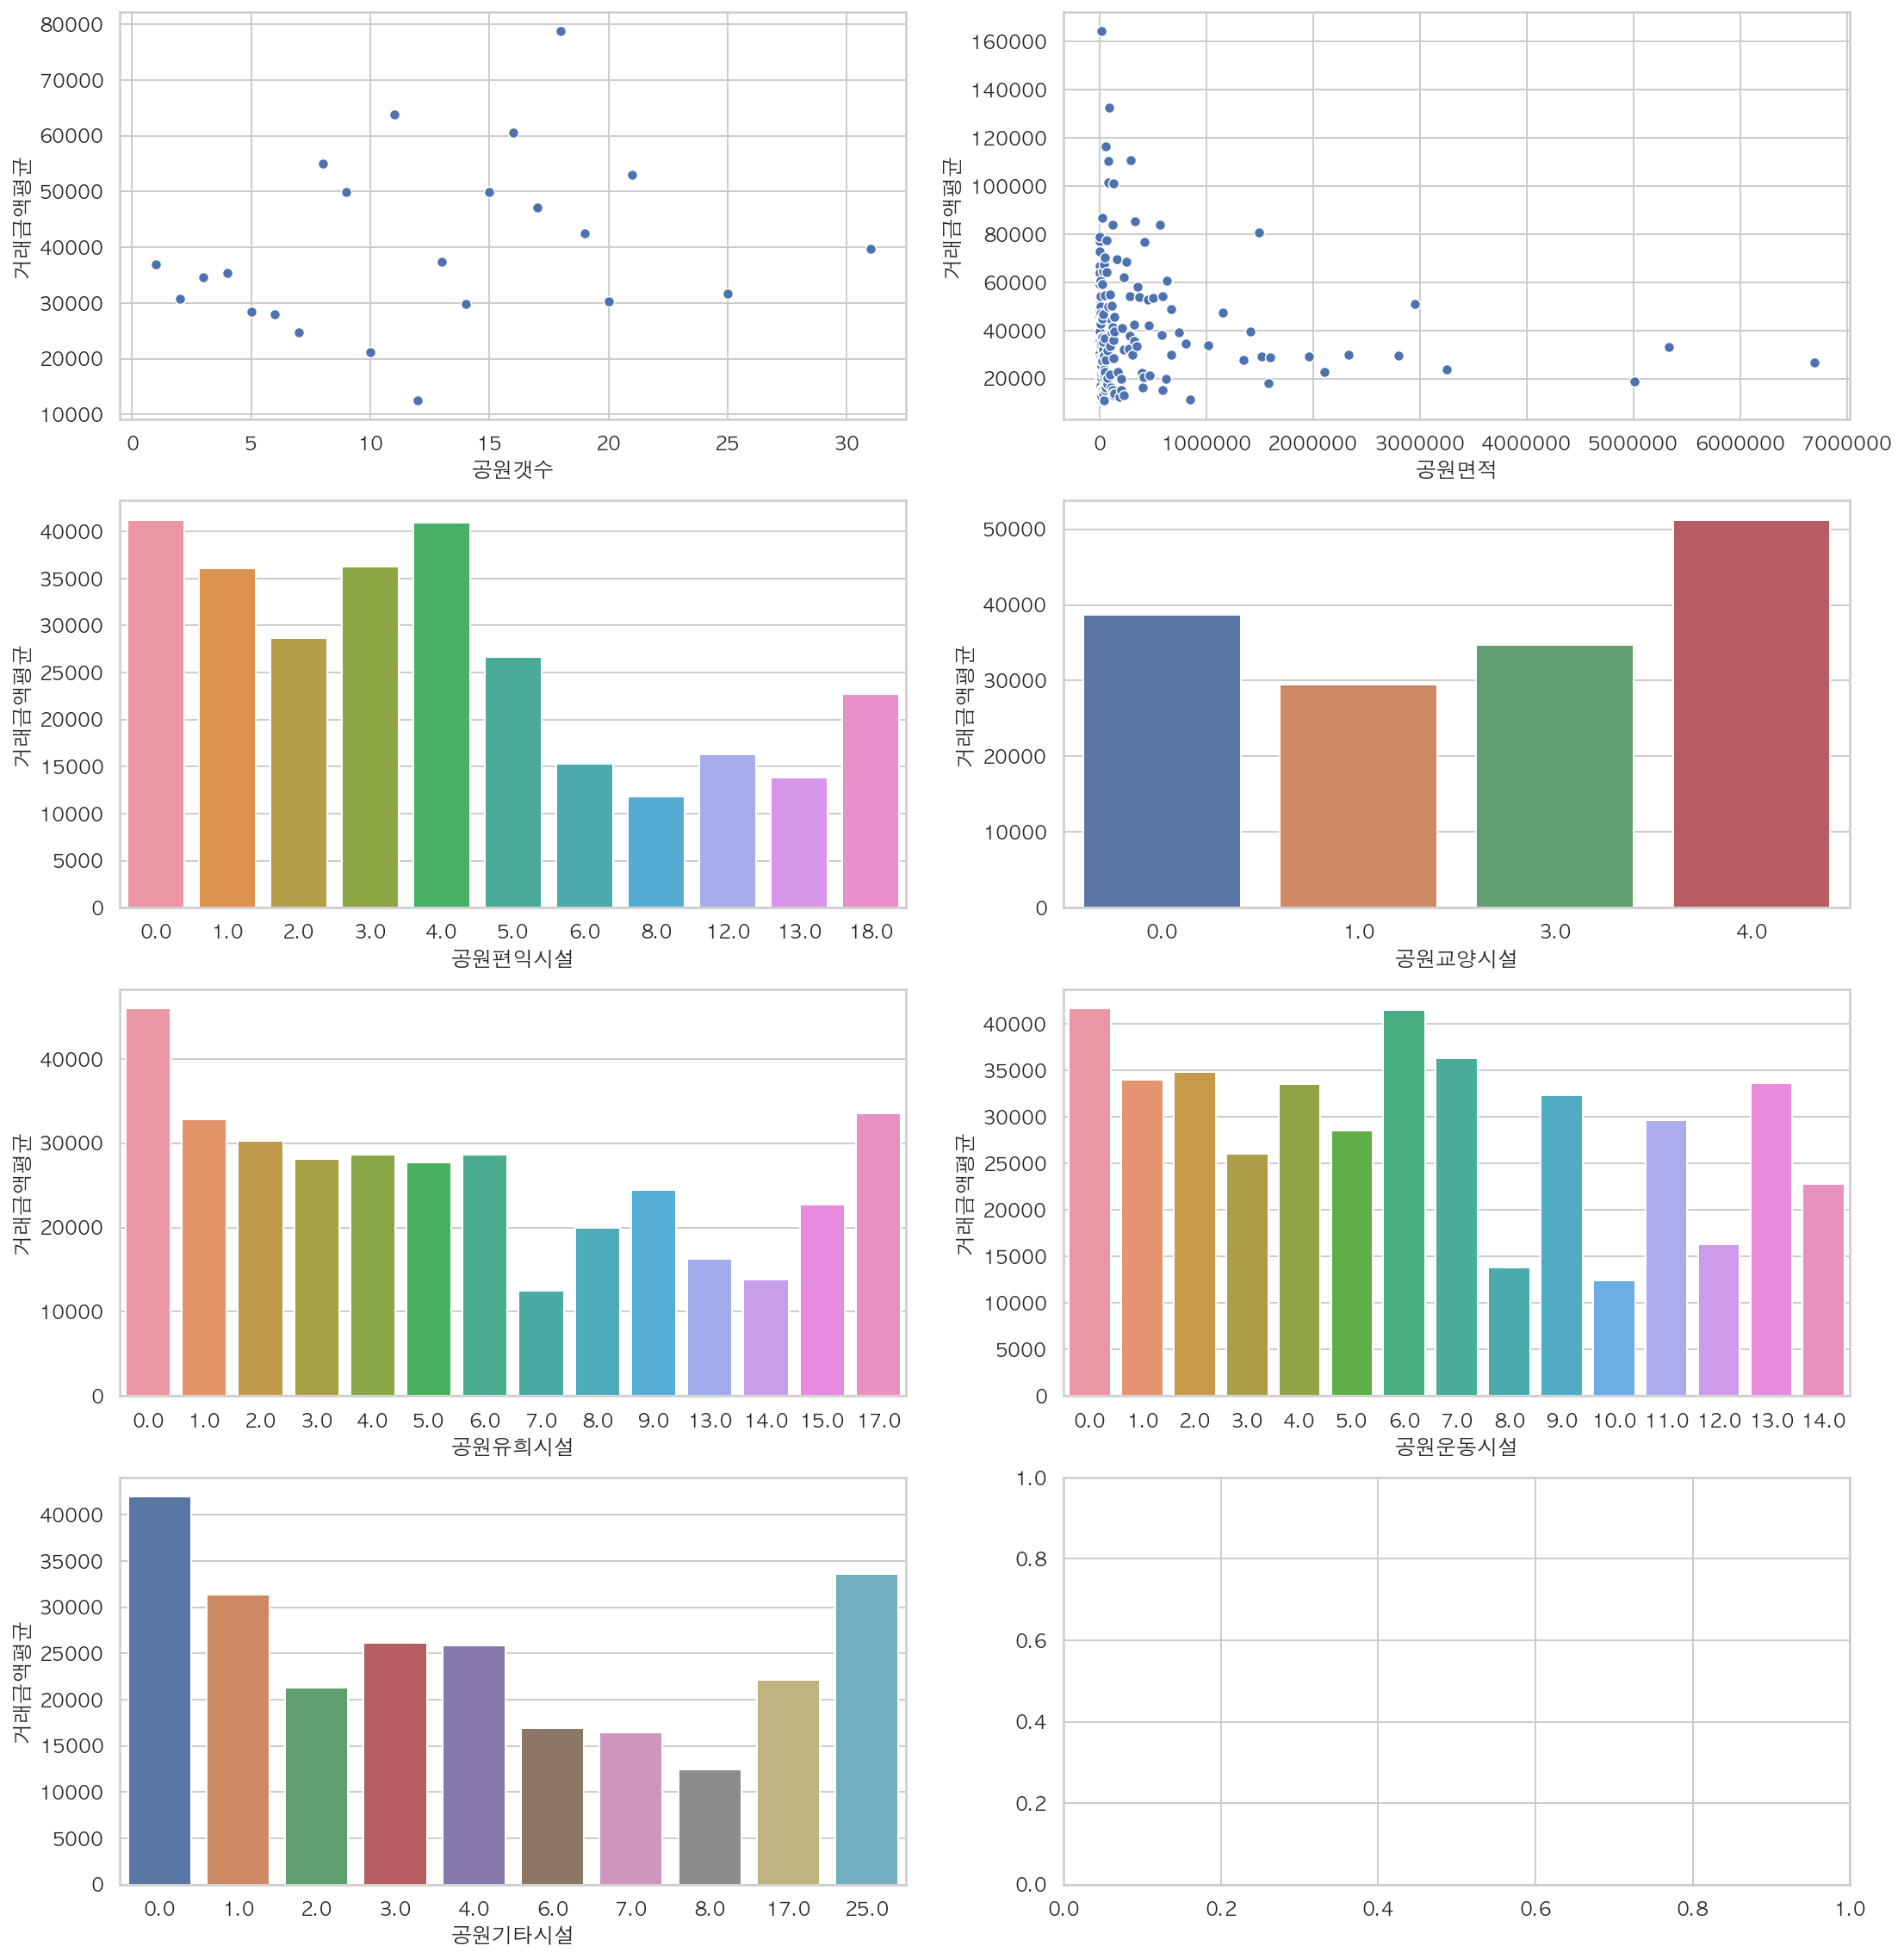

In [98]:
figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(nrows=4, ncols=2)

figure.set_size_inches(18, 20)

sns.scatterplot(data = df_park_count, x = "공원갯수", y = "거래금액평균", ax = ax1)
sns.scatterplot(data = df_park_area, x = "공원면적", y = "거래금액평균", ax = ax2)
sns.barplot(data = df_park_benefit, x = "공원편익시설", y = "거래금액평균", ax = ax3)
sns.barplot(data = df_park_cultural, x = "공원교양시설", y = "거래금액평균", ax = ax4)
sns.barplot(data = df_park_entertainment, x = "공원유희시설", y = "거래금액평균", ax = ax5)
sns.barplot(data = df_park_exercise, x = "공원운동시설", y = "거래금액평균", ax = ax6)
sns.barplot(data = df_park_other, x = "공원기타시설", y = "거래금액평균", ax = ax7)

plt.show()

공원 갯수 및 공원 시설 수 등은 거래금액에 크게 영향이 없다고 볼 수 있다.

### day_care_center 연관 컬럼

In [99]:
df_day_care_center_count = train_merged.groupby(["day_care_center_num"])["transaction_real_price"].mean().reset_index()
df_day_care_center_count.columns = ["어린이집 갯수", "거래금액평균"]

df_day_care_baby_count = train_merged.groupby(["day_care_baby_num"])["transaction_real_price"].mean().reset_index()
df_day_care_baby_count.columns = ["정원수", "거래금액평균"]

df_cctv_num_count = train_merged.groupby(["CCTV_num_clean"])["transaction_real_price"].mean().reset_index()
df_cctv_num_count.columns = ["CCTV 갯수", "거래금액평균"]

df_commuting_vehicle = train_merged.groupby(["is_commuting_vehicle_clean"])["transaction_real_price"].mean().reset_index()
df_commuting_vehicle.columns = ["통근차량 여부", "거래금액평균"]

df_nursing_room_count = train_merged.groupby(["nursing_room_num_clean"])["transaction_real_price"].mean().reset_index()
df_nursing_room_count.columns = ["보육실 갯수", "거래금액평균"]

df_playground_count = train_merged.groupby(["playground_num_clean"])["transaction_real_price"].mean().reset_index()
df_playground_count.columns = ["놀이터 갯수", "거래금액평균"]

df_teacher_count = train_merged.groupby(["teacher_num_clean"])["transaction_real_price"].mean().reset_index()
df_teacher_count.columns = ["보육교사수", "거래금액평균"]

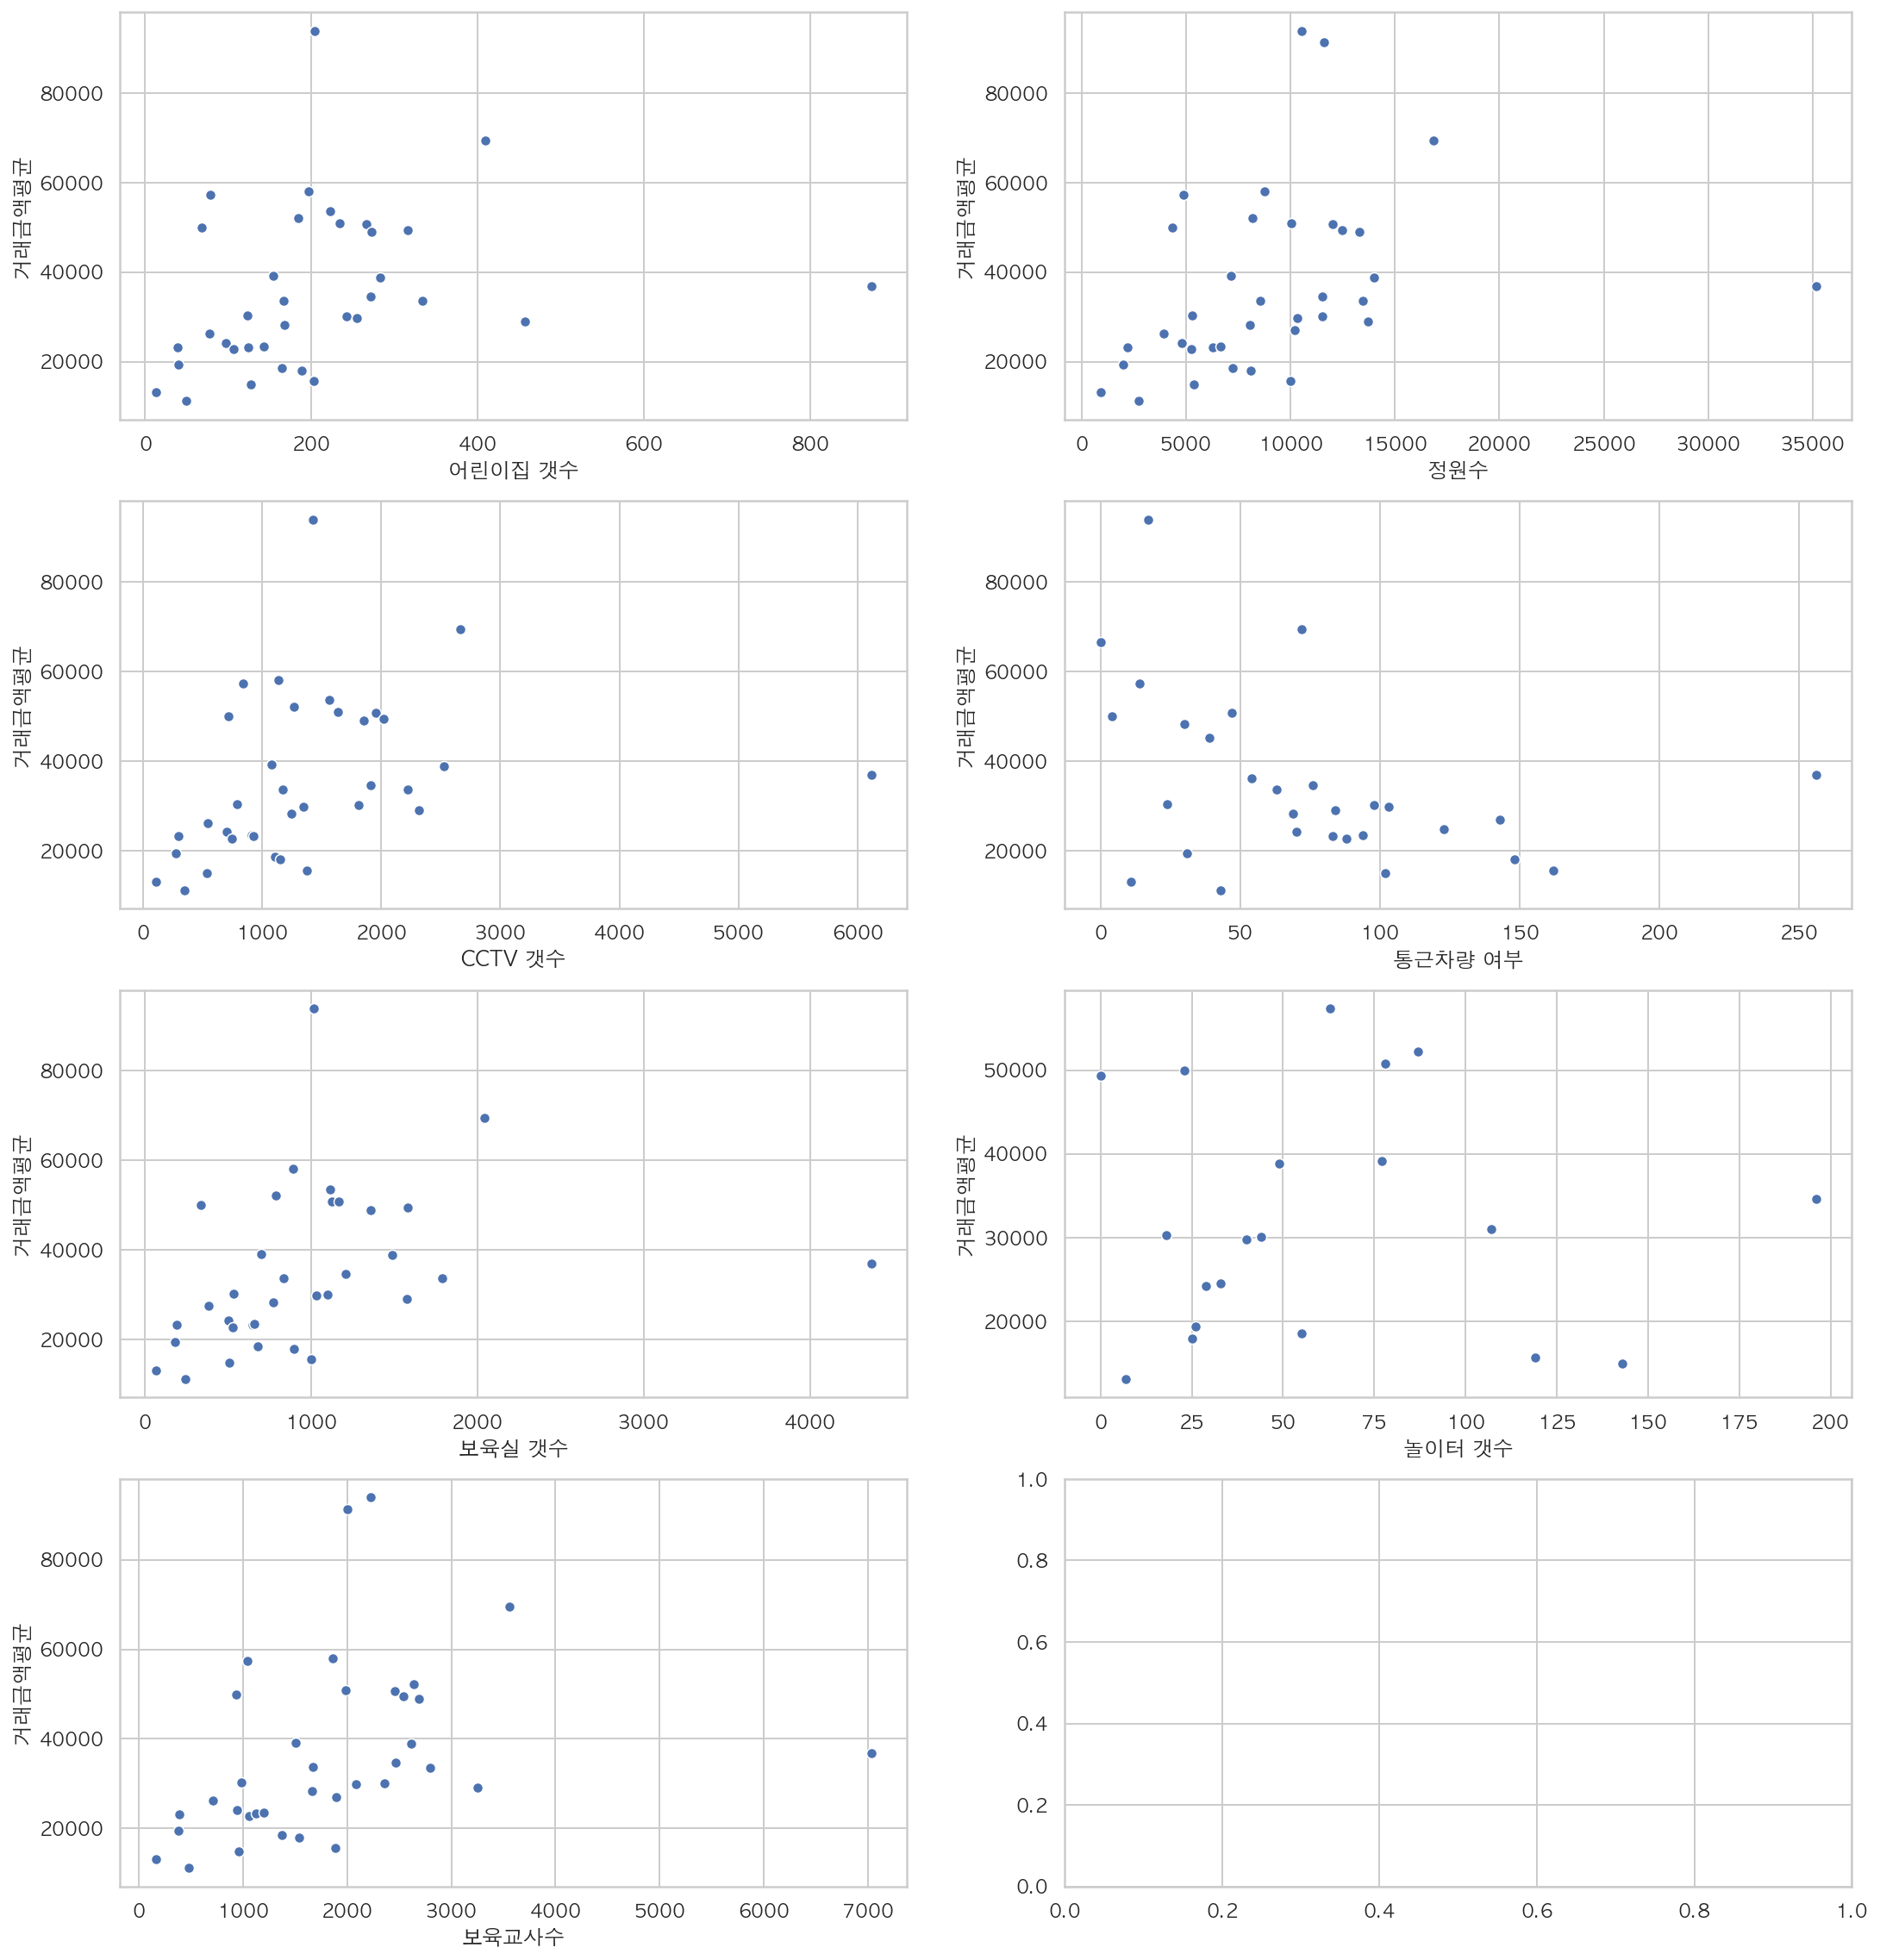

In [100]:
figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(nrows=4, ncols=2)

figure.set_size_inches(18, 20)

sns.scatterplot(data = df_day_care_center_count, x = "어린이집 갯수", y = "거래금액평균", ax = ax1)
sns.scatterplot(data = df_day_care_baby_count, x = "정원수", y = "거래금액평균", ax = ax2)
sns.scatterplot(data = df_cctv_num_count, x = "CCTV 갯수", y = "거래금액평균", ax = ax3)
sns.scatterplot(data = df_commuting_vehicle, x = "통근차량 여부", y = "거래금액평균", ax = ax4)
sns.scatterplot(data = df_nursing_room_count, x = "보육실 갯수", y = "거래금액평균", ax = ax5)
sns.scatterplot(data = df_playground_count, x = "놀이터 갯수", y = "거래금액평균", ax = ax6)
sns.scatterplot(data = df_teacher_count, x = "보육교사수", y = "거래금액평균", ax = ax7)

plt.show()

통근차량 및 놀이터 갯수를 제외하고 어느정도 거래금액에 영향이 있다고 볼 수 있다.

---

# Feature Engineering

In [101]:
train = train_merged.copy()

print(train.shape)
train.head()

(1216553, 34)


,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price,transaction_year,transaction_month,exclusive_use_area_clean,transaction_date_clean,floor_clean,real_price_per_use_area,gu,park_count,park_area_sum,park_benefit_facility_clean,park_cultural_facitiy_clean,park_entertainment_facility_clean,park_exercise_facility_clean,park_facility_other_clean,day_care_center_num,CCTV_num_clean,day_care_baby_num,is_commuting_vehicle_clean,nursing_room_num_clean,playground_num_clean,teacher_num_clean
0,0,7622,서울특별시,신교동,6-13,신현(101동),신교동 6-13 신현(101동),84.82,2002,200801,21~31,2,37500,2008,1,85,21~31,2,441.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,5399,서울특별시,필운동,142,사직파크맨션,필운동 142 사직파크맨션,99.17,1973,200801,1~10,6,20000,2008,1,99,1~10,6,202.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,3578,서울특별시,필운동,174-1,두레엘리시안,필운동 174-1 두레엘리시안,84.74,2007,200801,1~10,6,38500,2008,1,85,1~10,6,452.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,10957,서울특별시,내수동,95,파크팰리스,내수동 95 파크팰리스,146.39,2003,200801,11~20,15,118000,2008,1,146,11~20,15,808.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,10639,서울특별시,내수동,110-15,킹스매너,내수동 110-15 킹스매너,194.43,2004,200801,21~31,3,120000,2008,1,194,21~31,3,618.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
test = test_merged.copy()

print(test.shape)
test.head()

(5463, 32)


,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_year,transaction_month,exclusive_use_area_clean,transaction_date_clean,floor_clean,gu,park_count,park_area_sum,park_benefit_facility_clean,park_cultural_facitiy_clean,park_entertainment_facility_clean,park_exercise_facility_clean,park_facility_other_clean,day_care_center_num,CCTV_num_clean,day_care_baby_num,is_commuting_vehicle_clean,nursing_room_num_clean,playground_num_clean,teacher_num_clean
0,1145756,10453,서울특별시,목동,938,청학,목동 938 청학,35.5500,2002,201711,11~20,2,2017,11,36,11~20,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1198704,989,부산광역시,초량동,1143-8,고관맨션,초량동 1143-8 고관맨션,68.7200,1977,201708,21~31,2,2017,8,69,21~31,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1222384,8597,부산광역시,괴정동,447-13,우림그린,괴정동 447-13 우림그린,72.5400,1989,201710,11~20,2,2017,10,73,11~20,2,사하구,6.0,21517.8,0.0,0.0,0.0,0.0,0.0,203.0,1371.0,9987.0,162.0,1001.0,119.0,1884.0
3,1179897,11086,서울특별시,대치동,1007-2,풍림아이원4차(1007-2),대치동 1007-2 풍림아이원4차(1007-2),111.5400,2004,201707,1~10,10,2017,7,112,1~10,10,강남구,11.0,60607.3,0.0,0.0,0.0,0.0,0.0,223.0,1561.0,11605.0,0.0,1115.0,0.0,2007.0
4,1223091,2121,부산광역시,다대동,1670,다대롯데캐슬블루,다대동 1670 다대롯데캐슬블루,119.6398,2014,201712,11~20,21,2017,12,120,11~20,21,사하구,10.0,595648.4,0.0,0.0,0.0,0.0,0.0,203.0,1371.0,9987.0,162.0,1001.0,119.0,1884.0


## city 컬럼

In [103]:
# One Hot Encoding
def clean_city(row):
    if row == "서울특별시":
        return True
    
    else:
        return False

In [104]:
train["city_clean"] = train["city"].apply(clean_city)

print(train.shape)
train[["city", "city_clean"]].head()

(1216553, 35)


,city,city_clean
0,서울특별시,True
1,서울특별시,True
2,서울특별시,True
3,서울특별시,True
4,서울특별시,True


In [105]:
test["city_clean"] = test["city"].apply(clean_city)

print(test.shape)
test[["city", "city_clean"]].head()

(5463, 33)


,city,city_clean
0,서울특별시,True
1,부산광역시,False
2,부산광역시,False
3,서울특별시,True
4,부산광역시,False


## dong 컬럼

In [106]:
train["dong_clean"] = train["dong"].str.split(" ").map(lambda x : x[0])

print(train.shape)
train[["dong", "dong_clean"]].head()

(1216553, 36)


,dong,dong_clean
0,신교동,신교동
1,필운동,필운동
2,필운동,필운동
3,내수동,내수동
4,내수동,내수동


In [107]:
test["dong_clean"] = test["dong"].str.split(" ").map(lambda x : x[0])

print(test.shape)
test[["dong", "dong_clean"]].head()

(5463, 34)


,dong,dong_clean
0,목동,목동
1,초량동,초량동
2,괴정동,괴정동
3,대치동,대치동
4,다대동,다대동


In [108]:
# 거래 횟수가 1000개 미만인 동은 others 로 처리

dong_counts = train["dong_clean"].value_counts()

top_dong_counts = dong_counts[dong_counts > 1000]

top_dong_counts = top_dong_counts.index

print(len(top_dong_counts))

top_dong_counts

218


Index(['상계동', '좌동', '화명동', '용호동', '중계동', '신정동', '연산동', '다대동', '창동', '구로동',
       ...
       '황학동', '신수동', '서동', '서교동', '역촌동', '북아현동', '좌천동', '염리동', '당산동2가', '녹번동'],
      dtype='object', length=218)

In [109]:
# train["dong_clean"] = train["dong"]

train.loc[~train["dong_clean"].isin(top_dong_counts), "dong_clean"] = "others"

print(train.shape)
train[["dong", "dong_clean"]].head()

(1216553, 36)


,dong,dong_clean
0,신교동,others
1,필운동,others
2,필운동,others
3,내수동,others
4,내수동,others


In [110]:
# test["dong_clean"] = test["dong"]

test.loc[~test["dong_clean"].isin(top_dong_counts), "dong_clean"] = "others"

print(test.shape)
test[["dong", "dong_clean"]].head()

(5463, 34)


,dong,dong_clean
0,목동,목동
1,초량동,초량동
2,괴정동,괴정동
3,대치동,대치동
4,다대동,다대동


In [111]:
# One Hot Encoding
train_dong = pd.get_dummies(train["dong_clean"])

print(train_dong.shape)
train_dong.head()

(1216553, 219)


,others,가락동,가산동,가야동,가양동,갈현동,감만동,감천동,강일동,개금동,개봉동,개포동,거여동,거제동,고덕동,고척동,공덕동,공릉동,광안동,광장동,괘법동,괴정동,구로동,구산동,구서동,구의동,구포동,금곡동,금호동1가,금호동3가,금호동4가,기장읍,길동,길음동,낙민동,남가좌동,남산동,남천동,내발산동,노량진동,녹번동,논현동,다대동,답십리동,당감동,당리동,당산동2가,당산동4가,당산동5가,대림동,대방동,대연동,대치동,대흥동,덕천동,덕포동,도곡동,도봉동,도화동,독산동,돈암동,동삼동,둔촌동,등촌동,마곡동,마장동,마천동,만덕동,망미동,망우동,망원동,면목동,명륜동,명일동,명장동,명지동,모라동,목동,묵동,문래동3가,문래동6가,문정동,문현동,미아동,민락동,반송동,반여동,반포동,방배동,방이동,방학동,방화동,번동,범일동,범천동,본동,봉천동,부곡동,부암동,부전동,북가좌동,북아현동,불광동,사당동,사직동,삼성동,상계동,상도동,상봉동,상암동,상일동,서교동,서대신동3가,서동,서초동,석관동,성내동,성산동,성수동1가,성수동2가,송파동,수서동,수안동,수영동,수유동,시흥동,신공덕동,신길동,신내동,신당동,신대방동,신도림동,신림동,신사동,신수동,신월동,신정동,신천동,신평동,쌍문동,안락동,암남동,암사동,압구정동,양재동,양정동,양평동3가,엄궁동,여의도동,역삼동,역촌동,연산동,연지동,연희동,염리동,염창동,영등포동,오금동,오류동,옥수동,온천동,용당동,용두동,용호동,우동,우면동,우암동,월계동,응봉동,응암동,이문동,이촌동,일원동,자양동,잠실동,잠원동,장림동,장안동,장전동,장지동,재송동,전농동,전포동,정관읍,정릉동,제기동,종암동,좌동,좌천동,주례동,중계동,중동,중화동,진관동,창동,창신동,창전동,천호동,청담동,청량리동,청룡동,청학동,초량동,초읍동,풍납동,하계동,하단동,하왕십리동,하월곡동,학장동,한남동,행당동,홍은동,홍제동,화곡동,화명동,황학동,휘경동,흑석동
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [112]:
# One Hot Encoding 한 train 데이터의 dong 값을 csr_matrix 로 변환
from scipy.sparse import csr_matrix

train_dong = csr_matrix(train_dong)

train_dong

<1216553x219 sparse matrix of type '<class 'numpy.uint8'>'
	with 1216553 stored elements in Compressed Sparse Row format>

In [113]:
test_dong = pd.get_dummies(test["dong_clean"])

print(test_dong.shape)
test_dong.head()

(5463, 219)


,others,가락동,가산동,가야동,가양동,갈현동,감만동,감천동,강일동,개금동,개봉동,개포동,거여동,거제동,고덕동,고척동,공덕동,공릉동,광안동,광장동,괘법동,괴정동,구로동,구산동,구서동,구의동,구포동,금곡동,금호동1가,금호동3가,금호동4가,기장읍,길동,길음동,낙민동,남가좌동,남산동,남천동,내발산동,노량진동,녹번동,논현동,다대동,답십리동,당감동,당리동,당산동2가,당산동4가,당산동5가,대림동,대방동,대연동,대치동,대흥동,덕천동,덕포동,도곡동,도봉동,도화동,독산동,돈암동,동삼동,둔촌동,등촌동,마곡동,마장동,마천동,만덕동,망미동,망우동,망원동,면목동,명륜동,명일동,명장동,명지동,모라동,목동,묵동,문래동3가,문래동6가,문정동,문현동,미아동,민락동,반송동,반여동,반포동,방배동,방이동,방학동,방화동,번동,범일동,범천동,본동,봉천동,부곡동,부암동,부전동,북가좌동,북아현동,불광동,사당동,사직동,삼성동,상계동,상도동,상봉동,상암동,상일동,서교동,서대신동3가,서동,서초동,석관동,성내동,성산동,성수동1가,성수동2가,송파동,수서동,수안동,수영동,수유동,시흥동,신공덕동,신길동,신내동,신당동,신대방동,신도림동,신림동,신사동,신수동,신월동,신정동,신천동,신평동,쌍문동,안락동,암남동,암사동,압구정동,양재동,양정동,양평동3가,엄궁동,여의도동,역삼동,역촌동,연산동,연지동,연희동,염리동,염창동,영등포동,오금동,오류동,옥수동,온천동,용당동,용두동,용호동,우동,우면동,우암동,월계동,응봉동,응암동,이문동,이촌동,일원동,자양동,잠실동,잠원동,장림동,장안동,장전동,장지동,재송동,전농동,전포동,정관읍,정릉동,제기동,종암동,좌동,좌천동,주례동,중계동,중동,중화동,진관동,창동,창신동,창전동,천호동,청담동,청량리동,청룡동,청학동,초량동,초읍동,풍납동,하계동,하단동,하왕십리동,하월곡동,학장동,한남동,행당동,홍은동,홍제동,화곡동,화명동,황학동,휘경동,흑석동
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [114]:
test_dong = csr_matrix(test_dong)

test_dong

<5463x219 sparse matrix of type '<class 'numpy.uint8'>'
	with 5463 stored elements in Compressed Sparse Row format>

## transaction_date_clean 컬럼

In [115]:
# One Hot Encoding
train_date = pd.get_dummies(train["transaction_date_clean"], prefix = "transaction_date")

train = pd.concat([train, train_date], axis = 1)

print(train.shape)
train.head()

(1216553, 39)


,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price,transaction_year,transaction_month,exclusive_use_area_clean,transaction_date_clean,floor_clean,real_price_per_use_area,gu,park_count,park_area_sum,park_benefit_facility_clean,park_cultural_facitiy_clean,park_entertainment_facility_clean,park_exercise_facility_clean,park_facility_other_clean,day_care_center_num,CCTV_num_clean,day_care_baby_num,is_commuting_vehicle_clean,nursing_room_num_clean,playground_num_clean,teacher_num_clean,city_clean,dong_clean,transaction_date_11~20,transaction_date_1~10,transaction_date_21~31
0,0,7622,서울특별시,신교동,6-13,신현(101동),신교동 6-13 신현(101동),84.82,2002,200801,21~31,2,37500,2008,1,85,21~31,2,441.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,others,0,0,1
1,1,5399,서울특별시,필운동,142,사직파크맨션,필운동 142 사직파크맨션,99.17,1973,200801,1~10,6,20000,2008,1,99,1~10,6,202.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,others,0,1,0
2,2,3578,서울특별시,필운동,174-1,두레엘리시안,필운동 174-1 두레엘리시안,84.74,2007,200801,1~10,6,38500,2008,1,85,1~10,6,452.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,others,0,1,0
3,3,10957,서울특별시,내수동,95,파크팰리스,내수동 95 파크팰리스,146.39,2003,200801,11~20,15,118000,2008,1,146,11~20,15,808.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,others,1,0,0
4,4,10639,서울특별시,내수동,110-15,킹스매너,내수동 110-15 킹스매너,194.43,2004,200801,21~31,3,120000,2008,1,194,21~31,3,618.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,others,0,0,1


In [116]:
test_date = pd.get_dummies(test["transaction_date_clean"], prefix = "transaction_date")

test = pd.concat([test, test_date], axis = 1)

print(test.shape)
test.head()

(5463, 37)


,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_year,transaction_month,exclusive_use_area_clean,transaction_date_clean,floor_clean,gu,park_count,park_area_sum,park_benefit_facility_clean,park_cultural_facitiy_clean,park_entertainment_facility_clean,park_exercise_facility_clean,park_facility_other_clean,day_care_center_num,CCTV_num_clean,day_care_baby_num,is_commuting_vehicle_clean,nursing_room_num_clean,playground_num_clean,teacher_num_clean,city_clean,dong_clean,transaction_date_11~20,transaction_date_1~10,transaction_date_21~31
0,1145756,10453,서울특별시,목동,938,청학,목동 938 청학,35.5500,2002,201711,11~20,2,2017,11,36,11~20,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,목동,1,0,0
1,1198704,989,부산광역시,초량동,1143-8,고관맨션,초량동 1143-8 고관맨션,68.7200,1977,201708,21~31,2,2017,8,69,21~31,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,초량동,0,0,1
2,1222384,8597,부산광역시,괴정동,447-13,우림그린,괴정동 447-13 우림그린,72.5400,1989,201710,11~20,2,2017,10,73,11~20,2,사하구,6.0,21517.8,0.0,0.0,0.0,0.0,0.0,203.0,1371.0,9987.0,162.0,1001.0,119.0,1884.0,False,괴정동,1,0,0
3,1179897,11086,서울특별시,대치동,1007-2,풍림아이원4차(1007-2),대치동 1007-2 풍림아이원4차(1007-2),111.5400,2004,201707,1~10,10,2017,7,112,1~10,10,강남구,11.0,60607.3,0.0,0.0,0.0,0.0,0.0,223.0,1561.0,11605.0,0.0,1115.0,0.0,2007.0,True,대치동,0,1,0
4,1223091,2121,부산광역시,다대동,1670,다대롯데캐슬블루,다대동 1670 다대롯데캐슬블루,119.6398,2014,201712,11~20,21,2017,12,120,11~20,21,사하구,10.0,595648.4,0.0,0.0,0.0,0.0,0.0,203.0,1371.0,9987.0,162.0,1001.0,119.0,1884.0,False,다대동,1,0,0


---

# Train

In [117]:
features = ["apartment_id", "year_of_completion", "transaction_year", "transaction_month",
           "exclusive_use_area_clean", "floor_clean", "city_clean", "transaction_date_11~20",
           "transaction_date_1~10", "transaction_date_21~31"]

features = features + ["day_care_center_num", "CCTV_num_clean", "day_care_baby_num",
                       "nursing_room_num_clean", "teacher_num_clean"]

features

['apartment_id',
 'year_of_completion',
 'transaction_year',
 'transaction_month',
 'exclusive_use_area_clean',
 'floor_clean',
 'city_clean',
 'transaction_date_11~20',
 'transaction_date_1~10',
 'transaction_date_21~31',
 'day_care_center_num',
 'CCTV_num_clean',
 'day_care_baby_num',
 'nursing_room_num_clean',
 'teacher_num_clean']

In [118]:
label_name = "transaction_real_price"
label_name

'transaction_real_price'

In [119]:
X_train = train[features]

print(X_train.shape)
X_train.head()

(1216553, 15)


,apartment_id,year_of_completion,transaction_year,transaction_month,exclusive_use_area_clean,floor_clean,city_clean,transaction_date_11~20,transaction_date_1~10,transaction_date_21~31,day_care_center_num,CCTV_num_clean,day_care_baby_num,nursing_room_num_clean,teacher_num_clean
0,7622,2002,2008,1,85,2,True,0,0,1,NaN,NaN,NaN,NaN,NaN
1,5399,1973,2008,1,99,6,True,0,1,0,NaN,NaN,NaN,NaN,NaN
2,3578,2007,2008,1,85,6,True,0,1,0,NaN,NaN,NaN,NaN,NaN
3,10957,2003,2008,1,146,15,True,1,0,0,NaN,NaN,NaN,NaN,NaN
4,10639,2004,2008,1,194,3,True,0,0,1,NaN,NaN,NaN,NaN,NaN


In [120]:
# CSR Matrix를 하나로 합치는 hstack 함수를 가져옵니다.
from scipy.sparse import hstack

X_train = hstack([X_train.astype('float'), train_dong])
X_train = csr_matrix(X_train)

X_train

<1216553x234 sparse matrix of type '<class 'numpy.float64'>'
	with 16557473 stored elements in Compressed Sparse Row format>

In [121]:
X_test = test[features]

print(X_test.shape)
X_test.head()

(5463, 15)


,apartment_id,year_of_completion,transaction_year,transaction_month,exclusive_use_area_clean,floor_clean,city_clean,transaction_date_11~20,transaction_date_1~10,transaction_date_21~31,day_care_center_num,CCTV_num_clean,day_care_baby_num,nursing_room_num_clean,teacher_num_clean
0,10453,2002,2017,11,36,2,True,1,0,0,0.0,0.0,0.0,0.0,0.0
1,989,1977,2017,8,69,2,False,0,0,1,0.0,0.0,0.0,0.0,0.0
2,8597,1989,2017,10,73,2,False,1,0,0,203.0,1371.0,9987.0,1001.0,1884.0
3,11086,2004,2017,7,112,10,True,0,1,0,223.0,1561.0,11605.0,1115.0,2007.0
4,2121,2014,2017,12,120,21,False,1,0,0,203.0,1371.0,9987.0,1001.0,1884.0


In [122]:
from scipy.sparse import hstack

X_test = hstack([X_test.astype('float'), test_dong])
X_test = csr_matrix(X_test)

X_test

<5463x234 sparse matrix of type '<class 'numpy.float64'>'
	with 67315 stored elements in Compressed Sparse Row format>

In [123]:
y_train = train[label_name]

print(y_train.shape)
y_train.head()

(1216553,)


0     37500
1     20000
2     38500
3    118000
4    120000
Name: transaction_real_price, dtype: int64

---

# Pre-Evaluation

In [124]:
from lightgbm import LGBMRegressor

model = LGBMRegressor(random_state = 37, metric = "mse")

model 

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              metric='mse', min_child_samples=20, min_child_weight=0.001,
              min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
              objective=None, random_state=37, reg_alpha=0.0, reg_lambda=0.0,
              silent=True, subsample=1.0, subsample_for_bin=200000,
              subsample_freq=0)

In [125]:
from sklearn.model_selection import KFold, cross_val_score

kf = KFold(5, shuffle = True, random_state = 37)
y_predict = cross_val_score(model, X_train, y_train,
                            scoring="neg_mean_squared_error", cv = kf)

score = np.sqrt(-y_predict)

In [126]:
def display_scores(scores): 
    print("점수:", scores)
    print("평균:", scores.mean())
    print("표준편차:", scores.std())

display_scores(score) 

점수: [8305.57124478 8287.60963327 8313.25083129 8237.59247817 8340.59858047]
평균: 8296.92455359695
표준편차: 34.22220375885656


In [127]:
# 평균: 8296.92455359695

---

# Coarse Search

In [128]:
n_estimators = 1000 
num_loop = 50 


coarse_hyperparameters_list = []

for loop in range(num_loop): 
    
    learning_rate = np.random.uniform(low = 0.01, high = 0.1)
    max_depth = np.random.randint(low = 2, high = 100)        
    num_leaves = np.random.randint(2, 500)            
    subsample = np.random.uniform(low = 0.1, high = 1.0)
    colsample_bytree = np.random.uniform(low = 0.1, high = 1.0)
    
    
    model = LGBMRegressor(random_state = 37,
                          learning_rate = learning_rate,
                          n_estimators = n_estimators,                          
                          max_depth = max_depth,                                                   
                          num_leaves = num_leaves,
                          subsample = subsample,
                          colsample_bytree = colsample_bytree,
                          metric = "mse")
    
    
    y_predict = cross_val_score(model, X_train, y_train,
                                scoring="neg_mean_squared_error", cv = 20)
    
    
    score = np.sqrt(-y_predict).mean().round()    
    
    hyperparameters = {
        'loop' : loop,
        'score' : score,
        'learning_rate' : learning_rate,
        'n_estimators' : n_estimators,        
        'max_depth' : max_depth,       
        'num_leaves' : num_leaves,        
        'subsample' : subsample,
        'colsample_bytree' : colsample_bytree,        
    }
    
    coarse_hyperparameters_list.append(hyperparameters)
    
    
    print(f"{loop:2} learning_rate = {learning_rate:.6f}, n_estimators = {n_estimators}, \
          max_depth = {max_depth}, num_leaves = {num_leaves}, subsample = {subsample:.6f}, \
          colsample_bytree = {colsample_bytree:.6f}, score = {score}")


coarse_hyperparameters_list = pd.DataFrame.from_dict(coarse_hyperparameters_list)

coarse_hyperparameters_list = coarse_hyperparameters_list.sort_values(by="score")

coarse_hyperparameters_list.head()   

 0 learning_rate = 0.041431, n_estimators = 1000,           max_depth = 98, num_leaves = 249, subsample = 0.889747,           colsample_bytree = 0.873418, score = 6914.0
 1 learning_rate = 0.014230, n_estimators = 1000,           max_depth = 47, num_leaves = 435, subsample = 0.483122,           colsample_bytree = 0.625376, score = 7301.0
 2 learning_rate = 0.060323, n_estimators = 1000,           max_depth = 19, num_leaves = 272, subsample = 0.920353,           colsample_bytree = 0.698516, score = 6618.0
 3 learning_rate = 0.037200, n_estimators = 1000,           max_depth = 97, num_leaves = 46, subsample = 0.840439,           colsample_bytree = 0.468144, score = 7524.0
 4 learning_rate = 0.034052, n_estimators = 1000,           max_depth = 22, num_leaves = 101, subsample = 0.815457,           colsample_bytree = 0.791168, score = 7075.0
 5 learning_rate = 0.080061, n_estimators = 1000,           max_depth = 45, num_leaves = 191, subsample = 0.162973,           colsample_bytree = 0.4722

49 learning_rate = 0.035885, n_estimators = 1000,           max_depth = 76, num_leaves = 91, subsample = 0.959525,           colsample_bytree = 0.271621, score = 7551.0


,loop,score,learning_rate,n_estimators,max_depth,num_leaves,subsample,colsample_bytree
5,5,6469.0,0.080061,1000,45,191,0.162973,0.472272
11,11,6509.0,0.091870,1000,19,214,0.601264,0.544711
45,45,6510.0,0.075457,1000,63,135,0.883421,0.511358
2,2,6618.0,0.060323,1000,19,272,0.920353,0.698516
26,26,6622.0,0.070522,1000,65,171,0.332254,0.738315


---

# Fine search

In [135]:
n_estimators = 1000 
num_loop = 50 


finer_hyperparameters_list = []

for loop in range(num_loop): 
    learning_rate = np.random.uniform(low = 0.060323, high = 0.091870)
    max_depth = np.random.randint(low = 19, high = 65)        
    num_leaves = np.random.randint(low = 135, high = 272)            
    subsample = np.random.uniform(low = 0.162973, high = 0.920353)
    colsample_bytree = np.random.uniform(low = 0.472272, high = 0.738315)
    
   
    model = LGBMRegressor(random_state = 37,
                          learning_rate = learning_rate,
                          n_estimators = n_estimators,                          
                          max_depth = max_depth,                                                   
                          num_leaves = num_leaves,
                          subsample = subsample,
                          colsample_bytree = colsample_bytree,
                          metric = "mse")
    
   
    y_predict = cross_val_score(model, X_train, y_train,
                                scoring="neg_mean_squared_error", cv = 20)
    
    
    score = np.sqrt(-y_predict).mean().round()
    
    finer_hyperparameters = {
        'loop' : loop,
        'score' : score,
        'learning_rate' : learning_rate,
        'n_estimators' : n_estimators,        
        'max_depth' : max_depth,       
        'num_leaves' : num_leaves,        
        'subsample' : subsample,
        'colsample_bytree' : colsample_bytree,   
    }
    
    finer_hyperparameters_list.append(finer_hyperparameters)
        
    print(f"{loop:2} learning_rate = {learning_rate:.6f}, n_estimators = {n_estimators}, \
          max_depth = {max_depth}, num_leaves = {num_leaves}, subsample = {subsample:.6f}, \
          colsample_bytree = {colsample_bytree:.6f}, score = {score}")


finer_hyperparameters_list = pd.DataFrame(finer_hyperparameters_list)

finer_hyperparameters_list = finer_hyperparameters_list.sort_values(by = "score")

finer_hyperparameters_list.head()

 0 learning_rate = 0.064598, n_estimators = 1000,           max_depth = 44, num_leaves = 229, subsample = 0.742575,           colsample_bytree = 0.582576, score = 6674.0
 1 learning_rate = 0.067159, n_estimators = 1000,           max_depth = 57, num_leaves = 190, subsample = 0.296627,           colsample_bytree = 0.699140, score = 6697.0
 2 learning_rate = 0.073470, n_estimators = 1000,           max_depth = 50, num_leaves = 158, subsample = 0.248720,           colsample_bytree = 0.675180, score = 6690.0
 3 learning_rate = 0.080572, n_estimators = 1000,           max_depth = 56, num_leaves = 231, subsample = 0.528053,           colsample_bytree = 0.664620, score = 6619.0
 4 learning_rate = 0.083576, n_estimators = 1000,           max_depth = 34, num_leaves = 230, subsample = 0.677532,           colsample_bytree = 0.548432, score = 6511.0
 5 learning_rate = 0.069841, n_estimators = 1000,           max_depth = 38, num_leaves = 211, subsample = 0.432310,           colsample_bytree = 0.561

49 learning_rate = 0.080463, n_estimators = 1000,           max_depth = 37, num_leaves = 153, subsample = 0.597601,           colsample_bytree = 0.516441, score = 6456.0


,loop,score,learning_rate,n_estimators,max_depth,num_leaves,subsample,colsample_bytree
25,25,6449.0,0.074490,1000,27,165,0.825019,0.509286
49,49,6456.0,0.080463,1000,37,153,0.597601,0.516441
12,12,6483.0,0.068607,1000,35,252,0.444789,0.478288
34,34,6495.0,0.091862,1000,26,178,0.464421,0.542245
36,36,6505.0,0.091687,1000,20,153,0.500558,0.728714


---

In [136]:
best_hyperparameters = finer_hyperparameters_list.iloc[0]

best_hyperparameters

loop                  25.000000
score               6449.000000
learning_rate          0.074490
n_estimators        1000.000000
max_depth             27.000000
num_leaves           165.000000
subsample              0.825019
colsample_bytree       0.509286
Name: 25, dtype: float64

---

# Fit

In [137]:
model = LGBMRegressor(random_state = 37,
                      learning_rate = 0.074490,
                      n_estimators = 1000,
                      max_depth = 27,
                      num_leaves = 165,
                      subsample = 0.825019,
                      colsample_bytree = 0.509286,
                      metric = "mse")

model 

LGBMRegressor(boosting_type='gbdt', class_weight=None,
              colsample_bytree=0.509286, importance_type='split',
              learning_rate=0.07449, max_depth=27, metric='mse',
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=1000, n_jobs=-1, num_leaves=165, objective=None,
              random_state=37, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=0.825019, subsample_for_bin=200000, subsample_freq=0)

In [138]:
model.fit(X_train, y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None,
              colsample_bytree=0.509286, importance_type='split',
              learning_rate=0.07449, max_depth=27, metric='mse',
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=1000, n_jobs=-1, num_leaves=165, objective=None,
              random_state=37, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=0.825019, subsample_for_bin=200000, subsample_freq=0)

---

# Evaluation

In [139]:
from sklearn.model_selection import KFold, cross_val_score

kf = KFold(5, shuffle = True, random_state = 37)
y_predict = cross_val_score(model, X_train, y_train,
                            scoring="neg_mean_squared_error", cv = kf)

score = np.sqrt(-y_predict)

In [140]:
def display_scores(scores): 
    print("점수:", scores)
    print("평균:", scores.mean())
    print("표준편차:", scores.std())

display_scores(score) 

점수: [4171.92573307 4195.94409547 4186.15324547 4087.16988923 4143.17861609]
평균: 4156.874315867146
표준편차: 39.13189962905457


In [ ]:
# 평균: 4156.874315867146

---

# Predict

In [141]:
prediction = model.predict(X_test)

print(prediction.shape) 
prediction

(5463,)


array([21076.1246168 ,  9620.61695923, 14563.43434766, ...,
       62023.07958025, 42957.72013304, 22803.18847538])

---

# Submit

In [142]:
submit = pd.read_csv("data/apt/submission.csv")

submit["transaction_real_price"] = prediction

print(submit.shape) 
submit.head()

(5463, 2)


,transaction_id,transaction_real_price
0,1145756,21076.124617
1,1198704,9620.616959
2,1222384,14563.434348
3,1179897,112452.558431
4,1223091,48649.466414


In [143]:
submit.to_csv("submission.csv", index = False)